# Environmental impact of GPM precipitation features 

In [1]:
# Import libraries
import iris
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import datetime
import urllib,zipfile,shutil
%matplotlib inline
# Import tobac itself
import tobac
from tobac import utils
import xarray as xr 
import glob


In [206]:
# import tracks for CNRR 
savedir='/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file = savedir + '/Tracks_CNRR_2006_2016_updatedframes.h5'
file = savedir + '/Tracks_CNRR_2006-2016_storms.h5'
Tracks = pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')

In [2]:
# import tracks for GPM 
savedir='/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file = savedir + '/Tracks_GPM_2014_2017_updatedframes.h5'
#file = savedir + '/Tracks_GPM_2014-2017_v_precip.h5'
Tracks = pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')

In [5]:
# import tracks for GPM 
savedir='/media/juli/Data/third_pole/satellite_data/gpm_v06/Save'
file = savedir + '/Tracks_GPM_2006_2016_storms.h5'
Tracks = pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')


In [18]:
## SEGMENT SELECTION 

# This function takes a time slot of the cell mask and a feature ID as an input and returns an index
# marking the entire region which belongs to cell in the specific timestep (this is needed), since
# the segmentation and cell masks still contain different feature IDs for one cloud object whereas
# only one feature is listed in the tracking dataframe

def select_segment(mask, f):
    import scipy.ndimage as ndi
    # labeling : each contiguous region is associated with an int
    labels, n = ndi.label(mask)
    x = np.where(mask== f)[0][0]
    y= np.where(mask == f)[1][0]
    new_label = labels[x,y]
    segment_i = labels == new_label

    return segment_i 


In [72]:
## UPDATE MASK 

# This function updates the segmentation mask and returns a cell mask where only areas which belong to cell
# segments are marked and all other identified features are removed. Takes feat_select as an input which are
# all the tracked features in tracking dataframe for a given time frame 

def update_mask(mask, feat_select):
    import scipy.ndimage as ndi

    for frame, xy in enumerate(mask):
        segments, n = ndi.label(xy)
        for i in np.unique(segments[segments > 0]):
            keep = 0 
            for f in xy[segments == i]:
                # if one of the features is in tracking dataframe, keep marked area 
                if f in feat_select.feature.values:
                    keep += 1
                else:
                    keep += 0
                    
            if keep == 0 :
                xy[segments == i] = 0
                mask[frame] = xy 
                
    return mask 


# calculations for tracks frame: 

- velocities
- total precip amount (obs, 30 min in GPM data!)
- contributions 
- max and mean rain rates 
- area 
- nearest neigbors 

## velocities

In [662]:
# calculate and save velocities 
Tracks = tobac.calculate_velocity(Tracks)
Tracks.to_hdf(savedir + '/Tracks_CNRR_2006-2016_v_precip.h5','table')

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->datetime,key->block3_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [80]:
# calculate and save velocities 
Tracks = tobac.calculate_velocity(Tracks)
Tracks.to_hdf(savedir + '/Tracks_GPM_2006_2016_v.h5','table')

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [494]:
feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == '2016-07']
Tracks[Tracks.frame== feat_select.frame.values[0]+ 164]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,...,ncells,cell,time_cell,v,total_precip,max_rr,mean_rr,area,eq_rad,flag
2181800,184194,17,35.619891,0.666075,24,1,5432,2016-07-04 10:00:00,2016-07-04 10:00:00,73.611991,...,25,773745.0,03:00:00,5.736931,1424.625000,27.385572,5.543288,51355.409472,127.855131,0.0
2181807,184194,41,98.073826,145.389825,35,1,5439,2016-07-04 10:00:00,2016-07-04 10:00:00,79.857381,...,31,773784.0,01:30:00,6.873287,1451.485352,26.142389,5.395856,53753.327424,130.806023,0.0
2181808,184194,44,102.435704,1.265550,14,1,5440,2016-07-04 10:00:00,2016-07-04 10:00:00,80.293570,...,13,773785.0,01:30:00,14.782090,1098.251221,9.808129,2.408446,91120.882176,170.307597,0.0
2181815,184194,106,202.029101,17.741658,11,1,5447,2016-07-04 10:00:00,2016-07-04 10:00:00,90.252910,...,12,773749.0,03:00:00,NaN,1451.485352,26.142389,5.395856,53753.327424,130.806023,0.0
2181819,184194,124,214.962084,50.577790,15,1,5451,2016-07-04 10:00:00,2016-07-04 10:00:00,91.546211,...,13,773832.0,00:30:00,9.308114,46.049561,9.368590,3.542274,2597.744448,28.755656,0.0
2181824,184194,138,230.233738,52.416073,11,1,5456,2016-07-04 10:00:00,2016-07-04 10:00:00,93.073376,...,0,773759.0,03:00:00,NaN,379.540405,18.541182,9.257083,8192.886336,51.067374,0.0
2181832,184194,194,320.870634,44.434766,44,1,5464,2016-07-04 10:00:00,2016-07-04 10:00:00,102.137065,...,42,773841.0,00:30:00,9.538155,125.162544,11.940934,4.813944,5195.488896,40.666638,0.0
2181833,184194,4,11.811549,165.406918,11,2,5465,2016-07-04 10:00:00,2016-07-04 10:00:00,71.231155,...,25,773825.0,00:30:00,10.640264,175.108246,10.549095,4.608112,7593.406848,49.163569,0.0
2181834,184194,32,119.794461,23.411052,18,2,5466,2016-07-04 10:00:00,2016-07-04 10:00:00,82.029448,...,36,773696.0,05:00:00,3.463752,1270.249756,21.392862,5.040674,50356.276992,126.605295,0.0
2181835,184194,39,146.885384,7.315670,16,2,5467,2016-07-04 10:00:00,2016-07-04 10:00:00,84.738539,...,0,773735.0,03:30:00,0.057547,88.806763,5.884229,2.775211,6394.447872,45.115585,0.0


## precip functions

In [55]:
def calculate_rain_impact(f, Tracks, gpm_dir, frames ,it):
    
    from netCDF4 import Dataset
    date= f[len(f)-9: len(f)-3]
    yearmonth= f[len(f)-9: len(f)-5] + '-' + f[len(f)-5: len(f)-3]
    print('calculating rain impact for.....', date)

    # read in data mask with segments for tracked cells 
    ds = Dataset(f)
    mask = np.array(ds['segmentation_mask'])  
    
    # select features for corresponding month in combined tracks 
    feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]
    
    # read in corresponding precip file 
    file = gpm_dir + 'gpm_imerg_'+ date + '_tobac_input.nc4'
    #file = gpm_dir + 'cnrr_cnrr_'+date+'_TP.nc4.nc4'
    ds_precip= Dataset(file)
    precip = np.array(ds_precip['precipitationCal'])
    #precip = np.array(ds_precip['prcp'])
    precip[precip < 0.0 ] = 0 
    ds_precip.close()
    
    # update mask to include only precip from tracked features 
    for frame, values in enumerate(mask):
        frame_idx_table = frame + feat_select['frame'].values[0]
        frame_select =feat_select.loc[feat_select['frame'] == frame_idx_table]  # all tracked features in this time frame 
        frame_idx_mask= frame_idx_table  - frames  
            
        if frame_idx_mask < 0 :
            print('error in mask index calculation! --->', frame_idx_mask)
            break
        if frame_select.shape[0] != 0 and frame_idx_mask < np.shape(mask)[0]: 
            #print(frame_idx_table, frame_idx_mask)
            #if it < feat_select['frame'].values.shape[0] -2:
             #   it+= 1 

            timeframe= mask[frame_idx_mask, :, :] # timestep of frame with features  

            # test if segments in example also are linked features: 
            features = np.unique(timeframe[timeframe > 0])
            tracked_features = frame_select['feature'].values
            for f in features:
                if f not in tracked_features:
                    mask[frame_idx_mask, :, :][timeframe == f]= 0 

            values = mask[frame_idx_mask,:,:]
            # calculate total precip per system in new mask 
            timestamp= precip[frame_idx_mask, :, :]
            # update frame value 
            
            for v in np.unique(values[values > 0]):
                segment_i = select_segment(values, v )
                total_prec = np.nansum(timestamp[segment_i])
                
                # add values to track dataframe 
                for i in Tracks[Tracks['feature'] == v ].index:
                    Tracks.at[i, 'precip']= total_prec

    print('dataframe update for all features in ',str(yearmonth), 'frames:', frames, 'mask', np.shape(mask))
    if it == 0:
        frames += np.shape(mask)[0] - 1 
        it = 1 
    else:
        frames += np.shape(mask)[0]
        
    return Tracks, frames, it


In [432]:
from netCDF4 import Dataset
# read in corresponding elevation file 
path = '/media/juli/Data/master_thesis/Master_thesis/data/DEM_TP.tif/dem_GPM_format.nc' 
ds= Dataset(path)
param = '__xarray_dataarray_variable__'
dem= np.array(ds[param])

In [483]:
np.shape(dem[dem >=3000])[0]

28630

In [504]:
# read in cell mask 
f = savedir+ '/Precip_cells201607.nc'
ds = Dataset(f)
param = '__xarray_dataarray_variable__'
mask = np.array(ds[param])  
prcp= mask[167]

In [19]:
def get_tp_flag(f, Tracks, dataset, frames ,it):
    from netCDF4 import Dataset
    date= f[len(f)-9: len(f)-3]
    yearmonth= f[len(f)-9: len(f)-5] + '-' + f[len(f)-5: len(f)-3]
    print('get rain rates for.....', date)

    # read in cell mask 
    ds = Dataset(f)
    param = '__xarray_dataarray_variable__'
    mask = np.array(ds[param])  
    
    # read in corresponding elevation file 
    if dataset == 'gpm':
        path = '/media/juli/Data/master_thesis/Master_thesis/data/DEM_TP.tif/dem_GPM_format.nc' 
    elif dataset == 'cnrr':
        path = ''
    ds= Dataset(path)
    dem= np.array(ds[param]).T

    # select features for corresponding month in combined tracks 
    feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]
    
    for frame, values in enumerate(mask):
        frame_idx_table = frame + feat_select['frame'].values[0]
        frame_select =feat_select.loc[feat_select['frame'] == frame_idx_table]  # all tracked features in this time frame 
        frame_idx_mask= frame_idx_table  - frames  
            
        if frame_idx_mask < 0 :
            print('error in mask index calculation! --->', frame_idx_mask)
            break
        if frame_select.shape[0] != 0 and frame_idx_mask < np.shape(mask)[0]:          
            features= mask[frame_idx_mask, :, :] # specific frame with tracked features    
            
            # test how many of the segments lie above 3000 m ASL and add corresponding flag ! 
            for f in np.unique(features[features > 0]):
                segment_i = select_segment(features, f )
                segment = dem[segment_i]
                count = np.shape(segment[segment >= 3000])[0]     
                if count > 1: 
                    flag = 1 
                if count == np.shape(dem[segment_i])[0]:
                    flag = 2 
                elif count == 0 or count == 1:
                    flag = 0 
                        
                # add values to track dataframe 
                for i in Tracks[Tracks['feature'] == f ].index:
                    Tracks.at[i, 'flag']= flag


    print('dataframe update for all features in ',str(yearmonth), 'frames:', frames, 'mask', np.shape(mask))
    if it == 0:
        frames += np.shape(mask)[0] - 1 
        it = 1 
    else:
        frames += np.shape(mask)[0]
        
    return Tracks, frames, it


## setting elevation flag 

In [540]:
a = Tracks[Tracks.flag ==0 ]
a.shape[0]/Tracks.shape[0]*100

32.03616274225863

GPM Tracks


- 23 % entirely within TP 
- 45 % partly 
- 23 % entirely outside of the TP 

In [20]:
frames = 0 
it = 0 
dataset= 'gpm'
for f in file_list:
    Tracks, frames, it = get_tp_flag(f, Tracks, dataset, frames, it )
    

get rain rates for..... 200601
dataframe update for all features in  2006-01 frames: 0 mask (1488, 351, 181)
get rain rates for..... 200602
dataframe update for all features in  2006-02 frames: 1487 mask (1344, 351, 181)
get rain rates for..... 200603
dataframe update for all features in  2006-03 frames: 2831 mask (1488, 351, 181)
get rain rates for..... 200604
dataframe update for all features in  2006-04 frames: 4319 mask (1440, 351, 181)
get rain rates for..... 200605
dataframe update for all features in  2006-05 frames: 5759 mask (1488, 351, 181)
get rain rates for..... 200606
dataframe update for all features in  2006-06 frames: 7247 mask (1440, 351, 181)
get rain rates for..... 200607
dataframe update for all features in  2006-07 frames: 8687 mask (1488, 351, 181)
get rain rates for..... 200608
dataframe update for all features in  2006-08 frames: 10175 mask (1488, 351, 181)
get rain rates for..... 200609
dataframe update for all features in  2006-09 frames: 11663 mask (1440, 351

dataframe update for all features in  2012-02 frames: 106655 mask (1392, 351, 181)
get rain rates for..... 201203
error in mask index calculation! ---> -37
dataframe update for all features in  2012-03 frames: 108047 mask (1488, 351, 181)
get rain rates for..... 201204
dataframe update for all features in  2012-04 frames: 109535 mask (1440, 351, 181)
get rain rates for..... 201205
dataframe update for all features in  2012-05 frames: 110975 mask (1488, 351, 181)
get rain rates for..... 201206
dataframe update for all features in  2012-06 frames: 112463 mask (1440, 351, 181)
get rain rates for..... 201207
dataframe update for all features in  2012-07 frames: 113903 mask (1488, 351, 181)
get rain rates for..... 201208
dataframe update for all features in  2012-08 frames: 115391 mask (1488, 351, 181)
get rain rates for..... 201209
dataframe update for all features in  2012-09 frames: 116879 mask (1440, 351, 181)
get rain rates for..... 201210
dataframe update for all features in  2012-10 

In [481]:
Tracks[Tracks.flag > 0]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,...,ncells,cell,time_cell,v,total_precip,max_rr,mean_rr,area,eq_rad,flag


In [115]:
def get_rainrates(f, Tracks, path, frames ,it):
    from netCDF4 import Dataset
    date= f[len(f)-9: len(f)-3]
    yearmonth= f[len(f)-9: len(f)-5] + '-' + f[len(f)-5: len(f)-3]
    print('get rain rates for.....', date)

    # read in cell mask 
    ds = Dataset(f)
    mask = np.array(ds['__xarray_dataarray_variable__'])  
    
    # read in corresponding file with rain rates 
    ##CNRR 
    #file = path + 'cnrr_cnrr_'+date+'_TP.nc4.nc4'
    #ds_precip= Dataset(file)
    #precip = np.array(ds_precip['prcp'])
    ## GPM 
    file = glob.glob(path + '????/gpm_imerg_'+ date + '_tobac_input.nc4')[0]
    ds_precip= Dataset(file)
    precip = np.array(ds_precip['precipitationCal'])
    precip[precip < 0.0 ] = 0 
    ds_precip.close()
    
    # select features for corresponding month in combined tracks 
    feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]
    
    for frame, values in enumerate(mask):
        frame_idx_table = frame + feat_select['frame'].values[0]
        frame_select =feat_select.loc[feat_select['frame'] == frame_idx_table]  # all tracked features in this time frame 
        frame_idx_mask= frame_idx_table  - frames  
            
        if frame_idx_mask < 0 :
            print('error in mask index calculation! --->', frame_idx_mask)
            break
        if frame_select.shape[0] != 0 and frame_idx_mask < np.shape(mask)[0]: 
            
            features= mask[frame_idx_mask, :, :] # specific frame with tracked features
            precip_frame = precip[frame_idx_mask, :,:] # specific frame with rain rates 
            
            # extract max and mean rain rates 
            for f in np.unique(features[features > 0]):
                segment_i = select_segment(features, f )
                max_prec = np.nanmax(precip_frame[segment_i])
                mean_prec = np.nanmean(precip_frame[segment_i])   
                total_precip = np.nansum(precip_frame[segment_i])
                dxy = 14136.0/1000
                area = np.shape(precip_frame[segment_i])[0]*dxy*dxy 
                eq_radius = np.sqrt(area/np.pi)
                
                # add values to track dataframe 
                for i in Tracks[Tracks['feature'] == f ].index:
                    Tracks.at[i, 'total_precip']= total_precip
                    Tracks.at[i, 'max_rr']= max_prec
                    Tracks.at[i, 'mean_rr']= mean_prec
                    Tracks.at[i, 'area']= area
                    Tracks.at[i, 'eq_rad']= eq_radius 

    print('dataframe update for all features in ',str(yearmonth), 'frames:', frames, 'mask', np.shape(mask))
    if it == 0:
        frames += np.shape(mask)[0] - 1 
        it = 1 
    else:
        frames += np.shape(mask)[0]
        
    return Tracks, frames, it


In [612]:
feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == '2010-03']
feat_select.frame.values[0]
#feat_select

72959

In [404]:
# calculate rain impact for GPM
import glob
# masks
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file_list= glob.glob(savedir  + '/Mask_Segmentation_precip??????.nc')  
file_list.sort()
# precip data 
gpm_dir= '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/'


In [57]:
# calculate rain impact for CNRR 
import glob
# masks
file_list= glob.glob(savedir  + '/2006_2016/Mask_Segmentation_precip??????.nc')  
file_list.sort()
# precip data 
cnrr_dir= '/media/juli/Data/third_pole/CNRR/data/'
len(file_list)

132

In [58]:
# add new column 
Tracks  = Tracks.reindex( columns = Tracks.columns.tolist() + ['precip']) 

In [113]:
frames = 0 
it = 0 
path = cnrr_dir
path = savedir
for f in file_list:
    Tracks, frames, it = calculate_rain_impact(f, Tracks, path, frames, it )
    

calculating rain impact for..... 200601


IndexError: segmentation_mask not found in /

In [84]:
# RAIN RATES 

# cell masks
file_list= glob.glob(savedir  + '/Precip_cells??????.nc')  
file_list.sort()

# add new column 
Tracks  = Tracks.reindex( columns = Tracks.columns.tolist() + ['total_precip']) 
Tracks  = Tracks.reindex( columns = Tracks.columns.tolist() + ['max_rr']) 
Tracks  = Tracks.reindex( columns = Tracks.columns.tolist() + ['mean_rr']) 
Tracks  = Tracks.reindex( columns = Tracks.columns.tolist() + ['area']) 
Tracks  = Tracks.reindex( columns = Tracks.columns.tolist() + ['eq_rad']) 

In [110]:
gpm_dir = '/media/juli/Data/third_pole/satellite_data/gpm_v06/'

In [116]:
frames = 0 
it = 0 
path = gpm_dir
for f in file_list:
    Tracks, frames, it = get_rainrates(f, Tracks, path, frames, it )
    

get rain rates for..... 200601
dataframe update for all features in  2006-01 frames: 0 mask (1488, 351, 181)
get rain rates for..... 200602
dataframe update for all features in  2006-02 frames: 1487 mask (1344, 351, 181)
get rain rates for..... 200603
dataframe update for all features in  2006-03 frames: 2831 mask (1488, 351, 181)
get rain rates for..... 200604
dataframe update for all features in  2006-04 frames: 4319 mask (1440, 351, 181)
get rain rates for..... 200605
dataframe update for all features in  2006-05 frames: 5759 mask (1488, 351, 181)
get rain rates for..... 200606
dataframe update for all features in  2006-06 frames: 7247 mask (1440, 351, 181)
get rain rates for..... 200607
dataframe update for all features in  2006-07 frames: 8687 mask (1488, 351, 181)
get rain rates for..... 200608
dataframe update for all features in  2006-08 frames: 10175 mask (1488, 351, 181)
get rain rates for..... 200609
dataframe update for all features in  2006-09 frames: 11663 mask (1440, 351

dataframe update for all features in  2012-02 frames: 106655 mask (1392, 351, 181)
get rain rates for..... 201203
error in mask index calculation! ---> -37
dataframe update for all features in  2012-03 frames: 108047 mask (1488, 351, 181)
get rain rates for..... 201204
dataframe update for all features in  2012-04 frames: 109535 mask (1440, 351, 181)
get rain rates for..... 201205
dataframe update for all features in  2012-05 frames: 110975 mask (1488, 351, 181)
get rain rates for..... 201206
dataframe update for all features in  2012-06 frames: 112463 mask (1440, 351, 181)
get rain rates for..... 201207
dataframe update for all features in  2012-07 frames: 113903 mask (1488, 351, 181)
get rain rates for..... 201208
dataframe update for all features in  2012-08 frames: 115391 mask (1488, 351, 181)
get rain rates for..... 201209
dataframe update for all features in  2012-09 frames: 116879 mask (1440, 351, 181)
get rain rates for..... 201210
dataframe update for all features in  2012-10 

## save new tracks with calculated precip features

In [24]:
Tracks[Tracks.flag == 2 ]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,...,ncells,cell,time_cell,v,total_precip,max_rr,mean_rr,area,eq_rad,flag
132,16,1,8.299475,68.832018,22,1,133,2006-01-01 08:00:00,2006-01-01 08:00:00,70.879946,...,21,60.0,01:00:00,8.306587,37.299725,5.322235,3.108310,2397.917952,27.627540,2.0
175,21,3,38.035948,64.497316,42,7,176,2006-01-01 10:30:00,2006-01-01 10:30:00,73.853593,...,361,81.0,01:30:00,5.845424,275.852600,7.612882,2.704437,20382.302592,80.547430,2.0
190,23,4,38.660673,64.194748,28,10,191,2006-01-01 11:30:00,2006-01-01 11:30:00,73.916065,...,232,81.0,02:30:00,7.444035,119.959618,11.903389,5.997981,3996.529920,35.667001,2.0
217,28,4,12.755331,73.742890,24,1,218,2006-01-01 14:00:00,2006-01-01 14:00:00,71.325532,...,0,108.0,00:30:00,10.092596,49.818130,7.188581,4.151511,2397.917952,27.627540,2.0
240,30,10,42.476525,43.940336,24,2,241,2006-01-01 15:00:00,2006-01-01 15:00:00,74.297652,...,43,122.0,00:00:00,2.015016,53.549183,5.818172,2.231216,4795.835904,39.071242,2.0
257,32,4,42.405170,43.922700,20,4,258,2006-01-01 16:00:00,2006-01-01 16:00:00,74.290516,...,46,122.0,01:00:00,1.236659,77.190994,4.335892,2.086243,7393.580352,48.512367,2.0
320,39,11,52.906775,48.539063,12,2,321,2006-01-01 19:30:00,2006-01-01 19:30:00,75.340676,...,21,137.0,01:00:00,1.416561,36.011097,2.063671,1.565700,4596.009408,38.248598,2.0
389,48,2,54.530073,56.776429,11,3,390,2006-01-02 00:00:00,2006-01-02 00:00:00,75.503008,...,69,137.0,05:30:00,7.179206,639.149780,12.662677,3.550832,35968.769280,107.001004,2.0
413,51,1,27.254234,76.256980,14,4,414,2006-01-02 01:30:00,2006-01-02 01:30:00,72.775423,...,58,162.0,01:30:00,0.190881,744.681274,12.480372,3.295050,45160.788096,119.896311,2.0
465,59,16,75.782424,36.134599,14,1,466,2006-01-02 05:30:00,2006-01-02 05:30:00,77.628244,...,17,185.0,01:30:00,2.224255,59.077126,7.417198,4.219795,2797.570944,29.841154,2.0


In [22]:
Tracks.to_hdf(savedir + '/Tracks_GPM_2006_2016_storms_tpflag.h5','table')

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [75]:
Tracks.to_hdf(savedir + '/Tracks_CNRR_2006-2016_storms_tpflag.h5','table')

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->datetime,key->block3_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


## calculate area 

In [ ]:
mask_chunks= glob.glob(data_dir + '/Mask_Segmentation_precip??????.nc')  
mask_chunks.sort()


features = Tracks
for file in mask_chunks:
    print('calculating area for...', file)
    # read in  mask as iris cube 
    mask=iris.load_cube(file,'segmentation_mask')
    mask.attributes = None    
    features = tobac.calculate_area(features, mask, method_area= 'latlon')
    print('mean area for track features was...', np.nanmean(features.area.data))

In [42]:
dxy = 14136.0/1000
areas = Tracks.ncells.values*dxy*dxy 
eq_radius = np.sqrt(areas/np.pi)
np.nanmax(eq_radius) 

296.2723643771161

## contributions 

In [6]:
# precip data 
gpm_dir= '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/'
cnrr_dir = '/media/juli/Data/third_pole/CNRR/data/'
gpm_dir = '/media/juli/Data/third_pole/satellite_data/gpm_v06/'

In [12]:
import glob
# masks 
file_list= glob.glob(savedir  + '/Precip_cells??????.nc')  
file_list.sort()
file_list

['/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200601.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200602.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200603.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200604.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200605.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200606.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200607.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200608.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200609.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200610.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200611.nc',
 '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/Precip_cells200612.nc',
 '/media/juli/Da

In [651]:


# dataframe to store total and system-related precip each month 
contributions= pd.DataFrame(columns=['date', 'total_precip','precip_1mm', 'prec_5mm',  'features_precip','tracked_precip', 'features_precip_5mm','tracked_precip_5mm','contr%tracked'])


In [652]:
def calculate_contributions(f, Tracks, path, contributions, frames):
    from netCDF4 import Dataset
    
    date= f[len(f)-9: len(f)-3]
    yearmonth= f[len(f)-9: len(f)-5] + '-' + f[len(f)-5: len(f)-3]
    # select features for corresponding month in combined tracks 
    feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]

    # read in data mask 
    ds = Dataset(f)
    mask = np.array(ds['segmentation_mask'])  
    
    # read in corresponding precip file 
    file = gpm_dir + date[0:4] +  '/gpm_imerg_'+ date + '_tobac_input.nc4'
    ds_precip= Dataset(file)
    precip = np.array(ds_precip['precipitationCal'])
    #file = cnrr_dir + 'cnrr_cnrr_'+date+'_TP.nc4.nc4'
    #ds_precip= Dataset(file)
    #precip = np.array(ds_precip['prcp'])
    precip[precip < 0.0 ] = 0 
    ds_precip.close()

    # update mask 
    mask = update_mask(mask, feat_select)

    
    # calculate contributions
    prec= 0
    total_precip = 0 
    features_precip= 0 
    prec_1mm =0 
    prec_5mm = 0 
    tracked_prec_5mm = 0 
    features_precip_5mm = 0 
    mask_segments = np.array(ds['segmentation_mask'])  
    ds.close()
    for frame, values in enumerate(mask): 
        # total precip
        timestamp= precip[frame, :, :]
        total_precip += np.nansum(timestamp)
        prec_1mm += np.nansum(timestamp[timestamp >= 1]) 
        prec_5mm += np.nansum(timestamp[timestamp >= 5 ])  
        
        # precip related to features and mask 
        prec += np.nansum(timestamp[values > 0]) # tracked features
        mask_segment = mask_segments[frame,:,:]
        features_precip += np.nansum(timestamp[mask_segment > 0 ]) # identified features 
        
        timestamp[timestamp < 5] = 0 
        features_precip_5mm += np.nansum(timestamp[mask_segment > 0 ])
        tracked_prec_5mm += np.nansum(timestamp[values > 0])

    # add values to dataframe 
    contr = (prec/total_precip)*100
    #print('contribution of trajectory cells to total precip: '  ,  contr)
    if prec == 0:
        print('........but only contributions through non-linked precip features', file)
        contr= (features_precip/total_precip)*100
    
    data = [str(date), float(total_precip),float(prec_1mm), float(prec_5mm), float(features_precip), float(prec),float(features_precip_5mm), float(tracked_prec_5mm), float(contr)]
    contributions.loc[len(contributions)]= data
    print('contributions updated.')
    
    # save masked precipitation data (precip values of all trajectory cells)
    new_precip= xr.DataArray(mask)
    new_precip.to_netcdf(path=savedir + '/Precip_cells' + str(date) + '.nc')
    print('netcdf file saved.')
    # updated outer frame number 
    frames += (np.shape(mask)[0]) - 1
    
    return contributions, frames 



In [653]:
##########  for all chunks ############################################
frames = 0 
path = cnrr_dir 
path = gpm_dir
for f in file_list:
    print('calculating precip contributions for...', f)
    contributions_gpm, frames = calculate_contributions(f, Tracks, path, contributions, frames)

calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200601.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200602.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200603.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200604.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200605.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06

contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200911.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip200912.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201001.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201002.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201003.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/j

netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201308.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201309.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201310.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201311.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/satellite_data/gpm_v06/Save/2006_2016/Mask_Segmentation_precip201312.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Data/third_pole/sat

In [582]:
contributions_cnrr.to_hdf(savedir + '/contributions_cnrr_corrected.h5','table')

In [655]:
contributions_gpm.to_hdf(savedir + '/contributions_gpm_corrected.h5','table')

In [393]:
help(tobac.analysis.calculate_area)

Help on function calculate_area in module tobac.analysis:

calculate_area(features, mask, method_area=None)



In [177]:
savedir='/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file = savedir + '/contributions_cnrr_corrected.h5'
contributions_cnrr = pd.read_hdf(file, 'table')

In [178]:
savedir='/media/juli/Data/third_pole/satellite_data/gpm_v06/Save'
file = savedir + '/contributions_gpm_corrected.h5'
contributions_gpm = pd.read_hdf(file, 'table')

In [172]:

tracked_precip= contributions.tracked_precip.values
contr= contributions['contr%tracked'].values
total_precip= contributions.total_precip.values
features_precip= contributions.features_precip.values
prec_1mm =contributions.precip_1mm.values
prec_5mm= contributions.prec_5mm.values
features_precip_5mm =contributions.features_precip_5mm.values
tracked_precip_5mm= contributions.tracked_precip_5mm.values

contr_tracked = np.sum(tracked_precip)/np.sum(total_precip)
contr_features = np.sum(features_precip)/np.sum(total_precip)

contr_tracked_1mm = np.sum(tracked_precip)/np.sum(prec_1mm)
contr_features_1mm = np.sum(features_precip)/np.sum(prec_1mm)

contr_tracked_5mm = np.sum(tracked_precip_5mm)/np.sum(prec_5mm)
contr_features_5mm = np.sum(features_precip_5mm)/np.sum(prec_5mm)



print('features/total:',contr_features*100, 'tracked/total:',contr_tracked*100, 'tracked/1mm:',contr_tracked_1mm*100, 'features/1mm:',contr_features_1mm*100, 'tracked/5mm:',contr_tracked_5mm*100, 'features/5mm:',contr_features_5mm*100)

features/total: 58.871410694448514 tracked/total: 39.31132502446548 tracked/1mm: 56.426721301728435 features/1mm: 84.50289278796473 tracked/5mm: 71.87710038043252 features/5mm: 95.16371289033626


In [189]:
mcs_gpm

,id,init_time,total_precip,mean_rr,max_rr,lifetime,v,max_area,mean_area,total_area,features>5mm
0,7,2006-01-01 00:00:00,1264.145578,2.297980,10.377672,4.5,7.033118,21048.390912,122093.989056,1.894355e+05,0.0
1,11,2006-01-01 00:00:00,1468.367865,2.773572,23.465164,3.5,5.035141,26634.017253,121694.336064,1.864381e+05,1.0
2,55,2006-01-01 06:00:00,2152.446911,2.833410,21.642284,3.5,5.246897,39537.099566,155864.666880,2.767597e+05,5.0
3,60,2006-01-01 07:00:00,1692.117981,3.984053,34.198158,4.0,4.533639,18983.517120,71338.059072,1.518681e+05,0.0
4,81,2006-01-01 09:00:00,1708.068684,4.694232,27.974955,3.5,8.790835,24179.006016,83127.822336,1.692530e+05,7.0
5,108,2006-01-01 13:30:00,1970.504031,2.603040,19.794933,5.5,4.271700,27012.909050,80929.730880,2.971420e+05,0.0
6,114,2006-01-01 14:00:00,2261.849330,2.969225,20.590719,6.0,2.707447,25944.140064,112702.143744,3.113297e+05,9.0
7,122,2006-01-01 15:00:00,203.263941,2.426765,7.863976,3.5,1.243660,4767.289262,7393.580352,3.337102e+04,1.0
8,123,2006-01-01 15:00:00,1109.708076,3.017573,33.286594,4.0,9.774234,19183.343616,49756.797504,1.534667e+05,2.0
9,127,2006-01-01 15:30:00,2937.058109,2.935770,19.794933,4.5,4.301947,48602.244416,150269.524992,4.374202e+05,3.0


In [190]:
mcs_cnrr

,id,init_time,total_precip,mean_rr,max_rr,lifetime,v,max_area,mean_area,total_area,features>5mm
0,1,2006-01-01 01:00:00,459.038351,4.591226,25.113209,2.0,2.325132,9092.105568,16985.252160,36368.422272,0.0
1,21,2006-01-01 10:00:00,767.260607,3.931736,61.462837,4.0,7.826212,10465.912728,41563.911168,83727.301824,0.0
2,22,2006-01-01 10:00:00,474.303069,4.798041,47.447327,2.5,3.521879,5914.864282,19383.170112,29574.321408,0.0
3,23,2006-01-01 10:00:00,88.948491,2.373434,10.130644,2.0,1.070478,3546.920304,6594.274368,14187.681216,1.0
4,25,2006-01-01 11:00:00,650.947285,4.289293,39.514751,2.5,3.226677,9152.053517,30373.627392,45760.267584,2.0
5,29,2006-01-01 15:00:00,1522.812149,5.631604,71.478348,4.0,4.517967,11789.763264,35968.769280,94318.106112,0.0
6,31,2006-01-01 16:00:00,2615.829826,4.302296,64.677246,5.5,2.683714,23270.703761,79530.945408,255977.741376,1.0
7,33,2006-01-01 17:00:00,850.605232,5.295110,31.111017,3.0,4.770280,9658.280640,24179.006016,57949.683840,0.0
8,40,2006-01-02 00:00:00,1470.728638,5.097822,74.010803,3.5,5.832582,13416.921874,55351.939392,93918.453120,0.0
9,49,2006-01-02 03:00:00,325.558742,4.112061,92.846710,2.5,3.985177,5235.454195,10191.151296,26177.270976,1.0


# Monthly means

In [180]:
contributions_cnrr['date']=pd.to_datetime(contributions_cnrr['date'],format='%Y%m')
months= []
for i in contributions_cnrr.date:
    months.append(i.month)
    
contributions_cnrr['month']= months

In [179]:
contributions_gpm['date']=pd.to_datetime(contributions_gpm['date'],format='%Y%m')
months= []
for i in contributions_gpm.date:
    months.append(i.month)
    
contributions_gpm['month']= months

In [173]:
contributions['date']=pd.to_datetime(contributions['date'],format='%Y%m')
months= []
for i in contributions.date:
    months.append(i.month)
    
contributions['month']= months

In [595]:
contributions.columns

Index(['date', 'total_precip', 'precip_1mm', 'prec_5mm', 'features_precip',
       'tracked_precip', 'features_precip_5mm', 'tracked_precip_5mm',
       'contr%tracked', 'month'],
      dtype='object')

In [181]:
means_gpm = contributions_gpm.groupby('month').mean()
means_cnrr = contributions_cnrr.groupby('month').mean()


tracked_precip_gpm= means_gpm.tracked_precip.values
features_precip_gpm= means_gpm.features_precip.values
total_precip_gpm= means_gpm.total_precip.values

tracked_precip_cnrr= means_cnrr.tracked_precip.values
features_precip_cnrr= means_cnrr.features_precip.values
total_precip_cnrr= means_cnrr.total_precip.values



In [174]:
means = contributions.groupby('month').mean()

tracked_precip= means.tracked_precip.values
features_precip= means.features_precip.values

total_precip= means.total_precip.values
precip_1mm =means.precip_1mm.values
precip_5mm =means.prec_5mm.values

tracked_precip_5mm= means.tracked_precip_5mm.values
features_precip_5mm= means.features_precip_5mm.values

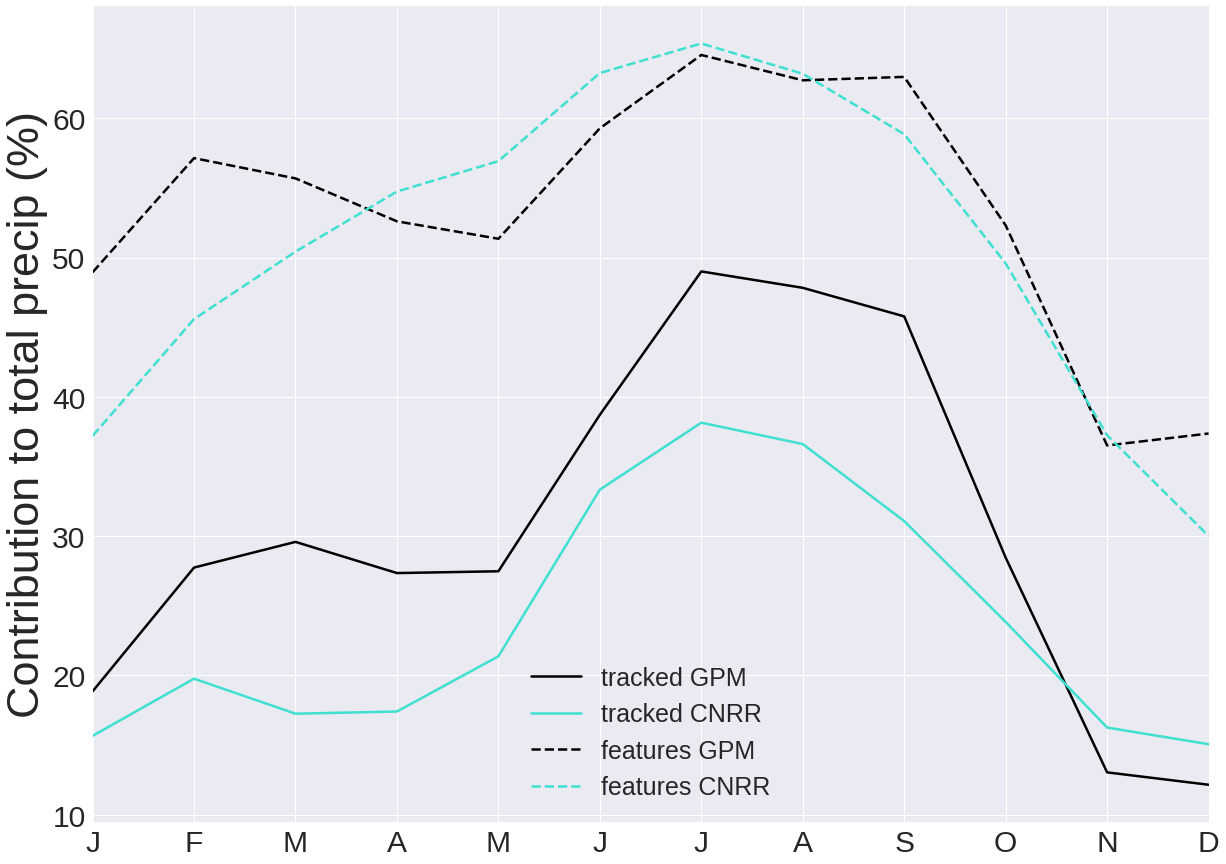

In [188]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20,15 ))

plt.plot(tracked_precip_gpm/total_precip_gpm*100, label= 'tracked GPM', linewidth= 2.5, color = 'black')

plt.plot(tracked_precip_cnrr/total_precip_cnrr*100, label= 'tracked CNRR', linewidth= 2.5, color = 'turquoise')

plt.plot(features_precip_gpm/total_precip_gpm*100, label= 'features GPM', linestyle= '--', linewidth= 2.5, color = 'black')

plt.plot(features_precip_cnrr/total_precip_cnrr*100, label= 'features CNRR', linestyle= '--', linewidth= 2.5, color = 'turquoise')


labels= ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(np.arange(0,12,1), labels)

plt.xlim(0,11)
plt.legend(fontsize= 'small')
plt.ylabel('Contribution to total precip (%)', fontsize= '45')

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/precip_contributions_gpm_cnrr.png')

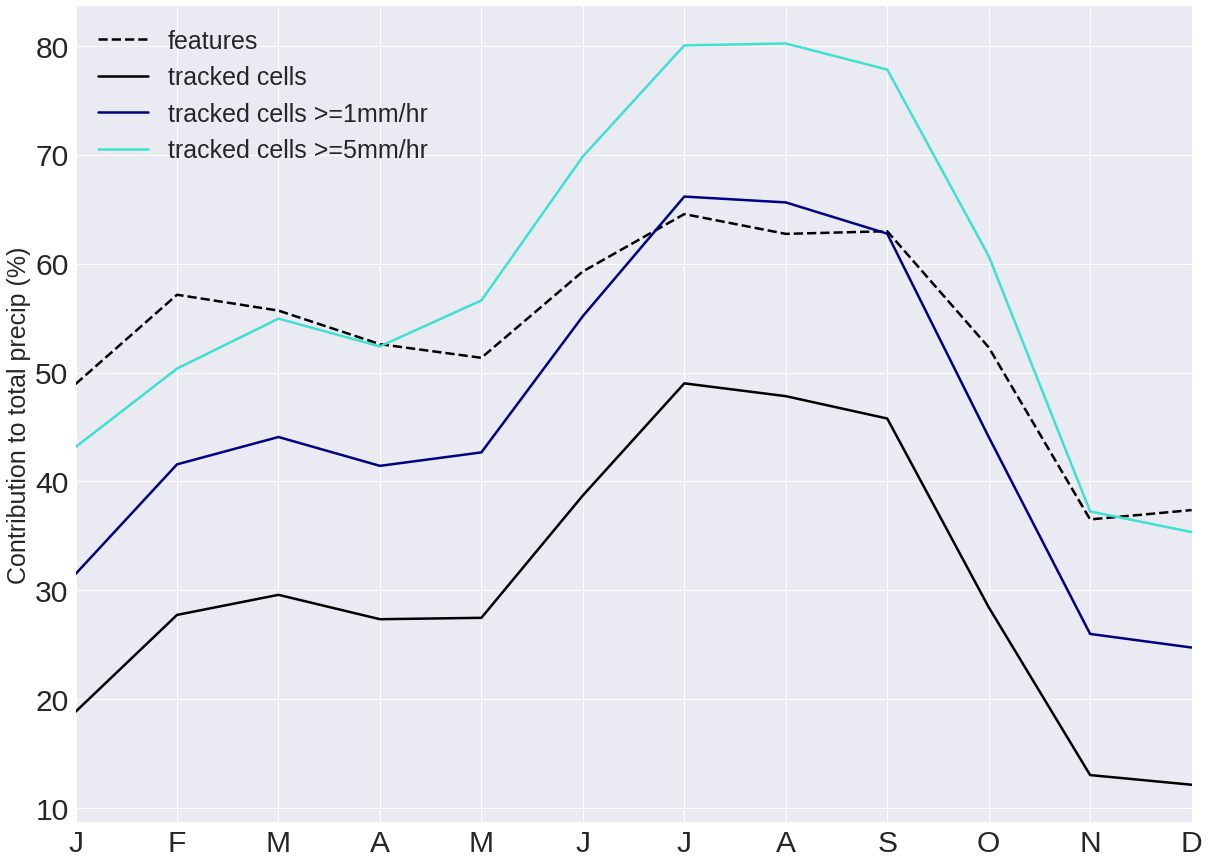

In [175]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20,15 ))

plt.plot(features_precip/total_precip*100, label= 'features', linestyle= '--', linewidth= 2.5, color = 'black')
plt.plot(tracked_precip/total_precip*100, label= 'tracked cells', linewidth= 2.5, color = 'black')

#plt.plot(features_precip/precip_1mm*100, label= 'features >=1mm/hr')
plt.plot(tracked_precip/precip_1mm*100, label= 'tracked cells >=1mm/hr', linewidth= 2.5, color = 'navy')

#plt.plot(features_precip_5mm/precip_5mm*100, label= 'features >=5mm/hr')
plt.plot(tracked_precip_5mm/precip_5mm*100, label= 'tracked cells >=5mm/hr', linewidth= 2.5, color = 'turquoise')


labels= ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(np.arange(0,12,1), labels)

plt.xlim(0,11)
plt.legend(fontsize= 'small')
plt.ylabel('Contribution to total precip (%)', fontsize= '25')

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/precip_contributions_gpm.png')

## test whether system lies within 3000m boundary of TP 

In [380]:
import shapefile
import shapely
from shapely.geometry import Point
from shapely.geometry import shape
from shapely.geometry import MultiLineString
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

In [409]:
lat = 30.0
lon = 75.0
pt= [lon,lat]

# Plot TP boundary polyline from shapefile 
path='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
shp=shapefile.Reader(path)
boundary= shp.shapes()
line = shape(boundary)
point= Point(pt)

if point.within(line):
    print(pt, 'is part of the TP! ')
else:
    print(pt, 'lies not within the TP')

# Track statistics 

In [277]:
Tracks


,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,latitude,ncells,cell,time_cell,v,total_precip,max_rr,mean_rr,area,eq_rad
6,0,4,27.386757,73.196271,35,2,7,2006-01-01 00:00:00,2006-01-01 00:00:00,72.788675,34.269627,103,7.0,00:00:00,1.424216,18.562962,1.882275,1.325926,2797.570944,29.841154
10,0,4,77.733757,51.993756,12,4,11,2006-01-01 00:00:00,2006-01-01 00:00:00,77.823375,32.149377,41,11.0,00:00:00,2.338674,153.375412,9.339664,3.130111,9791.498304,55.827688
14,1,13,77.835345,51.625515,18,1,15,2006-01-01 00:30:00,2006-01-01 00:30:00,77.833533,32.112552,17,11.0,00:30:00,2.861063,1519.229736,8.649243,2.494630,121694.336064,196.815930
15,1,3,27.248878,73.396416,40,2,16,2006-01-01 00:30:00,2006-01-01 00:30:00,72.774887,34.289641,93,7.0,00:30:00,3.632349,437.435486,10.377672,2.822165,30973.106880,99.292729
21,2,12,78.379825,51.662407,15,2,22,2006-01-01 01:00:00,2006-01-01 01:00:00,77.887980,32.116241,23,11.0,01:00:00,9.363410,48.595592,2.963146,2.208891,4396.182912,37.407867
24,2,1,27.938662,73.538759,13,4,25,2006-01-01 01:00:00,2006-01-01 01:00:00,72.843865,34.303875,120,7.0,01:00:00,0.602782,38.302948,2.470290,1.665346,4596.009408,38.248598
29,3,6,76.629781,51.972532,14,3,30,2006-01-01 01:30:00,2006-01-01 01:30:00,77.712979,32.147255,25,11.0,01:30:00,0.217098,49.301884,2.970984,1.700065,5794.968384,42.948757
30,3,1,27.821356,73.528244,19,4,31,2006-01-01 01:30:00,2006-01-01 01:30:00,72.832134,34.302824,114,7.0,01:30:00,12.741624,68.388687,7.985925,2.532914,5395.315392,41.441311
35,4,4,27.196588,75.523032,45,2,36,2006-01-01 02:00:00,2006-01-01 02:00:00,72.769658,34.502303,118,7.0,02:00:00,9.034063,41.954609,2.983583,1.748109,4795.835904,39.071242
38,4,2,76.642567,51.939139,17,5,39,2006-01-01 02:00:00,2006-01-01 02:00:00,77.714257,32.143915,54,11.0,02:00:00,9.389449,46.495071,4.570857,2.447109,3796.703424,34.763893


In [156]:
## create a new dataframe for tracked cells, which are possible mesoscale convective system candidates

# dataframe to store system stats 
mcs = pd.DataFrame(columns=['id', 'init_time', 'total_precip','mean_rr', 'max_rr' ,'lifetime', 'v' , 'max_area', 'mean_area','total_area', 'features>5mm', 'TP_flag'])

for idx, cell in Tracks.groupby('cell'):
    # compute statistics 
    cell_id = cell.cell.values[0]
    init_time = cell.time.values[0]
    total_precip = np.nansum(cell.total_precip.values)*0.5
    mean_rr = np.nanmean(cell.mean_rr.values)
    max_rr= np.nanmax(cell.max_rr.values)
    lifetime = np.shape(cell)[0]*0.5
    v= np.nanmean(cell.v.values)
    mean_area = np.nanmean(cell.area.values)
    max_area = np.nanmax(cell.area.values)
    total_area = np.nansum(cell.area.values) 
    features_5 = np.shape(cell.threshold_value.values[cell.threshold_value.values >= 5])[0]
    # add flag in order to mark whether the precip system lies within the 3000 boundary or not 
    flag = 0 

    # add to dataframe 
    data = [int(cell_id), str(init_time), float(total_precip),float(mean_rr), float(max_rr), float(lifetime), float(v), float(mean_area), float(max_area), float(total_area), float(features_5)]
    mcs.loc[len(mcs)]= data
    print('dataframe updated for cell', cell_id)


dataframe updated for cell 1.0
dataframe updated for cell 21.0
dataframe updated for cell 22.0
dataframe updated for cell 23.0
dataframe updated for cell 25.0
dataframe updated for cell 29.0
dataframe updated for cell 31.0
dataframe updated for cell 33.0
dataframe updated for cell 40.0
dataframe updated for cell 49.0
dataframe updated for cell 53.0
dataframe updated for cell 57.0
dataframe updated for cell 60.0
dataframe updated for cell 67.0
dataframe updated for cell 69.0
dataframe updated for cell 76.0
dataframe updated for cell 81.0
dataframe updated for cell 86.0
dataframe updated for cell 88.0
dataframe updated for cell 100.0
dataframe updated for cell 101.0
dataframe updated for cell 112.0
dataframe updated for cell 125.0
dataframe updated for cell 128.0
dataframe updated for cell 134.0
dataframe updated for cell 137.0
dataframe updated for cell 140.0
dataframe updated for cell 141.0
dataframe updated for cell 142.0
dataframe updated for cell 158.0
dataframe updated for cell 163

dataframe updated for cell 2532.0
dataframe updated for cell 2548.0
dataframe updated for cell 2560.0
dataframe updated for cell 2563.0
dataframe updated for cell 2570.0
dataframe updated for cell 2589.0
dataframe updated for cell 2590.0
dataframe updated for cell 2600.0
dataframe updated for cell 2607.0
dataframe updated for cell 2611.0
dataframe updated for cell 2617.0
dataframe updated for cell 2618.0
dataframe updated for cell 2619.0
dataframe updated for cell 2630.0
dataframe updated for cell 2645.0
dataframe updated for cell 2657.0
dataframe updated for cell 2699.0
dataframe updated for cell 2739.0
dataframe updated for cell 2769.0
dataframe updated for cell 2818.0
dataframe updated for cell 2822.0
dataframe updated for cell 2831.0
dataframe updated for cell 2874.0
dataframe updated for cell 2925.0
dataframe updated for cell 2968.0
dataframe updated for cell 2982.0
dataframe updated for cell 2987.0
dataframe updated for cell 3007.0
dataframe updated for cell 3010.0
dataframe upda

dataframe updated for cell 5895.0
dataframe updated for cell 5911.0
dataframe updated for cell 5921.0
dataframe updated for cell 5933.0
dataframe updated for cell 5941.0
dataframe updated for cell 5947.0
dataframe updated for cell 5948.0
dataframe updated for cell 5953.0
dataframe updated for cell 5971.0
dataframe updated for cell 5979.0
dataframe updated for cell 5981.0
dataframe updated for cell 6041.0
dataframe updated for cell 6053.0
dataframe updated for cell 6056.0
dataframe updated for cell 6091.0
dataframe updated for cell 6093.0
dataframe updated for cell 6105.0
dataframe updated for cell 6106.0
dataframe updated for cell 6163.0
dataframe updated for cell 6175.0
dataframe updated for cell 6176.0
dataframe updated for cell 6181.0
dataframe updated for cell 6196.0
dataframe updated for cell 6251.0
dataframe updated for cell 6318.0
dataframe updated for cell 6329.0
dataframe updated for cell 6335.0
dataframe updated for cell 6341.0
dataframe updated for cell 6346.0
dataframe upda

dataframe updated for cell 9679.0
dataframe updated for cell 9691.0
dataframe updated for cell 9708.0
dataframe updated for cell 9756.0
dataframe updated for cell 9758.0
dataframe updated for cell 9792.0
dataframe updated for cell 9798.0
dataframe updated for cell 9801.0
dataframe updated for cell 9814.0
dataframe updated for cell 9819.0
dataframe updated for cell 9830.0
dataframe updated for cell 9847.0
dataframe updated for cell 9864.0
dataframe updated for cell 9871.0
dataframe updated for cell 9886.0
dataframe updated for cell 9893.0
dataframe updated for cell 9898.0
dataframe updated for cell 9903.0
dataframe updated for cell 9915.0
dataframe updated for cell 9920.0
dataframe updated for cell 9929.0
dataframe updated for cell 9946.0
dataframe updated for cell 9947.0
dataframe updated for cell 9949.0
dataframe updated for cell 9961.0
dataframe updated for cell 9968.0
dataframe updated for cell 9971.0
dataframe updated for cell 9980.0
dataframe updated for cell 9981.0
dataframe upda

dataframe updated for cell 13163.0
dataframe updated for cell 13189.0
dataframe updated for cell 13202.0
dataframe updated for cell 13220.0
dataframe updated for cell 13222.0
dataframe updated for cell 13223.0
dataframe updated for cell 13233.0
dataframe updated for cell 13235.0
dataframe updated for cell 13249.0
dataframe updated for cell 13256.0
dataframe updated for cell 13257.0
dataframe updated for cell 13264.0
dataframe updated for cell 13269.0
dataframe updated for cell 13296.0
dataframe updated for cell 13304.0
dataframe updated for cell 13318.0
dataframe updated for cell 13339.0
dataframe updated for cell 13342.0
dataframe updated for cell 13343.0
dataframe updated for cell 13346.0
dataframe updated for cell 13351.0
dataframe updated for cell 13360.0
dataframe updated for cell 13361.0
dataframe updated for cell 13367.0
dataframe updated for cell 13381.0
dataframe updated for cell 13386.0
dataframe updated for cell 13390.0
dataframe updated for cell 13391.0
dataframe updated fo

dataframe updated for cell 15608.0
dataframe updated for cell 15612.0
dataframe updated for cell 15639.0
dataframe updated for cell 15642.0
dataframe updated for cell 15644.0
dataframe updated for cell 15648.0
dataframe updated for cell 15650.0
dataframe updated for cell 15678.0
dataframe updated for cell 15684.0
dataframe updated for cell 15695.0
dataframe updated for cell 15726.0
dataframe updated for cell 15727.0
dataframe updated for cell 15731.0
dataframe updated for cell 15734.0
dataframe updated for cell 15742.0
dataframe updated for cell 15758.0
dataframe updated for cell 15763.0
dataframe updated for cell 15766.0
dataframe updated for cell 15773.0
dataframe updated for cell 15794.0
dataframe updated for cell 15801.0
dataframe updated for cell 15804.0
dataframe updated for cell 15808.0
dataframe updated for cell 15825.0
dataframe updated for cell 15828.0
dataframe updated for cell 15855.0
dataframe updated for cell 15861.0
dataframe updated for cell 15862.0
dataframe updated fo

dataframe updated for cell 18173.0
dataframe updated for cell 18184.0
dataframe updated for cell 18186.0
dataframe updated for cell 18197.0
dataframe updated for cell 18198.0
dataframe updated for cell 18209.0
dataframe updated for cell 18219.0
dataframe updated for cell 18222.0
dataframe updated for cell 18236.0
dataframe updated for cell 18240.0
dataframe updated for cell 18243.0
dataframe updated for cell 18245.0
dataframe updated for cell 18250.0
dataframe updated for cell 18255.0
dataframe updated for cell 18268.0
dataframe updated for cell 18270.0
dataframe updated for cell 18281.0
dataframe updated for cell 18289.0
dataframe updated for cell 18290.0
dataframe updated for cell 18294.0
dataframe updated for cell 18297.0
dataframe updated for cell 18299.0
dataframe updated for cell 18321.0
dataframe updated for cell 18322.0
dataframe updated for cell 18348.0
dataframe updated for cell 18358.0
dataframe updated for cell 18379.0
dataframe updated for cell 18388.0
dataframe updated fo

dataframe updated for cell 20660.0
dataframe updated for cell 20665.0
dataframe updated for cell 20666.0
dataframe updated for cell 20670.0
dataframe updated for cell 20672.0
dataframe updated for cell 20680.0
dataframe updated for cell 20686.0
dataframe updated for cell 20689.0
dataframe updated for cell 20720.0
dataframe updated for cell 20738.0
dataframe updated for cell 20741.0
dataframe updated for cell 20746.0
dataframe updated for cell 20761.0
dataframe updated for cell 20776.0
dataframe updated for cell 20781.0
dataframe updated for cell 20785.0
dataframe updated for cell 20798.0
dataframe updated for cell 20809.0
dataframe updated for cell 20812.0
dataframe updated for cell 20822.0
dataframe updated for cell 20833.0
dataframe updated for cell 20841.0
dataframe updated for cell 20848.0
dataframe updated for cell 20864.0
dataframe updated for cell 20878.0
dataframe updated for cell 20893.0
dataframe updated for cell 20896.0
dataframe updated for cell 20914.0
dataframe updated fo

dataframe updated for cell 22853.0
dataframe updated for cell 22856.0
dataframe updated for cell 22865.0
dataframe updated for cell 22868.0
dataframe updated for cell 22870.0
dataframe updated for cell 22874.0
dataframe updated for cell 22879.0
dataframe updated for cell 22881.0
dataframe updated for cell 22908.0
dataframe updated for cell 22916.0
dataframe updated for cell 22923.0
dataframe updated for cell 22926.0
dataframe updated for cell 22928.0
dataframe updated for cell 22929.0
dataframe updated for cell 22931.0
dataframe updated for cell 22945.0
dataframe updated for cell 22951.0
dataframe updated for cell 22956.0
dataframe updated for cell 22962.0
dataframe updated for cell 22963.0
dataframe updated for cell 22970.0
dataframe updated for cell 22972.0
dataframe updated for cell 22977.0
dataframe updated for cell 22981.0
dataframe updated for cell 22982.0
dataframe updated for cell 22984.0
dataframe updated for cell 22985.0
dataframe updated for cell 22986.0
dataframe updated fo

dataframe updated for cell 24728.0
dataframe updated for cell 24737.0
dataframe updated for cell 24738.0
dataframe updated for cell 24739.0
dataframe updated for cell 24746.0
dataframe updated for cell 24747.0
dataframe updated for cell 24753.0
dataframe updated for cell 24755.0
dataframe updated for cell 24756.0
dataframe updated for cell 24759.0
dataframe updated for cell 24764.0
dataframe updated for cell 24805.0
dataframe updated for cell 24839.0
dataframe updated for cell 24843.0
dataframe updated for cell 24846.0
dataframe updated for cell 24849.0
dataframe updated for cell 24852.0
dataframe updated for cell 24864.0
dataframe updated for cell 24881.0
dataframe updated for cell 24883.0
dataframe updated for cell 24899.0
dataframe updated for cell 24905.0
dataframe updated for cell 24906.0
dataframe updated for cell 24911.0
dataframe updated for cell 24912.0
dataframe updated for cell 24920.0
dataframe updated for cell 24923.0
dataframe updated for cell 24931.0
dataframe updated fo

dataframe updated for cell 26840.0
dataframe updated for cell 26846.0
dataframe updated for cell 26847.0
dataframe updated for cell 26853.0
dataframe updated for cell 26874.0
dataframe updated for cell 26876.0
dataframe updated for cell 26881.0
dataframe updated for cell 26883.0
dataframe updated for cell 26887.0
dataframe updated for cell 26890.0
dataframe updated for cell 26892.0
dataframe updated for cell 26895.0
dataframe updated for cell 26898.0
dataframe updated for cell 26906.0
dataframe updated for cell 26912.0
dataframe updated for cell 26920.0
dataframe updated for cell 26921.0
dataframe updated for cell 26925.0
dataframe updated for cell 26926.0
dataframe updated for cell 26952.0
dataframe updated for cell 26956.0
dataframe updated for cell 26958.0
dataframe updated for cell 26966.0
dataframe updated for cell 26980.0
dataframe updated for cell 26988.0
dataframe updated for cell 26992.0
dataframe updated for cell 26997.0
dataframe updated for cell 27006.0
dataframe updated fo

dataframe updated for cell 29000.0
dataframe updated for cell 29017.0
dataframe updated for cell 29018.0
dataframe updated for cell 29028.0
dataframe updated for cell 29030.0
dataframe updated for cell 29033.0
dataframe updated for cell 29036.0
dataframe updated for cell 29042.0
dataframe updated for cell 29057.0
dataframe updated for cell 29058.0
dataframe updated for cell 29072.0
dataframe updated for cell 29100.0
dataframe updated for cell 29101.0
dataframe updated for cell 29114.0
dataframe updated for cell 29153.0
dataframe updated for cell 29155.0
dataframe updated for cell 29166.0
dataframe updated for cell 29170.0
dataframe updated for cell 29172.0
dataframe updated for cell 29186.0
dataframe updated for cell 29192.0
dataframe updated for cell 29194.0
dataframe updated for cell 29234.0
dataframe updated for cell 29235.0
dataframe updated for cell 29287.0
dataframe updated for cell 29293.0
dataframe updated for cell 29298.0
dataframe updated for cell 29301.0
dataframe updated fo

dataframe updated for cell 31009.0
dataframe updated for cell 31023.0
dataframe updated for cell 31039.0
dataframe updated for cell 31045.0
dataframe updated for cell 31046.0
dataframe updated for cell 31049.0
dataframe updated for cell 31051.0
dataframe updated for cell 31056.0
dataframe updated for cell 31067.0
dataframe updated for cell 31068.0
dataframe updated for cell 31073.0
dataframe updated for cell 31074.0
dataframe updated for cell 31083.0
dataframe updated for cell 31091.0
dataframe updated for cell 31096.0
dataframe updated for cell 31097.0
dataframe updated for cell 31135.0
dataframe updated for cell 31136.0
dataframe updated for cell 31143.0
dataframe updated for cell 31148.0
dataframe updated for cell 31164.0
dataframe updated for cell 31181.0
dataframe updated for cell 31183.0
dataframe updated for cell 31184.0
dataframe updated for cell 31190.0
dataframe updated for cell 31193.0
dataframe updated for cell 31211.0
dataframe updated for cell 31215.0
dataframe updated fo

dataframe updated for cell 33409.0
dataframe updated for cell 33422.0
dataframe updated for cell 33434.0
dataframe updated for cell 33450.0
dataframe updated for cell 33462.0
dataframe updated for cell 33464.0
dataframe updated for cell 33465.0
dataframe updated for cell 33472.0
dataframe updated for cell 33473.0
dataframe updated for cell 33478.0
dataframe updated for cell 33480.0
dataframe updated for cell 33482.0
dataframe updated for cell 33483.0
dataframe updated for cell 33498.0
dataframe updated for cell 33499.0
dataframe updated for cell 33505.0
dataframe updated for cell 33524.0
dataframe updated for cell 33536.0
dataframe updated for cell 33550.0
dataframe updated for cell 33588.0
dataframe updated for cell 33590.0
dataframe updated for cell 33596.0
dataframe updated for cell 33612.0
dataframe updated for cell 33632.0
dataframe updated for cell 33636.0
dataframe updated for cell 33651.0
dataframe updated for cell 33679.0
dataframe updated for cell 33704.0
dataframe updated fo

dataframe updated for cell 35737.0
dataframe updated for cell 35743.0
dataframe updated for cell 35747.0
dataframe updated for cell 35755.0
dataframe updated for cell 35773.0
dataframe updated for cell 35780.0
dataframe updated for cell 35787.0
dataframe updated for cell 35794.0
dataframe updated for cell 35801.0
dataframe updated for cell 35808.0
dataframe updated for cell 35823.0
dataframe updated for cell 35824.0
dataframe updated for cell 35826.0
dataframe updated for cell 35855.0
dataframe updated for cell 35872.0
dataframe updated for cell 35877.0
dataframe updated for cell 35884.0
dataframe updated for cell 35885.0
dataframe updated for cell 35895.0
dataframe updated for cell 35902.0
dataframe updated for cell 35906.0
dataframe updated for cell 35928.0
dataframe updated for cell 35936.0
dataframe updated for cell 35941.0
dataframe updated for cell 35946.0
dataframe updated for cell 35952.0
dataframe updated for cell 35960.0
dataframe updated for cell 35966.0
dataframe updated fo

dataframe updated for cell 38147.0
dataframe updated for cell 38158.0
dataframe updated for cell 38171.0
dataframe updated for cell 38175.0
dataframe updated for cell 38183.0
dataframe updated for cell 38192.0
dataframe updated for cell 38202.0
dataframe updated for cell 38215.0
dataframe updated for cell 38219.0
dataframe updated for cell 38220.0
dataframe updated for cell 38226.0
dataframe updated for cell 38254.0
dataframe updated for cell 38260.0
dataframe updated for cell 38273.0
dataframe updated for cell 38276.0
dataframe updated for cell 38282.0
dataframe updated for cell 38285.0
dataframe updated for cell 38288.0
dataframe updated for cell 38293.0
dataframe updated for cell 38300.0
dataframe updated for cell 38305.0
dataframe updated for cell 38339.0
dataframe updated for cell 38346.0
dataframe updated for cell 38362.0
dataframe updated for cell 38368.0
dataframe updated for cell 38386.0
dataframe updated for cell 38387.0
dataframe updated for cell 38390.0
dataframe updated fo

dataframe updated for cell 40569.0
dataframe updated for cell 40571.0
dataframe updated for cell 40574.0
dataframe updated for cell 40577.0
dataframe updated for cell 40578.0
dataframe updated for cell 40582.0
dataframe updated for cell 40583.0
dataframe updated for cell 40604.0
dataframe updated for cell 40607.0
dataframe updated for cell 40611.0
dataframe updated for cell 40613.0
dataframe updated for cell 40641.0
dataframe updated for cell 40649.0
dataframe updated for cell 40657.0
dataframe updated for cell 40658.0
dataframe updated for cell 40660.0
dataframe updated for cell 40664.0
dataframe updated for cell 40672.0
dataframe updated for cell 40675.0
dataframe updated for cell 40676.0
dataframe updated for cell 40696.0
dataframe updated for cell 40699.0
dataframe updated for cell 40712.0
dataframe updated for cell 40715.0
dataframe updated for cell 40716.0
dataframe updated for cell 40732.0
dataframe updated for cell 40737.0
dataframe updated for cell 40739.0
dataframe updated fo

dataframe updated for cell 42789.0
dataframe updated for cell 42800.0
dataframe updated for cell 42808.0
dataframe updated for cell 42809.0
dataframe updated for cell 42812.0
dataframe updated for cell 42833.0
dataframe updated for cell 42839.0
dataframe updated for cell 42842.0
dataframe updated for cell 42845.0
dataframe updated for cell 42846.0
dataframe updated for cell 42866.0
dataframe updated for cell 42874.0
dataframe updated for cell 42887.0
dataframe updated for cell 42892.0
dataframe updated for cell 42894.0
dataframe updated for cell 42900.0
dataframe updated for cell 42903.0
dataframe updated for cell 42916.0
dataframe updated for cell 42919.0
dataframe updated for cell 42936.0
dataframe updated for cell 42961.0
dataframe updated for cell 42965.0
dataframe updated for cell 42968.0
dataframe updated for cell 42985.0
dataframe updated for cell 42995.0
dataframe updated for cell 43001.0
dataframe updated for cell 43015.0
dataframe updated for cell 43016.0
dataframe updated fo

dataframe updated for cell 45275.0
dataframe updated for cell 45278.0
dataframe updated for cell 45279.0
dataframe updated for cell 45290.0
dataframe updated for cell 45305.0
dataframe updated for cell 45311.0
dataframe updated for cell 45312.0
dataframe updated for cell 45319.0
dataframe updated for cell 45327.0
dataframe updated for cell 45328.0
dataframe updated for cell 45332.0
dataframe updated for cell 45344.0
dataframe updated for cell 45373.0
dataframe updated for cell 45380.0
dataframe updated for cell 45381.0
dataframe updated for cell 45388.0
dataframe updated for cell 45394.0
dataframe updated for cell 45395.0
dataframe updated for cell 45404.0
dataframe updated for cell 45407.0
dataframe updated for cell 45423.0
dataframe updated for cell 45428.0
dataframe updated for cell 45451.0
dataframe updated for cell 45461.0
dataframe updated for cell 45462.0
dataframe updated for cell 45476.0
dataframe updated for cell 45486.0
dataframe updated for cell 45493.0
dataframe updated fo

dataframe updated for cell 48292.0
dataframe updated for cell 48310.0
dataframe updated for cell 48326.0
dataframe updated for cell 48331.0
dataframe updated for cell 48340.0
dataframe updated for cell 48344.0
dataframe updated for cell 48347.0
dataframe updated for cell 48348.0
dataframe updated for cell 48364.0
dataframe updated for cell 48371.0
dataframe updated for cell 48388.0
dataframe updated for cell 48389.0
dataframe updated for cell 48396.0
dataframe updated for cell 48397.0
dataframe updated for cell 48400.0
dataframe updated for cell 48404.0
dataframe updated for cell 48416.0
dataframe updated for cell 48453.0
dataframe updated for cell 48461.0
dataframe updated for cell 48482.0
dataframe updated for cell 48485.0
dataframe updated for cell 48548.0
dataframe updated for cell 48550.0
dataframe updated for cell 48558.0
dataframe updated for cell 48561.0
dataframe updated for cell 48598.0
dataframe updated for cell 48625.0
dataframe updated for cell 48654.0
dataframe updated fo

dataframe updated for cell 52278.0
dataframe updated for cell 52291.0
dataframe updated for cell 52366.0
dataframe updated for cell 52375.0
dataframe updated for cell 52386.0
dataframe updated for cell 52425.0
dataframe updated for cell 52476.0
dataframe updated for cell 52493.0
dataframe updated for cell 52506.0
dataframe updated for cell 52519.0
dataframe updated for cell 52522.0
dataframe updated for cell 52556.0
dataframe updated for cell 52572.0
dataframe updated for cell 52584.0
dataframe updated for cell 52599.0
dataframe updated for cell 52617.0
dataframe updated for cell 52626.0
dataframe updated for cell 52630.0
dataframe updated for cell 52652.0
dataframe updated for cell 52653.0
dataframe updated for cell 52655.0
dataframe updated for cell 52667.0
dataframe updated for cell 52674.0
dataframe updated for cell 52696.0
dataframe updated for cell 52712.0
dataframe updated for cell 52713.0
dataframe updated for cell 52731.0
dataframe updated for cell 52756.0
dataframe updated fo

dataframe updated for cell 55741.0
dataframe updated for cell 55743.0
dataframe updated for cell 55745.0
dataframe updated for cell 55746.0
dataframe updated for cell 55759.0
dataframe updated for cell 55767.0
dataframe updated for cell 55782.0
dataframe updated for cell 55784.0
dataframe updated for cell 55788.0
dataframe updated for cell 55791.0
dataframe updated for cell 55819.0
dataframe updated for cell 55820.0
dataframe updated for cell 55827.0
dataframe updated for cell 55852.0
dataframe updated for cell 55870.0
dataframe updated for cell 55877.0
dataframe updated for cell 55887.0
dataframe updated for cell 55938.0
dataframe updated for cell 55943.0
dataframe updated for cell 55959.0
dataframe updated for cell 55963.0
dataframe updated for cell 55972.0
dataframe updated for cell 55978.0
dataframe updated for cell 55982.0
dataframe updated for cell 55989.0
dataframe updated for cell 55990.0
dataframe updated for cell 56002.0
dataframe updated for cell 56005.0
dataframe updated fo

dataframe updated for cell 58134.0
dataframe updated for cell 58148.0
dataframe updated for cell 58153.0
dataframe updated for cell 58164.0
dataframe updated for cell 58166.0
dataframe updated for cell 58174.0
dataframe updated for cell 58177.0
dataframe updated for cell 58182.0
dataframe updated for cell 58185.0
dataframe updated for cell 58187.0
dataframe updated for cell 58191.0
dataframe updated for cell 58201.0
dataframe updated for cell 58204.0
dataframe updated for cell 58209.0
dataframe updated for cell 58234.0
dataframe updated for cell 58270.0
dataframe updated for cell 58273.0
dataframe updated for cell 58285.0
dataframe updated for cell 58289.0
dataframe updated for cell 58290.0
dataframe updated for cell 58295.0
dataframe updated for cell 58301.0
dataframe updated for cell 58303.0
dataframe updated for cell 58309.0
dataframe updated for cell 58311.0
dataframe updated for cell 58314.0
dataframe updated for cell 58317.0
dataframe updated for cell 58320.0
dataframe updated fo

dataframe updated for cell 60834.0
dataframe updated for cell 60888.0
dataframe updated for cell 60908.0
dataframe updated for cell 60913.0
dataframe updated for cell 60927.0
dataframe updated for cell 60934.0
dataframe updated for cell 60936.0
dataframe updated for cell 60947.0
dataframe updated for cell 60970.0
dataframe updated for cell 60983.0
dataframe updated for cell 61005.0
dataframe updated for cell 61010.0
dataframe updated for cell 61025.0
dataframe updated for cell 61071.0
dataframe updated for cell 61075.0
dataframe updated for cell 61106.0
dataframe updated for cell 61113.0
dataframe updated for cell 61121.0
dataframe updated for cell 61153.0
dataframe updated for cell 61156.0
dataframe updated for cell 61183.0
dataframe updated for cell 61188.0
dataframe updated for cell 61196.0
dataframe updated for cell 61202.0
dataframe updated for cell 61220.0
dataframe updated for cell 61236.0
dataframe updated for cell 61247.0
dataframe updated for cell 61259.0
dataframe updated fo

dataframe updated for cell 63854.0
dataframe updated for cell 63910.0
dataframe updated for cell 63913.0
dataframe updated for cell 63922.0
dataframe updated for cell 63945.0
dataframe updated for cell 63990.0
dataframe updated for cell 63999.0
dataframe updated for cell 64011.0
dataframe updated for cell 64012.0
dataframe updated for cell 64014.0
dataframe updated for cell 64028.0
dataframe updated for cell 64047.0
dataframe updated for cell 64053.0
dataframe updated for cell 64063.0
dataframe updated for cell 64065.0
dataframe updated for cell 64074.0
dataframe updated for cell 64094.0
dataframe updated for cell 64113.0
dataframe updated for cell 64121.0
dataframe updated for cell 64147.0
dataframe updated for cell 64156.0
dataframe updated for cell 64177.0
dataframe updated for cell 64202.0
dataframe updated for cell 64203.0
dataframe updated for cell 64227.0
dataframe updated for cell 64230.0
dataframe updated for cell 64234.0
dataframe updated for cell 64243.0
dataframe updated fo

dataframe updated for cell 66194.0
dataframe updated for cell 66197.0
dataframe updated for cell 66201.0
dataframe updated for cell 66209.0
dataframe updated for cell 66211.0
dataframe updated for cell 66212.0
dataframe updated for cell 66217.0
dataframe updated for cell 66218.0
dataframe updated for cell 66228.0
dataframe updated for cell 66235.0
dataframe updated for cell 66244.0
dataframe updated for cell 66248.0
dataframe updated for cell 66264.0
dataframe updated for cell 66269.0
dataframe updated for cell 66272.0
dataframe updated for cell 66274.0
dataframe updated for cell 66282.0
dataframe updated for cell 66290.0
dataframe updated for cell 66298.0
dataframe updated for cell 66304.0
dataframe updated for cell 66309.0
dataframe updated for cell 66316.0
dataframe updated for cell 66335.0
dataframe updated for cell 66348.0
dataframe updated for cell 66353.0
dataframe updated for cell 66380.0
dataframe updated for cell 66404.0
dataframe updated for cell 66408.0
dataframe updated fo

dataframe updated for cell 68231.0
dataframe updated for cell 68241.0
dataframe updated for cell 68249.0
dataframe updated for cell 68257.0
dataframe updated for cell 68267.0
dataframe updated for cell 68276.0
dataframe updated for cell 68281.0
dataframe updated for cell 68296.0
dataframe updated for cell 68301.0
dataframe updated for cell 68308.0
dataframe updated for cell 68324.0
dataframe updated for cell 68331.0
dataframe updated for cell 68332.0
dataframe updated for cell 68338.0
dataframe updated for cell 68339.0
dataframe updated for cell 68346.0
dataframe updated for cell 68347.0
dataframe updated for cell 68353.0
dataframe updated for cell 68371.0
dataframe updated for cell 68376.0
dataframe updated for cell 68388.0
dataframe updated for cell 68391.0
dataframe updated for cell 68404.0
dataframe updated for cell 68406.0
dataframe updated for cell 68424.0
dataframe updated for cell 68427.0
dataframe updated for cell 68438.0
dataframe updated for cell 68440.0
dataframe updated fo

dataframe updated for cell 70209.0
dataframe updated for cell 70210.0
dataframe updated for cell 70221.0
dataframe updated for cell 70235.0
dataframe updated for cell 70236.0
dataframe updated for cell 70243.0
dataframe updated for cell 70246.0
dataframe updated for cell 70254.0
dataframe updated for cell 70259.0
dataframe updated for cell 70262.0
dataframe updated for cell 70269.0
dataframe updated for cell 70272.0
dataframe updated for cell 70279.0
dataframe updated for cell 70280.0
dataframe updated for cell 70281.0
dataframe updated for cell 70293.0
dataframe updated for cell 70307.0
dataframe updated for cell 70308.0
dataframe updated for cell 70320.0
dataframe updated for cell 70327.0
dataframe updated for cell 70330.0
dataframe updated for cell 70333.0
dataframe updated for cell 70344.0
dataframe updated for cell 70347.0
dataframe updated for cell 70372.0
dataframe updated for cell 70376.0
dataframe updated for cell 70381.0
dataframe updated for cell 70392.0
dataframe updated fo

dataframe updated for cell 71601.0
dataframe updated for cell 71616.0
dataframe updated for cell 71619.0
dataframe updated for cell 71624.0
dataframe updated for cell 71627.0
dataframe updated for cell 71642.0
dataframe updated for cell 71656.0
dataframe updated for cell 71663.0
dataframe updated for cell 71667.0
dataframe updated for cell 71679.0
dataframe updated for cell 71694.0
dataframe updated for cell 71695.0
dataframe updated for cell 71698.0
dataframe updated for cell 71700.0
dataframe updated for cell 71712.0
dataframe updated for cell 71715.0
dataframe updated for cell 71716.0
dataframe updated for cell 71720.0
dataframe updated for cell 71726.0
dataframe updated for cell 71732.0
dataframe updated for cell 71743.0
dataframe updated for cell 71751.0
dataframe updated for cell 71753.0
dataframe updated for cell 71771.0
dataframe updated for cell 71773.0
dataframe updated for cell 71814.0
dataframe updated for cell 71844.0
dataframe updated for cell 71845.0
dataframe updated fo

dataframe updated for cell 73531.0
dataframe updated for cell 73534.0
dataframe updated for cell 73537.0
dataframe updated for cell 73544.0
dataframe updated for cell 73551.0
dataframe updated for cell 73561.0
dataframe updated for cell 73563.0
dataframe updated for cell 73567.0
dataframe updated for cell 73570.0
dataframe updated for cell 73574.0
dataframe updated for cell 73583.0
dataframe updated for cell 73584.0
dataframe updated for cell 73593.0
dataframe updated for cell 73602.0
dataframe updated for cell 73603.0
dataframe updated for cell 73607.0
dataframe updated for cell 73611.0
dataframe updated for cell 73612.0
dataframe updated for cell 73623.0
dataframe updated for cell 73624.0
dataframe updated for cell 73643.0
dataframe updated for cell 73646.0
dataframe updated for cell 73647.0
dataframe updated for cell 73649.0
dataframe updated for cell 73656.0
dataframe updated for cell 73661.0
dataframe updated for cell 73672.0
dataframe updated for cell 73676.0
dataframe updated fo

dataframe updated for cell 75029.0
dataframe updated for cell 75036.0
dataframe updated for cell 75042.0
dataframe updated for cell 75043.0
dataframe updated for cell 75080.0
dataframe updated for cell 75089.0
dataframe updated for cell 75090.0
dataframe updated for cell 75103.0
dataframe updated for cell 75108.0
dataframe updated for cell 75129.0
dataframe updated for cell 75133.0
dataframe updated for cell 75135.0
dataframe updated for cell 75137.0
dataframe updated for cell 75140.0
dataframe updated for cell 75148.0
dataframe updated for cell 75164.0
dataframe updated for cell 75165.0
dataframe updated for cell 75170.0
dataframe updated for cell 75175.0
dataframe updated for cell 75185.0
dataframe updated for cell 75190.0
dataframe updated for cell 75195.0
dataframe updated for cell 75198.0
dataframe updated for cell 75200.0
dataframe updated for cell 75211.0
dataframe updated for cell 75216.0
dataframe updated for cell 75217.0
dataframe updated for cell 75226.0
dataframe updated fo

dataframe updated for cell 76884.0
dataframe updated for cell 76892.0
dataframe updated for cell 76900.0
dataframe updated for cell 76943.0
dataframe updated for cell 76948.0
dataframe updated for cell 76957.0
dataframe updated for cell 76959.0
dataframe updated for cell 76968.0
dataframe updated for cell 76973.0
dataframe updated for cell 76982.0
dataframe updated for cell 77005.0
dataframe updated for cell 77012.0
dataframe updated for cell 77016.0
dataframe updated for cell 77017.0
dataframe updated for cell 77018.0
dataframe updated for cell 77027.0
dataframe updated for cell 77032.0
dataframe updated for cell 77034.0
dataframe updated for cell 77037.0
dataframe updated for cell 77046.0
dataframe updated for cell 77050.0
dataframe updated for cell 77052.0
dataframe updated for cell 77071.0
dataframe updated for cell 77079.0
dataframe updated for cell 77080.0
dataframe updated for cell 77082.0
dataframe updated for cell 77095.0
dataframe updated for cell 77096.0
dataframe updated fo

dataframe updated for cell 78402.0
dataframe updated for cell 78415.0
dataframe updated for cell 78427.0
dataframe updated for cell 78439.0
dataframe updated for cell 78448.0
dataframe updated for cell 78453.0
dataframe updated for cell 78454.0
dataframe updated for cell 78455.0
dataframe updated for cell 78478.0
dataframe updated for cell 78479.0
dataframe updated for cell 78480.0
dataframe updated for cell 78486.0
dataframe updated for cell 78496.0
dataframe updated for cell 78499.0
dataframe updated for cell 78504.0
dataframe updated for cell 78524.0
dataframe updated for cell 78527.0
dataframe updated for cell 78538.0
dataframe updated for cell 78559.0
dataframe updated for cell 78562.0
dataframe updated for cell 78565.0
dataframe updated for cell 78567.0
dataframe updated for cell 78570.0
dataframe updated for cell 78572.0
dataframe updated for cell 78586.0
dataframe updated for cell 78587.0
dataframe updated for cell 78588.0
dataframe updated for cell 78590.0
dataframe updated fo

dataframe updated for cell 79929.0
dataframe updated for cell 79938.0
dataframe updated for cell 79939.0
dataframe updated for cell 79950.0
dataframe updated for cell 79953.0
dataframe updated for cell 79979.0
dataframe updated for cell 80009.0
dataframe updated for cell 80017.0
dataframe updated for cell 80027.0
dataframe updated for cell 80040.0
dataframe updated for cell 80054.0
dataframe updated for cell 80057.0
dataframe updated for cell 80063.0
dataframe updated for cell 80067.0
dataframe updated for cell 80069.0
dataframe updated for cell 80071.0
dataframe updated for cell 80088.0
dataframe updated for cell 80093.0
dataframe updated for cell 80111.0
dataframe updated for cell 80115.0
dataframe updated for cell 80136.0
dataframe updated for cell 80149.0
dataframe updated for cell 80155.0
dataframe updated for cell 80159.0
dataframe updated for cell 80169.0
dataframe updated for cell 80172.0
dataframe updated for cell 80181.0
dataframe updated for cell 80187.0
dataframe updated fo

dataframe updated for cell 81419.0
dataframe updated for cell 81424.0
dataframe updated for cell 81426.0
dataframe updated for cell 81429.0
dataframe updated for cell 81430.0
dataframe updated for cell 81434.0
dataframe updated for cell 81443.0
dataframe updated for cell 81445.0
dataframe updated for cell 81451.0
dataframe updated for cell 81459.0
dataframe updated for cell 81464.0
dataframe updated for cell 81465.0
dataframe updated for cell 81473.0
dataframe updated for cell 81496.0
dataframe updated for cell 81498.0
dataframe updated for cell 81504.0
dataframe updated for cell 81511.0
dataframe updated for cell 81513.0
dataframe updated for cell 81529.0
dataframe updated for cell 81533.0
dataframe updated for cell 81538.0
dataframe updated for cell 81540.0
dataframe updated for cell 81546.0
dataframe updated for cell 81547.0
dataframe updated for cell 81562.0
dataframe updated for cell 81567.0
dataframe updated for cell 81579.0
dataframe updated for cell 81593.0
dataframe updated fo

dataframe updated for cell 83333.0
dataframe updated for cell 83341.0
dataframe updated for cell 83346.0
dataframe updated for cell 83348.0
dataframe updated for cell 83355.0
dataframe updated for cell 83360.0
dataframe updated for cell 83373.0
dataframe updated for cell 83391.0
dataframe updated for cell 83396.0
dataframe updated for cell 83404.0
dataframe updated for cell 83409.0
dataframe updated for cell 83413.0
dataframe updated for cell 83419.0
dataframe updated for cell 83422.0
dataframe updated for cell 83432.0
dataframe updated for cell 83433.0
dataframe updated for cell 83442.0
dataframe updated for cell 83467.0
dataframe updated for cell 83485.0
dataframe updated for cell 83487.0
dataframe updated for cell 83516.0
dataframe updated for cell 83521.0
dataframe updated for cell 83524.0
dataframe updated for cell 83548.0
dataframe updated for cell 83563.0
dataframe updated for cell 83570.0
dataframe updated for cell 83592.0
dataframe updated for cell 83597.0
dataframe updated fo

dataframe updated for cell 85310.0
dataframe updated for cell 85311.0
dataframe updated for cell 85327.0
dataframe updated for cell 85328.0
dataframe updated for cell 85330.0
dataframe updated for cell 85342.0
dataframe updated for cell 85351.0
dataframe updated for cell 85353.0
dataframe updated for cell 85357.0
dataframe updated for cell 85359.0
dataframe updated for cell 85362.0
dataframe updated for cell 85369.0
dataframe updated for cell 85387.0
dataframe updated for cell 85404.0
dataframe updated for cell 85409.0
dataframe updated for cell 85430.0
dataframe updated for cell 85434.0
dataframe updated for cell 85435.0
dataframe updated for cell 85438.0
dataframe updated for cell 85442.0
dataframe updated for cell 85491.0
dataframe updated for cell 85519.0
dataframe updated for cell 85521.0
dataframe updated for cell 85532.0
dataframe updated for cell 85547.0
dataframe updated for cell 85552.0
dataframe updated for cell 85555.0
dataframe updated for cell 85556.0
dataframe updated fo

dataframe updated for cell 87862.0
dataframe updated for cell 87863.0
dataframe updated for cell 87873.0
dataframe updated for cell 87880.0
dataframe updated for cell 87887.0
dataframe updated for cell 87888.0
dataframe updated for cell 87889.0
dataframe updated for cell 87897.0
dataframe updated for cell 87914.0
dataframe updated for cell 87916.0
dataframe updated for cell 87929.0
dataframe updated for cell 87930.0
dataframe updated for cell 87932.0
dataframe updated for cell 87945.0
dataframe updated for cell 87959.0
dataframe updated for cell 87985.0
dataframe updated for cell 87987.0
dataframe updated for cell 88003.0
dataframe updated for cell 88009.0
dataframe updated for cell 88014.0
dataframe updated for cell 88017.0
dataframe updated for cell 88022.0
dataframe updated for cell 88034.0
dataframe updated for cell 88051.0
dataframe updated for cell 88063.0
dataframe updated for cell 88069.0
dataframe updated for cell 88080.0
dataframe updated for cell 88088.0
dataframe updated fo

dataframe updated for cell 89643.0
dataframe updated for cell 89645.0
dataframe updated for cell 89649.0
dataframe updated for cell 89653.0
dataframe updated for cell 89656.0
dataframe updated for cell 89657.0
dataframe updated for cell 89669.0
dataframe updated for cell 89672.0
dataframe updated for cell 89676.0
dataframe updated for cell 89680.0
dataframe updated for cell 89681.0
dataframe updated for cell 89698.0
dataframe updated for cell 89699.0
dataframe updated for cell 89702.0
dataframe updated for cell 89710.0
dataframe updated for cell 89714.0
dataframe updated for cell 89732.0
dataframe updated for cell 89733.0
dataframe updated for cell 89738.0
dataframe updated for cell 89739.0
dataframe updated for cell 89760.0
dataframe updated for cell 89763.0
dataframe updated for cell 89766.0
dataframe updated for cell 89771.0
dataframe updated for cell 89779.0
dataframe updated for cell 89806.0
dataframe updated for cell 89824.0
dataframe updated for cell 89826.0
dataframe updated fo

dataframe updated for cell 91947.0
dataframe updated for cell 91948.0
dataframe updated for cell 91949.0
dataframe updated for cell 91952.0
dataframe updated for cell 91954.0
dataframe updated for cell 91959.0
dataframe updated for cell 91967.0
dataframe updated for cell 91993.0
dataframe updated for cell 92001.0
dataframe updated for cell 92006.0
dataframe updated for cell 92016.0
dataframe updated for cell 92019.0
dataframe updated for cell 92022.0
dataframe updated for cell 92030.0
dataframe updated for cell 92032.0
dataframe updated for cell 92039.0
dataframe updated for cell 92040.0
dataframe updated for cell 92054.0
dataframe updated for cell 92060.0
dataframe updated for cell 92062.0
dataframe updated for cell 92066.0
dataframe updated for cell 92080.0
dataframe updated for cell 92083.0
dataframe updated for cell 92093.0
dataframe updated for cell 92094.0
dataframe updated for cell 92108.0
dataframe updated for cell 92119.0
dataframe updated for cell 92121.0
dataframe updated fo

dataframe updated for cell 93712.0
dataframe updated for cell 93720.0
dataframe updated for cell 93723.0
dataframe updated for cell 93724.0
dataframe updated for cell 93728.0
dataframe updated for cell 93731.0
dataframe updated for cell 93735.0
dataframe updated for cell 93737.0
dataframe updated for cell 93738.0
dataframe updated for cell 93740.0
dataframe updated for cell 93751.0
dataframe updated for cell 93753.0
dataframe updated for cell 93760.0
dataframe updated for cell 93761.0
dataframe updated for cell 93772.0
dataframe updated for cell 93778.0
dataframe updated for cell 93786.0
dataframe updated for cell 93792.0
dataframe updated for cell 93793.0
dataframe updated for cell 93796.0
dataframe updated for cell 93802.0
dataframe updated for cell 93816.0
dataframe updated for cell 93830.0
dataframe updated for cell 93855.0
dataframe updated for cell 93857.0
dataframe updated for cell 93860.0
dataframe updated for cell 93877.0
dataframe updated for cell 93881.0
dataframe updated fo

dataframe updated for cell 96614.0
dataframe updated for cell 96616.0
dataframe updated for cell 96622.0
dataframe updated for cell 96625.0
dataframe updated for cell 96628.0
dataframe updated for cell 96635.0
dataframe updated for cell 96651.0
dataframe updated for cell 96659.0
dataframe updated for cell 96662.0
dataframe updated for cell 96673.0
dataframe updated for cell 96693.0
dataframe updated for cell 96694.0
dataframe updated for cell 96710.0
dataframe updated for cell 96750.0
dataframe updated for cell 96752.0
dataframe updated for cell 96757.0
dataframe updated for cell 96758.0
dataframe updated for cell 96764.0
dataframe updated for cell 96799.0
dataframe updated for cell 96806.0
dataframe updated for cell 96811.0
dataframe updated for cell 96858.0
dataframe updated for cell 96866.0
dataframe updated for cell 96867.0
dataframe updated for cell 96879.0
dataframe updated for cell 96904.0
dataframe updated for cell 96912.0
dataframe updated for cell 96973.0
dataframe updated fo

dataframe updated for cell 100756.0
dataframe updated for cell 100770.0
dataframe updated for cell 100779.0
dataframe updated for cell 100814.0
dataframe updated for cell 100836.0
dataframe updated for cell 100866.0
dataframe updated for cell 100884.0
dataframe updated for cell 100892.0
dataframe updated for cell 100899.0
dataframe updated for cell 100949.0
dataframe updated for cell 100977.0
dataframe updated for cell 100985.0
dataframe updated for cell 100998.0
dataframe updated for cell 101005.0
dataframe updated for cell 101022.0
dataframe updated for cell 101065.0
dataframe updated for cell 101071.0
dataframe updated for cell 101072.0
dataframe updated for cell 101123.0
dataframe updated for cell 101129.0
dataframe updated for cell 101130.0
dataframe updated for cell 101136.0
dataframe updated for cell 101176.0
dataframe updated for cell 101197.0
dataframe updated for cell 101209.0
dataframe updated for cell 101238.0
dataframe updated for cell 101242.0
dataframe updated for cell 1

dataframe updated for cell 103603.0
dataframe updated for cell 103620.0
dataframe updated for cell 103628.0
dataframe updated for cell 103654.0
dataframe updated for cell 103655.0
dataframe updated for cell 103669.0
dataframe updated for cell 103674.0
dataframe updated for cell 103682.0
dataframe updated for cell 103710.0
dataframe updated for cell 103719.0
dataframe updated for cell 103723.0
dataframe updated for cell 103724.0
dataframe updated for cell 103733.0
dataframe updated for cell 103764.0
dataframe updated for cell 103773.0
dataframe updated for cell 103782.0
dataframe updated for cell 103783.0
dataframe updated for cell 103787.0
dataframe updated for cell 103792.0
dataframe updated for cell 103795.0
dataframe updated for cell 103831.0
dataframe updated for cell 103834.0
dataframe updated for cell 103852.0
dataframe updated for cell 103864.0
dataframe updated for cell 103867.0
dataframe updated for cell 103881.0
dataframe updated for cell 103890.0
dataframe updated for cell 1

dataframe updated for cell 106121.0
dataframe updated for cell 106137.0
dataframe updated for cell 106140.0
dataframe updated for cell 106145.0
dataframe updated for cell 106146.0
dataframe updated for cell 106153.0
dataframe updated for cell 106154.0
dataframe updated for cell 106166.0
dataframe updated for cell 106175.0
dataframe updated for cell 106210.0
dataframe updated for cell 106216.0
dataframe updated for cell 106235.0
dataframe updated for cell 106279.0
dataframe updated for cell 106284.0
dataframe updated for cell 106321.0
dataframe updated for cell 106342.0
dataframe updated for cell 106360.0
dataframe updated for cell 106361.0
dataframe updated for cell 106372.0
dataframe updated for cell 106378.0
dataframe updated for cell 106392.0
dataframe updated for cell 106406.0
dataframe updated for cell 106410.0
dataframe updated for cell 106420.0
dataframe updated for cell 106429.0
dataframe updated for cell 106442.0
dataframe updated for cell 106443.0
dataframe updated for cell 1

dataframe updated for cell 108218.0
dataframe updated for cell 108221.0
dataframe updated for cell 108223.0
dataframe updated for cell 108225.0
dataframe updated for cell 108229.0
dataframe updated for cell 108233.0
dataframe updated for cell 108235.0
dataframe updated for cell 108239.0
dataframe updated for cell 108244.0
dataframe updated for cell 108247.0
dataframe updated for cell 108269.0
dataframe updated for cell 108276.0
dataframe updated for cell 108278.0
dataframe updated for cell 108285.0
dataframe updated for cell 108295.0
dataframe updated for cell 108303.0
dataframe updated for cell 108320.0
dataframe updated for cell 108321.0
dataframe updated for cell 108322.0
dataframe updated for cell 108325.0
dataframe updated for cell 108326.0
dataframe updated for cell 108327.0
dataframe updated for cell 108337.0
dataframe updated for cell 108338.0
dataframe updated for cell 108340.0
dataframe updated for cell 108355.0
dataframe updated for cell 108357.0
dataframe updated for cell 1

dataframe updated for cell 110181.0
dataframe updated for cell 110185.0
dataframe updated for cell 110186.0
dataframe updated for cell 110191.0
dataframe updated for cell 110196.0
dataframe updated for cell 110205.0
dataframe updated for cell 110215.0
dataframe updated for cell 110242.0
dataframe updated for cell 110250.0
dataframe updated for cell 110253.0
dataframe updated for cell 110271.0
dataframe updated for cell 110289.0
dataframe updated for cell 110291.0
dataframe updated for cell 110296.0
dataframe updated for cell 110301.0
dataframe updated for cell 110302.0
dataframe updated for cell 110311.0
dataframe updated for cell 110313.0
dataframe updated for cell 110323.0
dataframe updated for cell 110328.0
dataframe updated for cell 110337.0
dataframe updated for cell 110343.0
dataframe updated for cell 110346.0
dataframe updated for cell 110362.0
dataframe updated for cell 110367.0
dataframe updated for cell 110369.0
dataframe updated for cell 110371.0
dataframe updated for cell 1

dataframe updated for cell 112134.0
dataframe updated for cell 112142.0
dataframe updated for cell 112145.0
dataframe updated for cell 112148.0
dataframe updated for cell 112155.0
dataframe updated for cell 112162.0
dataframe updated for cell 112163.0
dataframe updated for cell 112164.0
dataframe updated for cell 112212.0
dataframe updated for cell 112213.0
dataframe updated for cell 112220.0
dataframe updated for cell 112225.0
dataframe updated for cell 112233.0
dataframe updated for cell 112243.0
dataframe updated for cell 112264.0
dataframe updated for cell 112285.0
dataframe updated for cell 112291.0
dataframe updated for cell 112295.0
dataframe updated for cell 112306.0
dataframe updated for cell 112309.0
dataframe updated for cell 112315.0
dataframe updated for cell 112318.0
dataframe updated for cell 112337.0
dataframe updated for cell 112342.0
dataframe updated for cell 112365.0
dataframe updated for cell 112384.0
dataframe updated for cell 112388.0
dataframe updated for cell 1

dataframe updated for cell 114562.0
dataframe updated for cell 114564.0
dataframe updated for cell 114581.0
dataframe updated for cell 114592.0
dataframe updated for cell 114596.0
dataframe updated for cell 114597.0
dataframe updated for cell 114624.0
dataframe updated for cell 114630.0
dataframe updated for cell 114655.0
dataframe updated for cell 114660.0
dataframe updated for cell 114662.0
dataframe updated for cell 114674.0
dataframe updated for cell 114687.0
dataframe updated for cell 114690.0
dataframe updated for cell 114694.0
dataframe updated for cell 114696.0
dataframe updated for cell 114703.0
dataframe updated for cell 114709.0
dataframe updated for cell 114711.0
dataframe updated for cell 114744.0
dataframe updated for cell 114760.0
dataframe updated for cell 114768.0
dataframe updated for cell 114785.0
dataframe updated for cell 114789.0
dataframe updated for cell 114792.0
dataframe updated for cell 114813.0
dataframe updated for cell 114834.0
dataframe updated for cell 1

dataframe updated for cell 116612.0
dataframe updated for cell 116613.0
dataframe updated for cell 116634.0
dataframe updated for cell 116646.0
dataframe updated for cell 116660.0
dataframe updated for cell 116663.0
dataframe updated for cell 116664.0
dataframe updated for cell 116668.0
dataframe updated for cell 116669.0
dataframe updated for cell 116675.0
dataframe updated for cell 116677.0
dataframe updated for cell 116681.0
dataframe updated for cell 116689.0
dataframe updated for cell 116704.0
dataframe updated for cell 116717.0
dataframe updated for cell 116724.0
dataframe updated for cell 116745.0
dataframe updated for cell 116746.0
dataframe updated for cell 116747.0
dataframe updated for cell 116751.0
dataframe updated for cell 116752.0
dataframe updated for cell 116773.0
dataframe updated for cell 116800.0
dataframe updated for cell 116807.0
dataframe updated for cell 116810.0
dataframe updated for cell 116816.0
dataframe updated for cell 116817.0
dataframe updated for cell 1

dataframe updated for cell 118794.0
dataframe updated for cell 118803.0
dataframe updated for cell 118812.0
dataframe updated for cell 118829.0
dataframe updated for cell 118837.0
dataframe updated for cell 118838.0
dataframe updated for cell 118845.0
dataframe updated for cell 118858.0
dataframe updated for cell 118875.0
dataframe updated for cell 118890.0
dataframe updated for cell 118891.0
dataframe updated for cell 118898.0
dataframe updated for cell 118906.0
dataframe updated for cell 118907.0
dataframe updated for cell 118909.0
dataframe updated for cell 118915.0
dataframe updated for cell 118927.0
dataframe updated for cell 118928.0
dataframe updated for cell 118933.0
dataframe updated for cell 118948.0
dataframe updated for cell 118953.0
dataframe updated for cell 118955.0
dataframe updated for cell 118972.0
dataframe updated for cell 118973.0
dataframe updated for cell 118990.0
dataframe updated for cell 118993.0
dataframe updated for cell 118994.0
dataframe updated for cell 1

dataframe updated for cell 120893.0
dataframe updated for cell 120897.0
dataframe updated for cell 120904.0
dataframe updated for cell 120908.0
dataframe updated for cell 120914.0
dataframe updated for cell 120965.0
dataframe updated for cell 120977.0
dataframe updated for cell 120983.0
dataframe updated for cell 120993.0
dataframe updated for cell 120994.0
dataframe updated for cell 120995.0
dataframe updated for cell 121000.0
dataframe updated for cell 121008.0
dataframe updated for cell 121012.0
dataframe updated for cell 121019.0
dataframe updated for cell 121026.0
dataframe updated for cell 121027.0
dataframe updated for cell 121029.0
dataframe updated for cell 121030.0
dataframe updated for cell 121038.0
dataframe updated for cell 121043.0
dataframe updated for cell 121050.0
dataframe updated for cell 121060.0
dataframe updated for cell 121066.0
dataframe updated for cell 121071.0
dataframe updated for cell 121075.0
dataframe updated for cell 121105.0
dataframe updated for cell 1

dataframe updated for cell 123144.0
dataframe updated for cell 123147.0
dataframe updated for cell 123148.0
dataframe updated for cell 123152.0
dataframe updated for cell 123156.0
dataframe updated for cell 123173.0
dataframe updated for cell 123174.0
dataframe updated for cell 123178.0
dataframe updated for cell 123182.0
dataframe updated for cell 123189.0
dataframe updated for cell 123196.0
dataframe updated for cell 123198.0
dataframe updated for cell 123207.0
dataframe updated for cell 123209.0
dataframe updated for cell 123210.0
dataframe updated for cell 123214.0
dataframe updated for cell 123240.0
dataframe updated for cell 123243.0
dataframe updated for cell 123246.0
dataframe updated for cell 123252.0
dataframe updated for cell 123256.0
dataframe updated for cell 123259.0
dataframe updated for cell 123263.0
dataframe updated for cell 123265.0
dataframe updated for cell 123266.0
dataframe updated for cell 123274.0
dataframe updated for cell 123282.0
dataframe updated for cell 1

dataframe updated for cell 125031.0
dataframe updated for cell 125049.0
dataframe updated for cell 125059.0
dataframe updated for cell 125061.0
dataframe updated for cell 125068.0
dataframe updated for cell 125069.0
dataframe updated for cell 125076.0
dataframe updated for cell 125084.0
dataframe updated for cell 125090.0
dataframe updated for cell 125123.0
dataframe updated for cell 125134.0
dataframe updated for cell 125135.0
dataframe updated for cell 125158.0
dataframe updated for cell 125173.0
dataframe updated for cell 125180.0
dataframe updated for cell 125185.0
dataframe updated for cell 125200.0
dataframe updated for cell 125220.0
dataframe updated for cell 125222.0
dataframe updated for cell 125226.0
dataframe updated for cell 125228.0
dataframe updated for cell 125240.0
dataframe updated for cell 125248.0
dataframe updated for cell 125251.0
dataframe updated for cell 125254.0
dataframe updated for cell 125256.0
dataframe updated for cell 125257.0
dataframe updated for cell 1

dataframe updated for cell 126822.0
dataframe updated for cell 126829.0
dataframe updated for cell 126835.0
dataframe updated for cell 126839.0
dataframe updated for cell 126841.0
dataframe updated for cell 126856.0
dataframe updated for cell 126863.0
dataframe updated for cell 126879.0
dataframe updated for cell 126883.0
dataframe updated for cell 126895.0
dataframe updated for cell 126896.0
dataframe updated for cell 126909.0
dataframe updated for cell 126920.0
dataframe updated for cell 126942.0
dataframe updated for cell 126944.0
dataframe updated for cell 126951.0
dataframe updated for cell 126960.0
dataframe updated for cell 126969.0
dataframe updated for cell 126981.0
dataframe updated for cell 126983.0
dataframe updated for cell 126987.0
dataframe updated for cell 126992.0
dataframe updated for cell 126993.0
dataframe updated for cell 126994.0
dataframe updated for cell 126997.0
dataframe updated for cell 127009.0
dataframe updated for cell 127017.0
dataframe updated for cell 1

dataframe updated for cell 128957.0
dataframe updated for cell 128968.0
dataframe updated for cell 128972.0
dataframe updated for cell 128982.0
dataframe updated for cell 128983.0
dataframe updated for cell 128986.0
dataframe updated for cell 128987.0
dataframe updated for cell 129000.0
dataframe updated for cell 129013.0
dataframe updated for cell 129021.0
dataframe updated for cell 129023.0
dataframe updated for cell 129038.0
dataframe updated for cell 129040.0
dataframe updated for cell 129042.0
dataframe updated for cell 129058.0
dataframe updated for cell 129062.0
dataframe updated for cell 129069.0
dataframe updated for cell 129071.0
dataframe updated for cell 129075.0
dataframe updated for cell 129076.0
dataframe updated for cell 129077.0
dataframe updated for cell 129091.0
dataframe updated for cell 129094.0
dataframe updated for cell 129095.0
dataframe updated for cell 129108.0
dataframe updated for cell 129109.0
dataframe updated for cell 129112.0
dataframe updated for cell 1

dataframe updated for cell 130978.0
dataframe updated for cell 130979.0
dataframe updated for cell 130983.0
dataframe updated for cell 130990.0
dataframe updated for cell 130995.0
dataframe updated for cell 130996.0
dataframe updated for cell 131000.0
dataframe updated for cell 131004.0
dataframe updated for cell 131011.0
dataframe updated for cell 131016.0
dataframe updated for cell 131020.0
dataframe updated for cell 131027.0
dataframe updated for cell 131032.0
dataframe updated for cell 131033.0
dataframe updated for cell 131041.0
dataframe updated for cell 131042.0
dataframe updated for cell 131044.0
dataframe updated for cell 131046.0
dataframe updated for cell 131047.0
dataframe updated for cell 131050.0
dataframe updated for cell 131052.0
dataframe updated for cell 131074.0
dataframe updated for cell 131078.0
dataframe updated for cell 131080.0
dataframe updated for cell 131092.0
dataframe updated for cell 131099.0
dataframe updated for cell 131102.0
dataframe updated for cell 1

dataframe updated for cell 132771.0
dataframe updated for cell 132773.0
dataframe updated for cell 132776.0
dataframe updated for cell 132778.0
dataframe updated for cell 132795.0
dataframe updated for cell 132801.0
dataframe updated for cell 132805.0
dataframe updated for cell 132809.0
dataframe updated for cell 132811.0
dataframe updated for cell 132812.0
dataframe updated for cell 132819.0
dataframe updated for cell 132822.0
dataframe updated for cell 132826.0
dataframe updated for cell 132830.0
dataframe updated for cell 132834.0
dataframe updated for cell 132838.0
dataframe updated for cell 132844.0
dataframe updated for cell 132846.0
dataframe updated for cell 132848.0
dataframe updated for cell 132861.0
dataframe updated for cell 132862.0
dataframe updated for cell 132866.0
dataframe updated for cell 132882.0
dataframe updated for cell 132887.0
dataframe updated for cell 132896.0
dataframe updated for cell 132905.0
dataframe updated for cell 132908.0
dataframe updated for cell 1

dataframe updated for cell 135055.0
dataframe updated for cell 135083.0
dataframe updated for cell 135095.0
dataframe updated for cell 135103.0
dataframe updated for cell 135109.0
dataframe updated for cell 135128.0
dataframe updated for cell 135129.0
dataframe updated for cell 135130.0
dataframe updated for cell 135140.0
dataframe updated for cell 135143.0
dataframe updated for cell 135153.0
dataframe updated for cell 135173.0
dataframe updated for cell 135179.0
dataframe updated for cell 135183.0
dataframe updated for cell 135195.0
dataframe updated for cell 135211.0
dataframe updated for cell 135236.0
dataframe updated for cell 135253.0
dataframe updated for cell 135265.0
dataframe updated for cell 135267.0
dataframe updated for cell 135276.0
dataframe updated for cell 135279.0
dataframe updated for cell 135282.0
dataframe updated for cell 135293.0
dataframe updated for cell 135301.0
dataframe updated for cell 135313.0
dataframe updated for cell 135330.0
dataframe updated for cell 1

dataframe updated for cell 137157.0
dataframe updated for cell 137172.0
dataframe updated for cell 137173.0
dataframe updated for cell 137176.0
dataframe updated for cell 137177.0
dataframe updated for cell 137185.0
dataframe updated for cell 137188.0
dataframe updated for cell 137197.0
dataframe updated for cell 137212.0
dataframe updated for cell 137219.0
dataframe updated for cell 137235.0
dataframe updated for cell 137255.0
dataframe updated for cell 137258.0
dataframe updated for cell 137262.0
dataframe updated for cell 137284.0
dataframe updated for cell 137287.0
dataframe updated for cell 137290.0
dataframe updated for cell 137303.0
dataframe updated for cell 137310.0
dataframe updated for cell 137318.0
dataframe updated for cell 137322.0
dataframe updated for cell 137330.0
dataframe updated for cell 137331.0
dataframe updated for cell 137335.0
dataframe updated for cell 137336.0
dataframe updated for cell 137343.0
dataframe updated for cell 137346.0
dataframe updated for cell 1

dataframe updated for cell 139224.0
dataframe updated for cell 139248.0
dataframe updated for cell 139260.0
dataframe updated for cell 139262.0
dataframe updated for cell 139281.0
dataframe updated for cell 139309.0
dataframe updated for cell 139311.0
dataframe updated for cell 139331.0
dataframe updated for cell 139332.0
dataframe updated for cell 139354.0
dataframe updated for cell 139374.0
dataframe updated for cell 139418.0
dataframe updated for cell 139429.0
dataframe updated for cell 139433.0
dataframe updated for cell 139442.0
dataframe updated for cell 139451.0
dataframe updated for cell 139457.0
dataframe updated for cell 139467.0
dataframe updated for cell 139472.0
dataframe updated for cell 139483.0
dataframe updated for cell 139487.0
dataframe updated for cell 139488.0
dataframe updated for cell 139498.0
dataframe updated for cell 139501.0
dataframe updated for cell 139503.0
dataframe updated for cell 139518.0
dataframe updated for cell 139525.0
dataframe updated for cell 1

dataframe updated for cell 141509.0
dataframe updated for cell 141510.0
dataframe updated for cell 141512.0
dataframe updated for cell 141515.0
dataframe updated for cell 141518.0
dataframe updated for cell 141525.0
dataframe updated for cell 141528.0
dataframe updated for cell 141557.0
dataframe updated for cell 141575.0
dataframe updated for cell 141576.0
dataframe updated for cell 141592.0
dataframe updated for cell 141594.0
dataframe updated for cell 141600.0
dataframe updated for cell 141602.0
dataframe updated for cell 141604.0
dataframe updated for cell 141619.0
dataframe updated for cell 141621.0
dataframe updated for cell 141630.0
dataframe updated for cell 141631.0
dataframe updated for cell 141632.0
dataframe updated for cell 141637.0
dataframe updated for cell 141644.0
dataframe updated for cell 141655.0
dataframe updated for cell 141662.0
dataframe updated for cell 141663.0
dataframe updated for cell 141673.0
dataframe updated for cell 141674.0
dataframe updated for cell 1

dataframe updated for cell 143811.0
dataframe updated for cell 143822.0
dataframe updated for cell 143877.0
dataframe updated for cell 143885.0
dataframe updated for cell 143933.0
dataframe updated for cell 143948.0
dataframe updated for cell 143953.0
dataframe updated for cell 143960.0
dataframe updated for cell 143962.0
dataframe updated for cell 143973.0
dataframe updated for cell 143984.0
dataframe updated for cell 144007.0
dataframe updated for cell 144017.0
dataframe updated for cell 144020.0
dataframe updated for cell 144025.0
dataframe updated for cell 144040.0
dataframe updated for cell 144047.0
dataframe updated for cell 144049.0
dataframe updated for cell 144059.0
dataframe updated for cell 144066.0
dataframe updated for cell 144067.0
dataframe updated for cell 144075.0
dataframe updated for cell 144095.0
dataframe updated for cell 144097.0
dataframe updated for cell 144115.0
dataframe updated for cell 144120.0
dataframe updated for cell 144131.0
dataframe updated for cell 1

dataframe updated for cell 146526.0
dataframe updated for cell 146527.0
dataframe updated for cell 146537.0
dataframe updated for cell 146541.0
dataframe updated for cell 146547.0
dataframe updated for cell 146555.0
dataframe updated for cell 146558.0
dataframe updated for cell 146572.0
dataframe updated for cell 146575.0
dataframe updated for cell 146580.0
dataframe updated for cell 146584.0
dataframe updated for cell 146592.0
dataframe updated for cell 146594.0
dataframe updated for cell 146599.0
dataframe updated for cell 146601.0
dataframe updated for cell 146621.0
dataframe updated for cell 146623.0
dataframe updated for cell 146646.0
dataframe updated for cell 146655.0
dataframe updated for cell 146662.0
dataframe updated for cell 146666.0
dataframe updated for cell 146667.0
dataframe updated for cell 146673.0
dataframe updated for cell 146679.0
dataframe updated for cell 146682.0
dataframe updated for cell 146687.0
dataframe updated for cell 146688.0
dataframe updated for cell 1

dataframe updated for cell 148584.0
dataframe updated for cell 148586.0
dataframe updated for cell 148588.0
dataframe updated for cell 148597.0
dataframe updated for cell 148601.0
dataframe updated for cell 148606.0
dataframe updated for cell 148609.0
dataframe updated for cell 148612.0
dataframe updated for cell 148632.0
dataframe updated for cell 148635.0
dataframe updated for cell 148649.0
dataframe updated for cell 148659.0
dataframe updated for cell 148668.0
dataframe updated for cell 148672.0
dataframe updated for cell 148675.0
dataframe updated for cell 148679.0
dataframe updated for cell 148683.0
dataframe updated for cell 148685.0
dataframe updated for cell 148690.0
dataframe updated for cell 148695.0
dataframe updated for cell 148715.0
dataframe updated for cell 148718.0
dataframe updated for cell 148733.0
dataframe updated for cell 148741.0
dataframe updated for cell 148746.0
dataframe updated for cell 148749.0
dataframe updated for cell 148750.0
dataframe updated for cell 1

dataframe updated for cell 151985.0
dataframe updated for cell 151992.0
dataframe updated for cell 151995.0
dataframe updated for cell 152008.0
dataframe updated for cell 152073.0
dataframe updated for cell 152100.0
dataframe updated for cell 152101.0
dataframe updated for cell 152102.0
dataframe updated for cell 152129.0
dataframe updated for cell 152137.0
dataframe updated for cell 152215.0
dataframe updated for cell 152248.0
dataframe updated for cell 152272.0
dataframe updated for cell 152299.0
dataframe updated for cell 152352.0
dataframe updated for cell 152367.0
dataframe updated for cell 152379.0
dataframe updated for cell 152414.0
dataframe updated for cell 152418.0
dataframe updated for cell 152443.0
dataframe updated for cell 152448.0
dataframe updated for cell 152484.0
dataframe updated for cell 152513.0
dataframe updated for cell 152522.0
dataframe updated for cell 152530.0
dataframe updated for cell 152532.0
dataframe updated for cell 152539.0
dataframe updated for cell 1

dataframe updated for cell 155274.0
dataframe updated for cell 155291.0
dataframe updated for cell 155310.0
dataframe updated for cell 155319.0
dataframe updated for cell 155331.0
dataframe updated for cell 155332.0
dataframe updated for cell 155341.0
dataframe updated for cell 155372.0
dataframe updated for cell 155391.0
dataframe updated for cell 155392.0
dataframe updated for cell 155411.0
dataframe updated for cell 155413.0
dataframe updated for cell 155417.0
dataframe updated for cell 155430.0
dataframe updated for cell 155434.0
dataframe updated for cell 155440.0
dataframe updated for cell 155456.0
dataframe updated for cell 155460.0
dataframe updated for cell 155481.0
dataframe updated for cell 155497.0
dataframe updated for cell 155501.0
dataframe updated for cell 155502.0
dataframe updated for cell 155508.0
dataframe updated for cell 155530.0
dataframe updated for cell 155546.0
dataframe updated for cell 155564.0
dataframe updated for cell 155579.0
dataframe updated for cell 1

dataframe updated for cell 158596.0
dataframe updated for cell 158604.0
dataframe updated for cell 158612.0
dataframe updated for cell 158613.0
dataframe updated for cell 158626.0
dataframe updated for cell 158630.0
dataframe updated for cell 158643.0
dataframe updated for cell 158679.0
dataframe updated for cell 158683.0
dataframe updated for cell 158700.0
dataframe updated for cell 158716.0
dataframe updated for cell 158718.0
dataframe updated for cell 158731.0
dataframe updated for cell 158735.0
dataframe updated for cell 158780.0
dataframe updated for cell 158789.0
dataframe updated for cell 158811.0
dataframe updated for cell 158817.0
dataframe updated for cell 158822.0
dataframe updated for cell 158825.0
dataframe updated for cell 158850.0
dataframe updated for cell 158860.0
dataframe updated for cell 158899.0
dataframe updated for cell 158934.0
dataframe updated for cell 158948.0
dataframe updated for cell 158954.0
dataframe updated for cell 158961.0
dataframe updated for cell 1

dataframe updated for cell 161847.0
dataframe updated for cell 161848.0
dataframe updated for cell 161860.0
dataframe updated for cell 161867.0
dataframe updated for cell 161871.0
dataframe updated for cell 161873.0
dataframe updated for cell 161898.0
dataframe updated for cell 161914.0
dataframe updated for cell 161917.0
dataframe updated for cell 161946.0
dataframe updated for cell 161994.0
dataframe updated for cell 162004.0
dataframe updated for cell 162013.0
dataframe updated for cell 162022.0
dataframe updated for cell 162027.0
dataframe updated for cell 162028.0
dataframe updated for cell 162031.0
dataframe updated for cell 162037.0
dataframe updated for cell 162038.0
dataframe updated for cell 162041.0
dataframe updated for cell 162043.0
dataframe updated for cell 162048.0
dataframe updated for cell 162052.0
dataframe updated for cell 162058.0
dataframe updated for cell 162064.0
dataframe updated for cell 162077.0
dataframe updated for cell 162078.0
dataframe updated for cell 1

dataframe updated for cell 163870.0
dataframe updated for cell 163896.0
dataframe updated for cell 163900.0
dataframe updated for cell 163907.0
dataframe updated for cell 163908.0
dataframe updated for cell 163912.0
dataframe updated for cell 163913.0
dataframe updated for cell 163914.0
dataframe updated for cell 163919.0
dataframe updated for cell 163924.0
dataframe updated for cell 163926.0
dataframe updated for cell 163927.0
dataframe updated for cell 163928.0
dataframe updated for cell 163932.0
dataframe updated for cell 163943.0
dataframe updated for cell 163947.0
dataframe updated for cell 163949.0
dataframe updated for cell 163972.0
dataframe updated for cell 163987.0
dataframe updated for cell 164000.0
dataframe updated for cell 164008.0
dataframe updated for cell 164012.0
dataframe updated for cell 164014.0
dataframe updated for cell 164017.0
dataframe updated for cell 164023.0
dataframe updated for cell 164024.0
dataframe updated for cell 164034.0
dataframe updated for cell 1

dataframe updated for cell 165751.0
dataframe updated for cell 165764.0
dataframe updated for cell 165769.0
dataframe updated for cell 165797.0
dataframe updated for cell 165798.0
dataframe updated for cell 165825.0
dataframe updated for cell 165849.0
dataframe updated for cell 165854.0
dataframe updated for cell 165858.0
dataframe updated for cell 165867.0
dataframe updated for cell 165876.0
dataframe updated for cell 165877.0
dataframe updated for cell 165885.0
dataframe updated for cell 165891.0
dataframe updated for cell 165896.0
dataframe updated for cell 165906.0
dataframe updated for cell 165914.0
dataframe updated for cell 165949.0
dataframe updated for cell 165956.0
dataframe updated for cell 165961.0
dataframe updated for cell 165974.0
dataframe updated for cell 165980.0
dataframe updated for cell 165987.0
dataframe updated for cell 165988.0
dataframe updated for cell 166002.0
dataframe updated for cell 166008.0
dataframe updated for cell 166024.0
dataframe updated for cell 1

dataframe updated for cell 167660.0
dataframe updated for cell 167672.0
dataframe updated for cell 167675.0
dataframe updated for cell 167678.0
dataframe updated for cell 167682.0
dataframe updated for cell 167684.0
dataframe updated for cell 167686.0
dataframe updated for cell 167690.0
dataframe updated for cell 167692.0
dataframe updated for cell 167701.0
dataframe updated for cell 167703.0
dataframe updated for cell 167705.0
dataframe updated for cell 167708.0
dataframe updated for cell 167713.0
dataframe updated for cell 167715.0
dataframe updated for cell 167719.0
dataframe updated for cell 167737.0
dataframe updated for cell 167749.0
dataframe updated for cell 167752.0
dataframe updated for cell 167774.0
dataframe updated for cell 167789.0
dataframe updated for cell 167794.0
dataframe updated for cell 167797.0
dataframe updated for cell 167799.0
dataframe updated for cell 167807.0
dataframe updated for cell 167813.0
dataframe updated for cell 167819.0
dataframe updated for cell 1

dataframe updated for cell 169369.0
dataframe updated for cell 169370.0
dataframe updated for cell 169371.0
dataframe updated for cell 169376.0
dataframe updated for cell 169390.0
dataframe updated for cell 169403.0
dataframe updated for cell 169406.0
dataframe updated for cell 169407.0
dataframe updated for cell 169419.0
dataframe updated for cell 169423.0
dataframe updated for cell 169440.0
dataframe updated for cell 169450.0
dataframe updated for cell 169451.0
dataframe updated for cell 169453.0
dataframe updated for cell 169455.0
dataframe updated for cell 169464.0
dataframe updated for cell 169491.0
dataframe updated for cell 169492.0
dataframe updated for cell 169494.0
dataframe updated for cell 169512.0
dataframe updated for cell 169514.0
dataframe updated for cell 169518.0
dataframe updated for cell 169532.0
dataframe updated for cell 169536.0
dataframe updated for cell 169537.0
dataframe updated for cell 169538.0
dataframe updated for cell 169539.0
dataframe updated for cell 1

dataframe updated for cell 171264.0
dataframe updated for cell 171275.0
dataframe updated for cell 171283.0
dataframe updated for cell 171284.0
dataframe updated for cell 171286.0
dataframe updated for cell 171293.0
dataframe updated for cell 171295.0
dataframe updated for cell 171298.0
dataframe updated for cell 171310.0
dataframe updated for cell 171313.0
dataframe updated for cell 171324.0
dataframe updated for cell 171336.0
dataframe updated for cell 171345.0
dataframe updated for cell 171349.0
dataframe updated for cell 171356.0
dataframe updated for cell 171358.0
dataframe updated for cell 171359.0
dataframe updated for cell 171360.0
dataframe updated for cell 171396.0
dataframe updated for cell 171411.0
dataframe updated for cell 171412.0
dataframe updated for cell 171427.0
dataframe updated for cell 171438.0
dataframe updated for cell 171469.0
dataframe updated for cell 171483.0
dataframe updated for cell 171486.0
dataframe updated for cell 171487.0
dataframe updated for cell 1

dataframe updated for cell 173077.0
dataframe updated for cell 173079.0
dataframe updated for cell 173080.0
dataframe updated for cell 173086.0
dataframe updated for cell 173091.0
dataframe updated for cell 173095.0
dataframe updated for cell 173102.0
dataframe updated for cell 173105.0
dataframe updated for cell 173111.0
dataframe updated for cell 173113.0
dataframe updated for cell 173130.0
dataframe updated for cell 173134.0
dataframe updated for cell 173139.0
dataframe updated for cell 173140.0
dataframe updated for cell 173149.0
dataframe updated for cell 173163.0
dataframe updated for cell 173164.0
dataframe updated for cell 173165.0
dataframe updated for cell 173172.0
dataframe updated for cell 173178.0
dataframe updated for cell 173179.0
dataframe updated for cell 173184.0
dataframe updated for cell 173193.0
dataframe updated for cell 173200.0
dataframe updated for cell 173206.0
dataframe updated for cell 173216.0
dataframe updated for cell 173223.0
dataframe updated for cell 1

dataframe updated for cell 174774.0
dataframe updated for cell 174775.0
dataframe updated for cell 174776.0
dataframe updated for cell 174787.0
dataframe updated for cell 174798.0
dataframe updated for cell 174803.0
dataframe updated for cell 174809.0
dataframe updated for cell 174812.0
dataframe updated for cell 174813.0
dataframe updated for cell 174815.0
dataframe updated for cell 174835.0
dataframe updated for cell 174836.0
dataframe updated for cell 174841.0
dataframe updated for cell 174861.0
dataframe updated for cell 174867.0
dataframe updated for cell 174873.0
dataframe updated for cell 174885.0
dataframe updated for cell 174896.0
dataframe updated for cell 174902.0
dataframe updated for cell 174903.0
dataframe updated for cell 174909.0
dataframe updated for cell 174926.0
dataframe updated for cell 174933.0
dataframe updated for cell 174941.0
dataframe updated for cell 174943.0
dataframe updated for cell 174944.0
dataframe updated for cell 174945.0
dataframe updated for cell 1

dataframe updated for cell 176407.0
dataframe updated for cell 176409.0
dataframe updated for cell 176410.0
dataframe updated for cell 176414.0
dataframe updated for cell 176443.0
dataframe updated for cell 176448.0
dataframe updated for cell 176456.0
dataframe updated for cell 176461.0
dataframe updated for cell 176463.0
dataframe updated for cell 176484.0
dataframe updated for cell 176491.0
dataframe updated for cell 176493.0
dataframe updated for cell 176496.0
dataframe updated for cell 176502.0
dataframe updated for cell 176503.0
dataframe updated for cell 176510.0
dataframe updated for cell 176512.0
dataframe updated for cell 176516.0
dataframe updated for cell 176520.0
dataframe updated for cell 176538.0
dataframe updated for cell 176542.0
dataframe updated for cell 176547.0
dataframe updated for cell 176548.0
dataframe updated for cell 176553.0
dataframe updated for cell 176558.0
dataframe updated for cell 176563.0
dataframe updated for cell 176570.0
dataframe updated for cell 1

dataframe updated for cell 178065.0
dataframe updated for cell 178066.0
dataframe updated for cell 178070.0
dataframe updated for cell 178075.0
dataframe updated for cell 178080.0
dataframe updated for cell 178083.0
dataframe updated for cell 178099.0
dataframe updated for cell 178106.0
dataframe updated for cell 178110.0
dataframe updated for cell 178111.0
dataframe updated for cell 178112.0
dataframe updated for cell 178115.0
dataframe updated for cell 178123.0
dataframe updated for cell 178130.0
dataframe updated for cell 178131.0
dataframe updated for cell 178140.0
dataframe updated for cell 178142.0
dataframe updated for cell 178143.0
dataframe updated for cell 178146.0
dataframe updated for cell 178150.0
dataframe updated for cell 178173.0
dataframe updated for cell 178174.0
dataframe updated for cell 178180.0
dataframe updated for cell 178185.0
dataframe updated for cell 178201.0
dataframe updated for cell 178205.0
dataframe updated for cell 178207.0
dataframe updated for cell 1

dataframe updated for cell 179751.0
dataframe updated for cell 179754.0
dataframe updated for cell 179756.0
dataframe updated for cell 179759.0
dataframe updated for cell 179763.0
dataframe updated for cell 179767.0
dataframe updated for cell 179785.0
dataframe updated for cell 179786.0
dataframe updated for cell 179788.0
dataframe updated for cell 179792.0
dataframe updated for cell 179798.0
dataframe updated for cell 179822.0
dataframe updated for cell 179825.0
dataframe updated for cell 179826.0
dataframe updated for cell 179827.0
dataframe updated for cell 179828.0
dataframe updated for cell 179829.0
dataframe updated for cell 179839.0
dataframe updated for cell 179845.0
dataframe updated for cell 179871.0
dataframe updated for cell 179875.0
dataframe updated for cell 179892.0
dataframe updated for cell 179893.0
dataframe updated for cell 179898.0
dataframe updated for cell 179908.0
dataframe updated for cell 179919.0
dataframe updated for cell 179920.0
dataframe updated for cell 1

dataframe updated for cell 181326.0
dataframe updated for cell 181335.0
dataframe updated for cell 181344.0
dataframe updated for cell 181349.0
dataframe updated for cell 181366.0
dataframe updated for cell 181368.0
dataframe updated for cell 181370.0
dataframe updated for cell 181372.0
dataframe updated for cell 181388.0
dataframe updated for cell 181390.0
dataframe updated for cell 181393.0
dataframe updated for cell 181398.0
dataframe updated for cell 181409.0
dataframe updated for cell 181437.0
dataframe updated for cell 181440.0
dataframe updated for cell 181463.0
dataframe updated for cell 181470.0
dataframe updated for cell 181474.0
dataframe updated for cell 181486.0
dataframe updated for cell 181487.0
dataframe updated for cell 181501.0
dataframe updated for cell 181518.0
dataframe updated for cell 181519.0
dataframe updated for cell 181534.0
dataframe updated for cell 181536.0
dataframe updated for cell 181542.0
dataframe updated for cell 181548.0
dataframe updated for cell 1

dataframe updated for cell 183041.0
dataframe updated for cell 183055.0
dataframe updated for cell 183065.0
dataframe updated for cell 183070.0
dataframe updated for cell 183072.0
dataframe updated for cell 183079.0
dataframe updated for cell 183085.0
dataframe updated for cell 183090.0
dataframe updated for cell 183094.0
dataframe updated for cell 183113.0
dataframe updated for cell 183128.0
dataframe updated for cell 183135.0
dataframe updated for cell 183178.0
dataframe updated for cell 183211.0
dataframe updated for cell 183212.0
dataframe updated for cell 183214.0
dataframe updated for cell 183220.0
dataframe updated for cell 183221.0
dataframe updated for cell 183224.0
dataframe updated for cell 183232.0
dataframe updated for cell 183233.0
dataframe updated for cell 183234.0
dataframe updated for cell 183243.0
dataframe updated for cell 183251.0
dataframe updated for cell 183261.0
dataframe updated for cell 183270.0
dataframe updated for cell 183278.0
dataframe updated for cell 1

dataframe updated for cell 185386.0
dataframe updated for cell 185408.0
dataframe updated for cell 185415.0
dataframe updated for cell 185436.0
dataframe updated for cell 185440.0
dataframe updated for cell 185449.0
dataframe updated for cell 185453.0
dataframe updated for cell 185455.0
dataframe updated for cell 185471.0
dataframe updated for cell 185474.0
dataframe updated for cell 185498.0
dataframe updated for cell 185509.0
dataframe updated for cell 185524.0
dataframe updated for cell 185525.0
dataframe updated for cell 185526.0
dataframe updated for cell 185528.0
dataframe updated for cell 185532.0
dataframe updated for cell 185536.0
dataframe updated for cell 185545.0
dataframe updated for cell 185561.0
dataframe updated for cell 185573.0
dataframe updated for cell 185579.0
dataframe updated for cell 185585.0
dataframe updated for cell 185612.0
dataframe updated for cell 185623.0
dataframe updated for cell 185625.0
dataframe updated for cell 185653.0
dataframe updated for cell 1

dataframe updated for cell 187078.0
dataframe updated for cell 187087.0
dataframe updated for cell 187093.0
dataframe updated for cell 187095.0
dataframe updated for cell 187096.0
dataframe updated for cell 187100.0
dataframe updated for cell 187108.0
dataframe updated for cell 187109.0
dataframe updated for cell 187114.0
dataframe updated for cell 187130.0
dataframe updated for cell 187131.0
dataframe updated for cell 187148.0
dataframe updated for cell 187150.0
dataframe updated for cell 187155.0
dataframe updated for cell 187156.0
dataframe updated for cell 187170.0
dataframe updated for cell 187172.0
dataframe updated for cell 187187.0
dataframe updated for cell 187189.0
dataframe updated for cell 187197.0
dataframe updated for cell 187199.0
dataframe updated for cell 187204.0
dataframe updated for cell 187210.0
dataframe updated for cell 187221.0
dataframe updated for cell 187239.0
dataframe updated for cell 187247.0
dataframe updated for cell 187252.0
dataframe updated for cell 1

dataframe updated for cell 189320.0
dataframe updated for cell 189321.0
dataframe updated for cell 189327.0
dataframe updated for cell 189330.0
dataframe updated for cell 189331.0
dataframe updated for cell 189334.0
dataframe updated for cell 189357.0
dataframe updated for cell 189368.0
dataframe updated for cell 189369.0
dataframe updated for cell 189377.0
dataframe updated for cell 189379.0
dataframe updated for cell 189382.0
dataframe updated for cell 189410.0
dataframe updated for cell 189425.0
dataframe updated for cell 189441.0
dataframe updated for cell 189445.0
dataframe updated for cell 189464.0
dataframe updated for cell 189470.0
dataframe updated for cell 189474.0
dataframe updated for cell 189478.0
dataframe updated for cell 189484.0
dataframe updated for cell 189488.0
dataframe updated for cell 189508.0
dataframe updated for cell 189511.0
dataframe updated for cell 189514.0
dataframe updated for cell 189521.0
dataframe updated for cell 189533.0
dataframe updated for cell 1

dataframe updated for cell 191461.0
dataframe updated for cell 191462.0
dataframe updated for cell 191466.0
dataframe updated for cell 191469.0
dataframe updated for cell 191478.0
dataframe updated for cell 191479.0
dataframe updated for cell 191480.0
dataframe updated for cell 191481.0
dataframe updated for cell 191483.0
dataframe updated for cell 191489.0
dataframe updated for cell 191510.0
dataframe updated for cell 191516.0
dataframe updated for cell 191520.0
dataframe updated for cell 191522.0
dataframe updated for cell 191525.0
dataframe updated for cell 191539.0
dataframe updated for cell 191543.0
dataframe updated for cell 191544.0
dataframe updated for cell 191545.0
dataframe updated for cell 191548.0
dataframe updated for cell 191553.0
dataframe updated for cell 191564.0
dataframe updated for cell 191568.0
dataframe updated for cell 191579.0
dataframe updated for cell 191580.0
dataframe updated for cell 191584.0
dataframe updated for cell 191586.0
dataframe updated for cell 1

dataframe updated for cell 193360.0
dataframe updated for cell 193376.0
dataframe updated for cell 193380.0
dataframe updated for cell 193390.0
dataframe updated for cell 193403.0
dataframe updated for cell 193421.0
dataframe updated for cell 193424.0
dataframe updated for cell 193471.0
dataframe updated for cell 193478.0
dataframe updated for cell 193495.0
dataframe updated for cell 193503.0
dataframe updated for cell 193510.0
dataframe updated for cell 193524.0
dataframe updated for cell 193559.0
dataframe updated for cell 193572.0
dataframe updated for cell 193577.0
dataframe updated for cell 193579.0
dataframe updated for cell 193590.0
dataframe updated for cell 193610.0
dataframe updated for cell 193640.0
dataframe updated for cell 193652.0
dataframe updated for cell 193657.0
dataframe updated for cell 193660.0
dataframe updated for cell 193661.0
dataframe updated for cell 193663.0
dataframe updated for cell 193671.0
dataframe updated for cell 193678.0
dataframe updated for cell 1

dataframe updated for cell 195563.0
dataframe updated for cell 195597.0
dataframe updated for cell 195607.0
dataframe updated for cell 195612.0
dataframe updated for cell 195615.0
dataframe updated for cell 195629.0
dataframe updated for cell 195640.0
dataframe updated for cell 195646.0
dataframe updated for cell 195653.0
dataframe updated for cell 195658.0
dataframe updated for cell 195660.0
dataframe updated for cell 195663.0
dataframe updated for cell 195664.0
dataframe updated for cell 195666.0
dataframe updated for cell 195667.0
dataframe updated for cell 195681.0
dataframe updated for cell 195686.0
dataframe updated for cell 195690.0
dataframe updated for cell 195691.0
dataframe updated for cell 195697.0
dataframe updated for cell 195702.0
dataframe updated for cell 195712.0
dataframe updated for cell 195715.0
dataframe updated for cell 195716.0
dataframe updated for cell 195724.0
dataframe updated for cell 195734.0
dataframe updated for cell 195743.0
dataframe updated for cell 1

dataframe updated for cell 198109.0
dataframe updated for cell 198119.0
dataframe updated for cell 198120.0
dataframe updated for cell 198128.0
dataframe updated for cell 198133.0
dataframe updated for cell 198141.0
dataframe updated for cell 198163.0
dataframe updated for cell 198174.0
dataframe updated for cell 198209.0
dataframe updated for cell 198216.0
dataframe updated for cell 198251.0
dataframe updated for cell 198279.0
dataframe updated for cell 198287.0
dataframe updated for cell 198351.0
dataframe updated for cell 198354.0
dataframe updated for cell 198364.0
dataframe updated for cell 198388.0
dataframe updated for cell 198423.0
dataframe updated for cell 198440.0
dataframe updated for cell 198465.0
dataframe updated for cell 198475.0
dataframe updated for cell 198535.0
dataframe updated for cell 198574.0
dataframe updated for cell 198575.0
dataframe updated for cell 198606.0
dataframe updated for cell 198642.0
dataframe updated for cell 198645.0
dataframe updated for cell 1

dataframe updated for cell 202395.0
dataframe updated for cell 202412.0
dataframe updated for cell 202420.0
dataframe updated for cell 202435.0
dataframe updated for cell 202462.0
dataframe updated for cell 202511.0
dataframe updated for cell 202561.0
dataframe updated for cell 202582.0
dataframe updated for cell 202591.0
dataframe updated for cell 202650.0
dataframe updated for cell 202652.0
dataframe updated for cell 202657.0
dataframe updated for cell 202660.0
dataframe updated for cell 202701.0
dataframe updated for cell 202713.0
dataframe updated for cell 202717.0
dataframe updated for cell 202718.0
dataframe updated for cell 202722.0
dataframe updated for cell 202732.0
dataframe updated for cell 202733.0
dataframe updated for cell 202735.0
dataframe updated for cell 202737.0
dataframe updated for cell 202773.0
dataframe updated for cell 202800.0
dataframe updated for cell 202814.0
dataframe updated for cell 202836.0
dataframe updated for cell 202837.0
dataframe updated for cell 2

dataframe updated for cell 205209.0
dataframe updated for cell 205211.0
dataframe updated for cell 205237.0
dataframe updated for cell 205279.0
dataframe updated for cell 205286.0
dataframe updated for cell 205323.0
dataframe updated for cell 205337.0
dataframe updated for cell 205338.0
dataframe updated for cell 205340.0
dataframe updated for cell 205341.0
dataframe updated for cell 205348.0
dataframe updated for cell 205357.0
dataframe updated for cell 205365.0
dataframe updated for cell 205371.0
dataframe updated for cell 205376.0
dataframe updated for cell 205454.0
dataframe updated for cell 205547.0
dataframe updated for cell 205554.0
dataframe updated for cell 205576.0
dataframe updated for cell 205637.0
dataframe updated for cell 205640.0
dataframe updated for cell 205643.0
dataframe updated for cell 205662.0
dataframe updated for cell 205666.0
dataframe updated for cell 205670.0
dataframe updated for cell 205683.0
dataframe updated for cell 205710.0
dataframe updated for cell 2

dataframe updated for cell 209437.0
dataframe updated for cell 209442.0
dataframe updated for cell 209444.0
dataframe updated for cell 209449.0
dataframe updated for cell 209471.0
dataframe updated for cell 209486.0
dataframe updated for cell 209489.0
dataframe updated for cell 209491.0
dataframe updated for cell 209508.0
dataframe updated for cell 209512.0
dataframe updated for cell 209526.0
dataframe updated for cell 209537.0
dataframe updated for cell 209552.0
dataframe updated for cell 209556.0
dataframe updated for cell 209559.0
dataframe updated for cell 209576.0
dataframe updated for cell 209629.0
dataframe updated for cell 209633.0
dataframe updated for cell 209636.0
dataframe updated for cell 209645.0
dataframe updated for cell 209654.0
dataframe updated for cell 209659.0
dataframe updated for cell 209666.0
dataframe updated for cell 209679.0
dataframe updated for cell 209683.0
dataframe updated for cell 209684.0
dataframe updated for cell 209689.0
dataframe updated for cell 2

dataframe updated for cell 212170.0
dataframe updated for cell 212181.0
dataframe updated for cell 212187.0
dataframe updated for cell 212191.0
dataframe updated for cell 212193.0
dataframe updated for cell 212198.0
dataframe updated for cell 212201.0
dataframe updated for cell 212203.0
dataframe updated for cell 212204.0
dataframe updated for cell 212209.0
dataframe updated for cell 212217.0
dataframe updated for cell 212240.0
dataframe updated for cell 212252.0
dataframe updated for cell 212275.0
dataframe updated for cell 212281.0
dataframe updated for cell 212283.0
dataframe updated for cell 212292.0
dataframe updated for cell 212299.0
dataframe updated for cell 212301.0
dataframe updated for cell 212303.0
dataframe updated for cell 212305.0
dataframe updated for cell 212311.0
dataframe updated for cell 212326.0
dataframe updated for cell 212337.0
dataframe updated for cell 212345.0
dataframe updated for cell 212347.0
dataframe updated for cell 212353.0
dataframe updated for cell 2

dataframe updated for cell 214176.0
dataframe updated for cell 214195.0
dataframe updated for cell 214226.0
dataframe updated for cell 214233.0
dataframe updated for cell 214234.0
dataframe updated for cell 214256.0
dataframe updated for cell 214284.0
dataframe updated for cell 214293.0
dataframe updated for cell 214295.0
dataframe updated for cell 214302.0
dataframe updated for cell 214313.0
dataframe updated for cell 214343.0
dataframe updated for cell 214371.0
dataframe updated for cell 214398.0
dataframe updated for cell 214406.0
dataframe updated for cell 214419.0
dataframe updated for cell 214425.0
dataframe updated for cell 214426.0
dataframe updated for cell 214438.0
dataframe updated for cell 214443.0
dataframe updated for cell 214455.0
dataframe updated for cell 214466.0
dataframe updated for cell 214468.0
dataframe updated for cell 214481.0
dataframe updated for cell 214482.0
dataframe updated for cell 214487.0
dataframe updated for cell 214489.0
dataframe updated for cell 2

dataframe updated for cell 216247.0
dataframe updated for cell 216256.0
dataframe updated for cell 216262.0
dataframe updated for cell 216269.0
dataframe updated for cell 216270.0
dataframe updated for cell 216275.0
dataframe updated for cell 216276.0
dataframe updated for cell 216288.0
dataframe updated for cell 216296.0
dataframe updated for cell 216298.0
dataframe updated for cell 216301.0
dataframe updated for cell 216304.0
dataframe updated for cell 216308.0
dataframe updated for cell 216322.0
dataframe updated for cell 216323.0
dataframe updated for cell 216325.0
dataframe updated for cell 216328.0
dataframe updated for cell 216330.0
dataframe updated for cell 216344.0
dataframe updated for cell 216351.0
dataframe updated for cell 216353.0
dataframe updated for cell 216356.0
dataframe updated for cell 216371.0
dataframe updated for cell 216372.0
dataframe updated for cell 216382.0
dataframe updated for cell 216390.0
dataframe updated for cell 216396.0
dataframe updated for cell 2

dataframe updated for cell 218229.0
dataframe updated for cell 218232.0
dataframe updated for cell 218235.0
dataframe updated for cell 218239.0
dataframe updated for cell 218262.0
dataframe updated for cell 218273.0
dataframe updated for cell 218274.0
dataframe updated for cell 218276.0
dataframe updated for cell 218278.0
dataframe updated for cell 218281.0
dataframe updated for cell 218284.0
dataframe updated for cell 218286.0
dataframe updated for cell 218307.0
dataframe updated for cell 218309.0
dataframe updated for cell 218314.0
dataframe updated for cell 218319.0
dataframe updated for cell 218321.0
dataframe updated for cell 218327.0
dataframe updated for cell 218352.0
dataframe updated for cell 218374.0
dataframe updated for cell 218383.0
dataframe updated for cell 218398.0
dataframe updated for cell 218401.0
dataframe updated for cell 218416.0
dataframe updated for cell 218421.0
dataframe updated for cell 218434.0
dataframe updated for cell 218443.0
dataframe updated for cell 2

dataframe updated for cell 219850.0
dataframe updated for cell 219858.0
dataframe updated for cell 219865.0
dataframe updated for cell 219873.0
dataframe updated for cell 219876.0
dataframe updated for cell 219881.0
dataframe updated for cell 219893.0
dataframe updated for cell 219918.0
dataframe updated for cell 219930.0
dataframe updated for cell 219943.0
dataframe updated for cell 219954.0
dataframe updated for cell 219960.0
dataframe updated for cell 219971.0
dataframe updated for cell 219981.0
dataframe updated for cell 219998.0
dataframe updated for cell 220007.0
dataframe updated for cell 220014.0
dataframe updated for cell 220015.0
dataframe updated for cell 220021.0
dataframe updated for cell 220025.0
dataframe updated for cell 220028.0
dataframe updated for cell 220030.0
dataframe updated for cell 220041.0
dataframe updated for cell 220043.0
dataframe updated for cell 220045.0
dataframe updated for cell 220046.0
dataframe updated for cell 220050.0
dataframe updated for cell 2

dataframe updated for cell 221958.0
dataframe updated for cell 221965.0
dataframe updated for cell 221967.0
dataframe updated for cell 221981.0
dataframe updated for cell 221989.0
dataframe updated for cell 222024.0
dataframe updated for cell 222026.0
dataframe updated for cell 222032.0
dataframe updated for cell 222034.0
dataframe updated for cell 222041.0
dataframe updated for cell 222042.0
dataframe updated for cell 222047.0
dataframe updated for cell 222052.0
dataframe updated for cell 222061.0
dataframe updated for cell 222075.0
dataframe updated for cell 222079.0
dataframe updated for cell 222080.0
dataframe updated for cell 222089.0
dataframe updated for cell 222096.0
dataframe updated for cell 222102.0
dataframe updated for cell 222105.0
dataframe updated for cell 222109.0
dataframe updated for cell 222119.0
dataframe updated for cell 222120.0
dataframe updated for cell 222124.0
dataframe updated for cell 222127.0
dataframe updated for cell 222128.0
dataframe updated for cell 2

dataframe updated for cell 223727.0
dataframe updated for cell 223733.0
dataframe updated for cell 223766.0
dataframe updated for cell 223771.0
dataframe updated for cell 223772.0
dataframe updated for cell 223781.0
dataframe updated for cell 223785.0
dataframe updated for cell 223786.0
dataframe updated for cell 223790.0
dataframe updated for cell 223792.0
dataframe updated for cell 223795.0
dataframe updated for cell 223806.0
dataframe updated for cell 223815.0
dataframe updated for cell 223819.0
dataframe updated for cell 223835.0
dataframe updated for cell 223840.0
dataframe updated for cell 223850.0
dataframe updated for cell 223855.0
dataframe updated for cell 223858.0
dataframe updated for cell 223863.0
dataframe updated for cell 223867.0
dataframe updated for cell 223874.0
dataframe updated for cell 223888.0
dataframe updated for cell 223890.0
dataframe updated for cell 223901.0
dataframe updated for cell 223902.0
dataframe updated for cell 223905.0
dataframe updated for cell 2

dataframe updated for cell 225649.0
dataframe updated for cell 225650.0
dataframe updated for cell 225659.0
dataframe updated for cell 225668.0
dataframe updated for cell 225676.0
dataframe updated for cell 225687.0
dataframe updated for cell 225691.0
dataframe updated for cell 225695.0
dataframe updated for cell 225703.0
dataframe updated for cell 225711.0
dataframe updated for cell 225712.0
dataframe updated for cell 225714.0
dataframe updated for cell 225717.0
dataframe updated for cell 225720.0
dataframe updated for cell 225721.0
dataframe updated for cell 225722.0
dataframe updated for cell 225725.0
dataframe updated for cell 225734.0
dataframe updated for cell 225751.0
dataframe updated for cell 225758.0
dataframe updated for cell 225760.0
dataframe updated for cell 225772.0
dataframe updated for cell 225778.0
dataframe updated for cell 225779.0
dataframe updated for cell 225784.0
dataframe updated for cell 225785.0
dataframe updated for cell 225789.0
dataframe updated for cell 2

dataframe updated for cell 227418.0
dataframe updated for cell 227419.0
dataframe updated for cell 227421.0
dataframe updated for cell 227429.0
dataframe updated for cell 227441.0
dataframe updated for cell 227444.0
dataframe updated for cell 227446.0
dataframe updated for cell 227447.0
dataframe updated for cell 227453.0
dataframe updated for cell 227464.0
dataframe updated for cell 227470.0
dataframe updated for cell 227472.0
dataframe updated for cell 227473.0
dataframe updated for cell 227479.0
dataframe updated for cell 227482.0
dataframe updated for cell 227485.0
dataframe updated for cell 227499.0
dataframe updated for cell 227509.0
dataframe updated for cell 227519.0
dataframe updated for cell 227528.0
dataframe updated for cell 227530.0
dataframe updated for cell 227533.0
dataframe updated for cell 227535.0
dataframe updated for cell 227540.0
dataframe updated for cell 227543.0
dataframe updated for cell 227552.0
dataframe updated for cell 227558.0
dataframe updated for cell 2

dataframe updated for cell 228995.0
dataframe updated for cell 229001.0
dataframe updated for cell 229003.0
dataframe updated for cell 229010.0
dataframe updated for cell 229013.0
dataframe updated for cell 229015.0
dataframe updated for cell 229026.0
dataframe updated for cell 229027.0
dataframe updated for cell 229029.0
dataframe updated for cell 229030.0
dataframe updated for cell 229045.0
dataframe updated for cell 229050.0
dataframe updated for cell 229053.0
dataframe updated for cell 229054.0
dataframe updated for cell 229059.0
dataframe updated for cell 229062.0
dataframe updated for cell 229064.0
dataframe updated for cell 229067.0
dataframe updated for cell 229068.0
dataframe updated for cell 229077.0
dataframe updated for cell 229078.0
dataframe updated for cell 229080.0
dataframe updated for cell 229083.0
dataframe updated for cell 229093.0
dataframe updated for cell 229102.0
dataframe updated for cell 229111.0
dataframe updated for cell 229120.0
dataframe updated for cell 2

dataframe updated for cell 230473.0
dataframe updated for cell 230494.0
dataframe updated for cell 230495.0
dataframe updated for cell 230497.0
dataframe updated for cell 230511.0
dataframe updated for cell 230516.0
dataframe updated for cell 230519.0
dataframe updated for cell 230533.0
dataframe updated for cell 230545.0
dataframe updated for cell 230551.0
dataframe updated for cell 230557.0
dataframe updated for cell 230561.0
dataframe updated for cell 230566.0
dataframe updated for cell 230567.0
dataframe updated for cell 230593.0
dataframe updated for cell 230594.0
dataframe updated for cell 230598.0
dataframe updated for cell 230607.0
dataframe updated for cell 230609.0
dataframe updated for cell 230614.0
dataframe updated for cell 230618.0
dataframe updated for cell 230635.0
dataframe updated for cell 230640.0
dataframe updated for cell 230644.0
dataframe updated for cell 230648.0
dataframe updated for cell 230675.0
dataframe updated for cell 230682.0
dataframe updated for cell 2

dataframe updated for cell 232199.0
dataframe updated for cell 232200.0
dataframe updated for cell 232205.0
dataframe updated for cell 232207.0
dataframe updated for cell 232208.0
dataframe updated for cell 232211.0
dataframe updated for cell 232221.0
dataframe updated for cell 232224.0
dataframe updated for cell 232230.0
dataframe updated for cell 232241.0
dataframe updated for cell 232243.0
dataframe updated for cell 232245.0
dataframe updated for cell 232248.0
dataframe updated for cell 232256.0
dataframe updated for cell 232258.0
dataframe updated for cell 232259.0
dataframe updated for cell 232270.0
dataframe updated for cell 232275.0
dataframe updated for cell 232301.0
dataframe updated for cell 232312.0
dataframe updated for cell 232320.0
dataframe updated for cell 232332.0
dataframe updated for cell 232338.0
dataframe updated for cell 232348.0
dataframe updated for cell 232358.0
dataframe updated for cell 232367.0
dataframe updated for cell 232375.0
dataframe updated for cell 2

dataframe updated for cell 234184.0
dataframe updated for cell 234216.0
dataframe updated for cell 234219.0
dataframe updated for cell 234247.0
dataframe updated for cell 234252.0
dataframe updated for cell 234254.0
dataframe updated for cell 234268.0
dataframe updated for cell 234269.0
dataframe updated for cell 234276.0
dataframe updated for cell 234281.0
dataframe updated for cell 234284.0
dataframe updated for cell 234286.0
dataframe updated for cell 234294.0
dataframe updated for cell 234298.0
dataframe updated for cell 234310.0
dataframe updated for cell 234318.0
dataframe updated for cell 234331.0
dataframe updated for cell 234343.0
dataframe updated for cell 234345.0
dataframe updated for cell 234360.0
dataframe updated for cell 234368.0
dataframe updated for cell 234372.0
dataframe updated for cell 234380.0
dataframe updated for cell 234395.0
dataframe updated for cell 234397.0
dataframe updated for cell 234400.0
dataframe updated for cell 234411.0
dataframe updated for cell 2

dataframe updated for cell 236244.0
dataframe updated for cell 236271.0
dataframe updated for cell 236288.0
dataframe updated for cell 236301.0
dataframe updated for cell 236320.0
dataframe updated for cell 236336.0
dataframe updated for cell 236339.0
dataframe updated for cell 236341.0
dataframe updated for cell 236342.0
dataframe updated for cell 236359.0
dataframe updated for cell 236361.0
dataframe updated for cell 236362.0
dataframe updated for cell 236364.0
dataframe updated for cell 236369.0
dataframe updated for cell 236377.0
dataframe updated for cell 236379.0
dataframe updated for cell 236388.0
dataframe updated for cell 236393.0
dataframe updated for cell 236395.0
dataframe updated for cell 236401.0
dataframe updated for cell 236405.0
dataframe updated for cell 236437.0
dataframe updated for cell 236439.0
dataframe updated for cell 236440.0
dataframe updated for cell 236442.0
dataframe updated for cell 236456.0
dataframe updated for cell 236468.0
dataframe updated for cell 2

dataframe updated for cell 237943.0
dataframe updated for cell 237950.0
dataframe updated for cell 237958.0
dataframe updated for cell 237970.0
dataframe updated for cell 237977.0
dataframe updated for cell 237985.0
dataframe updated for cell 238001.0
dataframe updated for cell 238003.0
dataframe updated for cell 238011.0
dataframe updated for cell 238016.0
dataframe updated for cell 238042.0
dataframe updated for cell 238043.0
dataframe updated for cell 238046.0
dataframe updated for cell 238066.0
dataframe updated for cell 238078.0
dataframe updated for cell 238087.0
dataframe updated for cell 238092.0
dataframe updated for cell 238100.0
dataframe updated for cell 238101.0
dataframe updated for cell 238112.0
dataframe updated for cell 238137.0
dataframe updated for cell 238146.0
dataframe updated for cell 238158.0
dataframe updated for cell 238160.0
dataframe updated for cell 238170.0
dataframe updated for cell 238171.0
dataframe updated for cell 238206.0
dataframe updated for cell 2

dataframe updated for cell 239945.0
dataframe updated for cell 239961.0
dataframe updated for cell 239962.0
dataframe updated for cell 239973.0
dataframe updated for cell 239995.0
dataframe updated for cell 240007.0
dataframe updated for cell 240015.0
dataframe updated for cell 240022.0
dataframe updated for cell 240039.0
dataframe updated for cell 240078.0
dataframe updated for cell 240082.0
dataframe updated for cell 240095.0
dataframe updated for cell 240097.0
dataframe updated for cell 240120.0
dataframe updated for cell 240127.0
dataframe updated for cell 240142.0
dataframe updated for cell 240151.0
dataframe updated for cell 240154.0
dataframe updated for cell 240161.0
dataframe updated for cell 240166.0
dataframe updated for cell 240170.0
dataframe updated for cell 240183.0
dataframe updated for cell 240192.0
dataframe updated for cell 240261.0
dataframe updated for cell 240272.0
dataframe updated for cell 240282.0
dataframe updated for cell 240293.0
dataframe updated for cell 2

dataframe updated for cell 242326.0
dataframe updated for cell 242330.0
dataframe updated for cell 242332.0
dataframe updated for cell 242335.0
dataframe updated for cell 242362.0
dataframe updated for cell 242363.0
dataframe updated for cell 242365.0
dataframe updated for cell 242374.0
dataframe updated for cell 242380.0
dataframe updated for cell 242389.0
dataframe updated for cell 242431.0
dataframe updated for cell 242434.0
dataframe updated for cell 242452.0
dataframe updated for cell 242454.0
dataframe updated for cell 242456.0
dataframe updated for cell 242457.0
dataframe updated for cell 242489.0
dataframe updated for cell 242494.0
dataframe updated for cell 242504.0
dataframe updated for cell 242556.0
dataframe updated for cell 242573.0
dataframe updated for cell 242574.0
dataframe updated for cell 242575.0
dataframe updated for cell 242593.0
dataframe updated for cell 242602.0
dataframe updated for cell 242609.0
dataframe updated for cell 242612.0
dataframe updated for cell 2

dataframe updated for cell 244569.0
dataframe updated for cell 244576.0
dataframe updated for cell 244577.0
dataframe updated for cell 244581.0
dataframe updated for cell 244594.0
dataframe updated for cell 244599.0
dataframe updated for cell 244603.0
dataframe updated for cell 244639.0
dataframe updated for cell 244657.0
dataframe updated for cell 244677.0
dataframe updated for cell 244690.0
dataframe updated for cell 244701.0
dataframe updated for cell 244707.0
dataframe updated for cell 244709.0
dataframe updated for cell 244714.0
dataframe updated for cell 244719.0
dataframe updated for cell 244722.0
dataframe updated for cell 244729.0
dataframe updated for cell 244732.0
dataframe updated for cell 244735.0
dataframe updated for cell 244736.0
dataframe updated for cell 244740.0
dataframe updated for cell 244746.0
dataframe updated for cell 244771.0
dataframe updated for cell 244775.0
dataframe updated for cell 244783.0
dataframe updated for cell 244789.0
dataframe updated for cell 2

dataframe updated for cell 246773.0
dataframe updated for cell 246783.0
dataframe updated for cell 246784.0
dataframe updated for cell 246786.0
dataframe updated for cell 246788.0
dataframe updated for cell 246792.0
dataframe updated for cell 246798.0
dataframe updated for cell 246822.0
dataframe updated for cell 246834.0
dataframe updated for cell 246872.0
dataframe updated for cell 246893.0
dataframe updated for cell 246898.0
dataframe updated for cell 246903.0
dataframe updated for cell 246910.0
dataframe updated for cell 246911.0
dataframe updated for cell 246912.0
dataframe updated for cell 246918.0
dataframe updated for cell 246921.0
dataframe updated for cell 246922.0
dataframe updated for cell 246934.0
dataframe updated for cell 246936.0
dataframe updated for cell 246944.0
dataframe updated for cell 246946.0
dataframe updated for cell 246959.0
dataframe updated for cell 246975.0
dataframe updated for cell 246976.0
dataframe updated for cell 246977.0
dataframe updated for cell 2

dataframe updated for cell 248912.0
dataframe updated for cell 248934.0
dataframe updated for cell 248941.0
dataframe updated for cell 248948.0
dataframe updated for cell 248950.0
dataframe updated for cell 248951.0
dataframe updated for cell 248955.0
dataframe updated for cell 248960.0
dataframe updated for cell 248973.0
dataframe updated for cell 248976.0
dataframe updated for cell 248994.0
dataframe updated for cell 248999.0
dataframe updated for cell 249015.0
dataframe updated for cell 249020.0
dataframe updated for cell 249022.0
dataframe updated for cell 249044.0
dataframe updated for cell 249049.0
dataframe updated for cell 249063.0
dataframe updated for cell 249064.0
dataframe updated for cell 249072.0
dataframe updated for cell 249095.0
dataframe updated for cell 249117.0
dataframe updated for cell 249118.0
dataframe updated for cell 249121.0
dataframe updated for cell 249133.0
dataframe updated for cell 249139.0
dataframe updated for cell 249156.0
dataframe updated for cell 2

dataframe updated for cell 251802.0
dataframe updated for cell 251808.0
dataframe updated for cell 251820.0
dataframe updated for cell 251835.0
dataframe updated for cell 251845.0
dataframe updated for cell 251849.0
dataframe updated for cell 251867.0
dataframe updated for cell 251874.0
dataframe updated for cell 251888.0
dataframe updated for cell 251894.0
dataframe updated for cell 251905.0
dataframe updated for cell 251917.0
dataframe updated for cell 251918.0
dataframe updated for cell 251939.0
dataframe updated for cell 251950.0
dataframe updated for cell 251959.0
dataframe updated for cell 251969.0
dataframe updated for cell 251981.0
dataframe updated for cell 251984.0
dataframe updated for cell 252025.0
dataframe updated for cell 252031.0
dataframe updated for cell 252035.0
dataframe updated for cell 252069.0
dataframe updated for cell 252070.0
dataframe updated for cell 252105.0
dataframe updated for cell 252106.0
dataframe updated for cell 252122.0
dataframe updated for cell 2

dataframe updated for cell 254683.0
dataframe updated for cell 254684.0
dataframe updated for cell 254686.0
dataframe updated for cell 254700.0
dataframe updated for cell 254703.0
dataframe updated for cell 254712.0
dataframe updated for cell 254713.0
dataframe updated for cell 254721.0
dataframe updated for cell 254741.0
dataframe updated for cell 254747.0
dataframe updated for cell 254748.0
dataframe updated for cell 254768.0
dataframe updated for cell 254770.0
dataframe updated for cell 254773.0
dataframe updated for cell 254780.0
dataframe updated for cell 254811.0
dataframe updated for cell 254822.0
dataframe updated for cell 254831.0
dataframe updated for cell 254834.0
dataframe updated for cell 254835.0
dataframe updated for cell 254837.0
dataframe updated for cell 254855.0
dataframe updated for cell 254865.0
dataframe updated for cell 254870.0
dataframe updated for cell 254883.0
dataframe updated for cell 254952.0
dataframe updated for cell 254954.0
dataframe updated for cell 2

dataframe updated for cell 257896.0
dataframe updated for cell 257902.0
dataframe updated for cell 257917.0
dataframe updated for cell 258009.0
dataframe updated for cell 258022.0
dataframe updated for cell 258038.0
dataframe updated for cell 258045.0
dataframe updated for cell 258052.0
dataframe updated for cell 258056.0
dataframe updated for cell 258071.0
dataframe updated for cell 258098.0
dataframe updated for cell 258114.0
dataframe updated for cell 258130.0
dataframe updated for cell 258143.0
dataframe updated for cell 258146.0
dataframe updated for cell 258166.0
dataframe updated for cell 258170.0
dataframe updated for cell 258202.0
dataframe updated for cell 258212.0
dataframe updated for cell 258219.0
dataframe updated for cell 258222.0
dataframe updated for cell 258223.0
dataframe updated for cell 258233.0
dataframe updated for cell 258247.0
dataframe updated for cell 258274.0
dataframe updated for cell 258278.0
dataframe updated for cell 258279.0
dataframe updated for cell 2

dataframe updated for cell 260583.0
dataframe updated for cell 260589.0
dataframe updated for cell 260599.0
dataframe updated for cell 260605.0
dataframe updated for cell 260632.0
dataframe updated for cell 260644.0
dataframe updated for cell 260647.0
dataframe updated for cell 260651.0
dataframe updated for cell 260658.0
dataframe updated for cell 260662.0
dataframe updated for cell 260666.0
dataframe updated for cell 260685.0
dataframe updated for cell 260693.0
dataframe updated for cell 260699.0
dataframe updated for cell 260716.0
dataframe updated for cell 260718.0
dataframe updated for cell 260721.0
dataframe updated for cell 260729.0
dataframe updated for cell 260735.0
dataframe updated for cell 260737.0
dataframe updated for cell 260741.0
dataframe updated for cell 260777.0
dataframe updated for cell 260781.0
dataframe updated for cell 260783.0
dataframe updated for cell 260787.0
dataframe updated for cell 260806.0
dataframe updated for cell 260822.0
dataframe updated for cell 2

dataframe updated for cell 262911.0
dataframe updated for cell 262912.0
dataframe updated for cell 262915.0
dataframe updated for cell 262920.0
dataframe updated for cell 262927.0
dataframe updated for cell 262943.0
dataframe updated for cell 262948.0
dataframe updated for cell 262952.0
dataframe updated for cell 262957.0
dataframe updated for cell 262961.0
dataframe updated for cell 262984.0
dataframe updated for cell 263008.0
dataframe updated for cell 263013.0
dataframe updated for cell 263029.0
dataframe updated for cell 263032.0
dataframe updated for cell 263033.0
dataframe updated for cell 263040.0
dataframe updated for cell 263047.0
dataframe updated for cell 263060.0
dataframe updated for cell 263064.0
dataframe updated for cell 263065.0
dataframe updated for cell 263074.0
dataframe updated for cell 263075.0
dataframe updated for cell 263092.0
dataframe updated for cell 263107.0
dataframe updated for cell 263112.0
dataframe updated for cell 263113.0
dataframe updated for cell 2

dataframe updated for cell 264673.0
dataframe updated for cell 264680.0
dataframe updated for cell 264686.0
dataframe updated for cell 264690.0
dataframe updated for cell 264698.0
dataframe updated for cell 264709.0
dataframe updated for cell 264724.0
dataframe updated for cell 264726.0
dataframe updated for cell 264738.0
dataframe updated for cell 264742.0
dataframe updated for cell 264748.0
dataframe updated for cell 264750.0
dataframe updated for cell 264757.0
dataframe updated for cell 264766.0
dataframe updated for cell 264769.0
dataframe updated for cell 264770.0
dataframe updated for cell 264771.0
dataframe updated for cell 264783.0
dataframe updated for cell 264795.0
dataframe updated for cell 264815.0
dataframe updated for cell 264816.0
dataframe updated for cell 264820.0
dataframe updated for cell 264822.0
dataframe updated for cell 264827.0
dataframe updated for cell 264840.0
dataframe updated for cell 264843.0
dataframe updated for cell 264853.0
dataframe updated for cell 2

dataframe updated for cell 266324.0
dataframe updated for cell 266342.0
dataframe updated for cell 266348.0
dataframe updated for cell 266386.0
dataframe updated for cell 266399.0
dataframe updated for cell 266402.0
dataframe updated for cell 266404.0
dataframe updated for cell 266413.0
dataframe updated for cell 266420.0
dataframe updated for cell 266421.0
dataframe updated for cell 266422.0
dataframe updated for cell 266429.0
dataframe updated for cell 266434.0
dataframe updated for cell 266435.0
dataframe updated for cell 266436.0
dataframe updated for cell 266442.0
dataframe updated for cell 266445.0
dataframe updated for cell 266464.0
dataframe updated for cell 266478.0
dataframe updated for cell 266499.0
dataframe updated for cell 266504.0
dataframe updated for cell 266525.0
dataframe updated for cell 266540.0
dataframe updated for cell 266543.0
dataframe updated for cell 266557.0
dataframe updated for cell 266560.0
dataframe updated for cell 266562.0
dataframe updated for cell 2

dataframe updated for cell 268223.0
dataframe updated for cell 268225.0
dataframe updated for cell 268227.0
dataframe updated for cell 268230.0
dataframe updated for cell 268234.0
dataframe updated for cell 268239.0
dataframe updated for cell 268244.0
dataframe updated for cell 268245.0
dataframe updated for cell 268248.0
dataframe updated for cell 268259.0
dataframe updated for cell 268264.0
dataframe updated for cell 268273.0
dataframe updated for cell 268276.0
dataframe updated for cell 268285.0
dataframe updated for cell 268295.0
dataframe updated for cell 268299.0
dataframe updated for cell 268301.0
dataframe updated for cell 268326.0
dataframe updated for cell 268335.0
dataframe updated for cell 268341.0
dataframe updated for cell 268345.0
dataframe updated for cell 268349.0
dataframe updated for cell 268350.0
dataframe updated for cell 268353.0
dataframe updated for cell 268355.0
dataframe updated for cell 268360.0
dataframe updated for cell 268363.0
dataframe updated for cell 2

dataframe updated for cell 269959.0
dataframe updated for cell 269962.0
dataframe updated for cell 269964.0
dataframe updated for cell 269967.0
dataframe updated for cell 269971.0
dataframe updated for cell 269972.0
dataframe updated for cell 269980.0
dataframe updated for cell 269986.0
dataframe updated for cell 270001.0
dataframe updated for cell 270005.0
dataframe updated for cell 270006.0
dataframe updated for cell 270009.0
dataframe updated for cell 270023.0
dataframe updated for cell 270026.0
dataframe updated for cell 270029.0
dataframe updated for cell 270041.0
dataframe updated for cell 270042.0
dataframe updated for cell 270053.0
dataframe updated for cell 270057.0
dataframe updated for cell 270094.0
dataframe updated for cell 270097.0
dataframe updated for cell 270106.0
dataframe updated for cell 270112.0
dataframe updated for cell 270113.0
dataframe updated for cell 270117.0
dataframe updated for cell 270140.0
dataframe updated for cell 270144.0
dataframe updated for cell 2

dataframe updated for cell 271573.0
dataframe updated for cell 271574.0
dataframe updated for cell 271575.0
dataframe updated for cell 271590.0
dataframe updated for cell 271596.0
dataframe updated for cell 271606.0
dataframe updated for cell 271608.0
dataframe updated for cell 271627.0
dataframe updated for cell 271631.0
dataframe updated for cell 271639.0
dataframe updated for cell 271642.0
dataframe updated for cell 271643.0
dataframe updated for cell 271644.0
dataframe updated for cell 271648.0
dataframe updated for cell 271669.0
dataframe updated for cell 271677.0
dataframe updated for cell 271698.0
dataframe updated for cell 271713.0
dataframe updated for cell 271722.0
dataframe updated for cell 271732.0
dataframe updated for cell 271741.0
dataframe updated for cell 271769.0
dataframe updated for cell 271771.0
dataframe updated for cell 271775.0
dataframe updated for cell 271778.0
dataframe updated for cell 271795.0
dataframe updated for cell 271803.0
dataframe updated for cell 2

dataframe updated for cell 273254.0
dataframe updated for cell 273256.0
dataframe updated for cell 273265.0
dataframe updated for cell 273268.0
dataframe updated for cell 273274.0
dataframe updated for cell 273277.0
dataframe updated for cell 273283.0
dataframe updated for cell 273285.0
dataframe updated for cell 273290.0
dataframe updated for cell 273292.0
dataframe updated for cell 273293.0
dataframe updated for cell 273316.0
dataframe updated for cell 273318.0
dataframe updated for cell 273323.0
dataframe updated for cell 273333.0
dataframe updated for cell 273338.0
dataframe updated for cell 273347.0
dataframe updated for cell 273399.0
dataframe updated for cell 273400.0
dataframe updated for cell 273406.0
dataframe updated for cell 273407.0
dataframe updated for cell 273418.0
dataframe updated for cell 273424.0
dataframe updated for cell 273427.0
dataframe updated for cell 273439.0
dataframe updated for cell 273447.0
dataframe updated for cell 273454.0
dataframe updated for cell 2

dataframe updated for cell 275273.0
dataframe updated for cell 275321.0
dataframe updated for cell 275336.0
dataframe updated for cell 275353.0
dataframe updated for cell 275354.0
dataframe updated for cell 275357.0
dataframe updated for cell 275363.0
dataframe updated for cell 275368.0
dataframe updated for cell 275371.0
dataframe updated for cell 275375.0
dataframe updated for cell 275376.0
dataframe updated for cell 275378.0
dataframe updated for cell 275379.0
dataframe updated for cell 275380.0
dataframe updated for cell 275393.0
dataframe updated for cell 275401.0
dataframe updated for cell 275416.0
dataframe updated for cell 275425.0
dataframe updated for cell 275432.0
dataframe updated for cell 275433.0
dataframe updated for cell 275438.0
dataframe updated for cell 275441.0
dataframe updated for cell 275453.0
dataframe updated for cell 275457.0
dataframe updated for cell 275458.0
dataframe updated for cell 275466.0
dataframe updated for cell 275493.0
dataframe updated for cell 2

dataframe updated for cell 277046.0
dataframe updated for cell 277067.0
dataframe updated for cell 277075.0
dataframe updated for cell 277094.0
dataframe updated for cell 277098.0
dataframe updated for cell 277100.0
dataframe updated for cell 277112.0
dataframe updated for cell 277113.0
dataframe updated for cell 277120.0
dataframe updated for cell 277121.0
dataframe updated for cell 277141.0
dataframe updated for cell 277146.0
dataframe updated for cell 277151.0
dataframe updated for cell 277161.0
dataframe updated for cell 277165.0
dataframe updated for cell 277190.0
dataframe updated for cell 277193.0
dataframe updated for cell 277195.0
dataframe updated for cell 277201.0
dataframe updated for cell 277205.0
dataframe updated for cell 277210.0
dataframe updated for cell 277213.0
dataframe updated for cell 277215.0
dataframe updated for cell 277220.0
dataframe updated for cell 277222.0
dataframe updated for cell 277229.0
dataframe updated for cell 277237.0
dataframe updated for cell 2

dataframe updated for cell 279062.0
dataframe updated for cell 279063.0
dataframe updated for cell 279069.0
dataframe updated for cell 279081.0
dataframe updated for cell 279089.0
dataframe updated for cell 279090.0
dataframe updated for cell 279095.0
dataframe updated for cell 279096.0
dataframe updated for cell 279098.0
dataframe updated for cell 279110.0
dataframe updated for cell 279111.0
dataframe updated for cell 279114.0
dataframe updated for cell 279117.0
dataframe updated for cell 279121.0
dataframe updated for cell 279125.0
dataframe updated for cell 279136.0
dataframe updated for cell 279143.0
dataframe updated for cell 279149.0
dataframe updated for cell 279155.0
dataframe updated for cell 279157.0
dataframe updated for cell 279185.0
dataframe updated for cell 279191.0
dataframe updated for cell 279193.0
dataframe updated for cell 279196.0
dataframe updated for cell 279221.0
dataframe updated for cell 279239.0
dataframe updated for cell 279249.0
dataframe updated for cell 2

dataframe updated for cell 280769.0
dataframe updated for cell 280775.0
dataframe updated for cell 280777.0
dataframe updated for cell 280778.0
dataframe updated for cell 280779.0
dataframe updated for cell 280782.0
dataframe updated for cell 280789.0
dataframe updated for cell 280806.0
dataframe updated for cell 280807.0
dataframe updated for cell 280808.0
dataframe updated for cell 280815.0
dataframe updated for cell 280842.0
dataframe updated for cell 280853.0
dataframe updated for cell 280864.0
dataframe updated for cell 280865.0
dataframe updated for cell 280886.0
dataframe updated for cell 280902.0
dataframe updated for cell 280923.0
dataframe updated for cell 280926.0
dataframe updated for cell 280927.0
dataframe updated for cell 280934.0
dataframe updated for cell 280936.0
dataframe updated for cell 280938.0
dataframe updated for cell 280950.0
dataframe updated for cell 280951.0
dataframe updated for cell 280954.0
dataframe updated for cell 280955.0
dataframe updated for cell 2

dataframe updated for cell 283040.0
dataframe updated for cell 283041.0
dataframe updated for cell 283046.0
dataframe updated for cell 283052.0
dataframe updated for cell 283071.0
dataframe updated for cell 283073.0
dataframe updated for cell 283076.0
dataframe updated for cell 283079.0
dataframe updated for cell 283085.0
dataframe updated for cell 283112.0
dataframe updated for cell 283164.0
dataframe updated for cell 283176.0
dataframe updated for cell 283179.0
dataframe updated for cell 283182.0
dataframe updated for cell 283197.0
dataframe updated for cell 283199.0
dataframe updated for cell 283205.0
dataframe updated for cell 283212.0
dataframe updated for cell 283229.0
dataframe updated for cell 283230.0
dataframe updated for cell 283231.0
dataframe updated for cell 283251.0
dataframe updated for cell 283253.0
dataframe updated for cell 283259.0
dataframe updated for cell 283265.0
dataframe updated for cell 283271.0
dataframe updated for cell 283272.0
dataframe updated for cell 2

dataframe updated for cell 285229.0
dataframe updated for cell 285231.0
dataframe updated for cell 285237.0
dataframe updated for cell 285241.0
dataframe updated for cell 285249.0
dataframe updated for cell 285255.0
dataframe updated for cell 285261.0
dataframe updated for cell 285266.0
dataframe updated for cell 285269.0
dataframe updated for cell 285287.0
dataframe updated for cell 285289.0
dataframe updated for cell 285301.0
dataframe updated for cell 285302.0
dataframe updated for cell 285304.0
dataframe updated for cell 285310.0
dataframe updated for cell 285311.0
dataframe updated for cell 285318.0
dataframe updated for cell 285319.0
dataframe updated for cell 285334.0
dataframe updated for cell 285336.0
dataframe updated for cell 285337.0
dataframe updated for cell 285342.0
dataframe updated for cell 285374.0
dataframe updated for cell 285385.0
dataframe updated for cell 285403.0
dataframe updated for cell 285405.0
dataframe updated for cell 285413.0
dataframe updated for cell 2

dataframe updated for cell 287170.0
dataframe updated for cell 287175.0
dataframe updated for cell 287178.0
dataframe updated for cell 287186.0
dataframe updated for cell 287191.0
dataframe updated for cell 287192.0
dataframe updated for cell 287198.0
dataframe updated for cell 287201.0
dataframe updated for cell 287204.0
dataframe updated for cell 287214.0
dataframe updated for cell 287215.0
dataframe updated for cell 287216.0
dataframe updated for cell 287220.0
dataframe updated for cell 287223.0
dataframe updated for cell 287226.0
dataframe updated for cell 287227.0
dataframe updated for cell 287245.0
dataframe updated for cell 287248.0
dataframe updated for cell 287254.0
dataframe updated for cell 287282.0
dataframe updated for cell 287285.0
dataframe updated for cell 287291.0
dataframe updated for cell 287314.0
dataframe updated for cell 287332.0
dataframe updated for cell 287337.0
dataframe updated for cell 287338.0
dataframe updated for cell 287340.0
dataframe updated for cell 2

dataframe updated for cell 289079.0
dataframe updated for cell 289091.0
dataframe updated for cell 289093.0
dataframe updated for cell 289094.0
dataframe updated for cell 289099.0
dataframe updated for cell 289100.0
dataframe updated for cell 289102.0
dataframe updated for cell 289106.0
dataframe updated for cell 289112.0
dataframe updated for cell 289118.0
dataframe updated for cell 289145.0
dataframe updated for cell 289150.0
dataframe updated for cell 289157.0
dataframe updated for cell 289166.0
dataframe updated for cell 289168.0
dataframe updated for cell 289194.0
dataframe updated for cell 289198.0
dataframe updated for cell 289199.0
dataframe updated for cell 289219.0
dataframe updated for cell 289222.0
dataframe updated for cell 289226.0
dataframe updated for cell 289240.0
dataframe updated for cell 289243.0
dataframe updated for cell 289248.0
dataframe updated for cell 289249.0
dataframe updated for cell 289250.0
dataframe updated for cell 289251.0
dataframe updated for cell 2

dataframe updated for cell 291243.0
dataframe updated for cell 291244.0
dataframe updated for cell 291247.0
dataframe updated for cell 291250.0
dataframe updated for cell 291268.0
dataframe updated for cell 291273.0
dataframe updated for cell 291281.0
dataframe updated for cell 291299.0
dataframe updated for cell 291304.0
dataframe updated for cell 291318.0
dataframe updated for cell 291326.0
dataframe updated for cell 291336.0
dataframe updated for cell 291338.0
dataframe updated for cell 291343.0
dataframe updated for cell 291346.0
dataframe updated for cell 291349.0
dataframe updated for cell 291355.0
dataframe updated for cell 291361.0
dataframe updated for cell 291365.0
dataframe updated for cell 291368.0
dataframe updated for cell 291381.0
dataframe updated for cell 291387.0
dataframe updated for cell 291404.0
dataframe updated for cell 291419.0
dataframe updated for cell 291420.0
dataframe updated for cell 291422.0
dataframe updated for cell 291448.0
dataframe updated for cell 2

dataframe updated for cell 293294.0
dataframe updated for cell 293298.0
dataframe updated for cell 293310.0
dataframe updated for cell 293316.0
dataframe updated for cell 293317.0
dataframe updated for cell 293319.0
dataframe updated for cell 293325.0
dataframe updated for cell 293329.0
dataframe updated for cell 293332.0
dataframe updated for cell 293334.0
dataframe updated for cell 293341.0
dataframe updated for cell 293351.0
dataframe updated for cell 293355.0
dataframe updated for cell 293364.0
dataframe updated for cell 293369.0
dataframe updated for cell 293371.0
dataframe updated for cell 293376.0
dataframe updated for cell 293390.0
dataframe updated for cell 293404.0
dataframe updated for cell 293438.0
dataframe updated for cell 293439.0
dataframe updated for cell 293440.0
dataframe updated for cell 293445.0
dataframe updated for cell 293448.0
dataframe updated for cell 293484.0
dataframe updated for cell 293490.0
dataframe updated for cell 293500.0
dataframe updated for cell 2

dataframe updated for cell 295811.0
dataframe updated for cell 295817.0
dataframe updated for cell 295823.0
dataframe updated for cell 295856.0
dataframe updated for cell 295857.0
dataframe updated for cell 295859.0
dataframe updated for cell 295860.0
dataframe updated for cell 295866.0
dataframe updated for cell 295874.0
dataframe updated for cell 295910.0
dataframe updated for cell 295912.0
dataframe updated for cell 295913.0
dataframe updated for cell 295923.0
dataframe updated for cell 295954.0
dataframe updated for cell 295974.0
dataframe updated for cell 295990.0
dataframe updated for cell 296009.0
dataframe updated for cell 296046.0
dataframe updated for cell 296048.0
dataframe updated for cell 296049.0
dataframe updated for cell 296050.0
dataframe updated for cell 296051.0
dataframe updated for cell 296061.0
dataframe updated for cell 296100.0
dataframe updated for cell 296110.0
dataframe updated for cell 296121.0
dataframe updated for cell 296127.0
dataframe updated for cell 2

dataframe updated for cell 298198.0
dataframe updated for cell 298199.0
dataframe updated for cell 298202.0
dataframe updated for cell 298204.0
dataframe updated for cell 298215.0
dataframe updated for cell 298245.0
dataframe updated for cell 298266.0
dataframe updated for cell 298290.0
dataframe updated for cell 298298.0
dataframe updated for cell 298300.0
dataframe updated for cell 298326.0
dataframe updated for cell 298336.0
dataframe updated for cell 298344.0
dataframe updated for cell 298345.0
dataframe updated for cell 298347.0
dataframe updated for cell 298348.0
dataframe updated for cell 298373.0
dataframe updated for cell 298375.0
dataframe updated for cell 298382.0
dataframe updated for cell 298387.0
dataframe updated for cell 298388.0
dataframe updated for cell 298393.0
dataframe updated for cell 298416.0
dataframe updated for cell 298451.0
dataframe updated for cell 298453.0
dataframe updated for cell 298458.0
dataframe updated for cell 298462.0
dataframe updated for cell 2

dataframe updated for cell 301279.0
dataframe updated for cell 301281.0
dataframe updated for cell 301282.0
dataframe updated for cell 301304.0
dataframe updated for cell 301320.0
dataframe updated for cell 301336.0
dataframe updated for cell 301365.0
dataframe updated for cell 301374.0
dataframe updated for cell 301409.0
dataframe updated for cell 301410.0
dataframe updated for cell 301423.0
dataframe updated for cell 301436.0
dataframe updated for cell 301455.0
dataframe updated for cell 301488.0
dataframe updated for cell 301489.0
dataframe updated for cell 301492.0
dataframe updated for cell 301498.0
dataframe updated for cell 301540.0
dataframe updated for cell 301541.0
dataframe updated for cell 301549.0
dataframe updated for cell 301556.0
dataframe updated for cell 301593.0
dataframe updated for cell 301606.0
dataframe updated for cell 301685.0
dataframe updated for cell 301688.0
dataframe updated for cell 301697.0
dataframe updated for cell 301706.0
dataframe updated for cell 3

dataframe updated for cell 304012.0
dataframe updated for cell 304030.0
dataframe updated for cell 304034.0
dataframe updated for cell 304036.0
dataframe updated for cell 304039.0
dataframe updated for cell 304046.0
dataframe updated for cell 304049.0
dataframe updated for cell 304083.0
dataframe updated for cell 304090.0
dataframe updated for cell 304099.0
dataframe updated for cell 304117.0
dataframe updated for cell 304121.0
dataframe updated for cell 304128.0
dataframe updated for cell 304136.0
dataframe updated for cell 304140.0
dataframe updated for cell 304143.0
dataframe updated for cell 304144.0
dataframe updated for cell 304162.0
dataframe updated for cell 304173.0
dataframe updated for cell 304187.0
dataframe updated for cell 304190.0
dataframe updated for cell 304208.0
dataframe updated for cell 304218.0
dataframe updated for cell 304227.0
dataframe updated for cell 304235.0
dataframe updated for cell 304241.0
dataframe updated for cell 304245.0
dataframe updated for cell 3

dataframe updated for cell 306749.0
dataframe updated for cell 306769.0
dataframe updated for cell 306770.0
dataframe updated for cell 306775.0
dataframe updated for cell 306788.0
dataframe updated for cell 306789.0
dataframe updated for cell 306798.0
dataframe updated for cell 306809.0
dataframe updated for cell 306818.0
dataframe updated for cell 306827.0
dataframe updated for cell 306830.0
dataframe updated for cell 306833.0
dataframe updated for cell 306838.0
dataframe updated for cell 306850.0
dataframe updated for cell 306855.0
dataframe updated for cell 306857.0
dataframe updated for cell 306861.0
dataframe updated for cell 306865.0
dataframe updated for cell 306871.0
dataframe updated for cell 306876.0
dataframe updated for cell 306885.0
dataframe updated for cell 306888.0
dataframe updated for cell 306891.0
dataframe updated for cell 306904.0
dataframe updated for cell 306923.0
dataframe updated for cell 306925.0
dataframe updated for cell 306935.0
dataframe updated for cell 3

dataframe updated for cell 308952.0
dataframe updated for cell 308967.0
dataframe updated for cell 308985.0
dataframe updated for cell 308988.0
dataframe updated for cell 308991.0
dataframe updated for cell 308993.0
dataframe updated for cell 308994.0
dataframe updated for cell 308998.0
dataframe updated for cell 309019.0
dataframe updated for cell 309058.0
dataframe updated for cell 309091.0
dataframe updated for cell 309098.0
dataframe updated for cell 309099.0
dataframe updated for cell 309100.0
dataframe updated for cell 309111.0
dataframe updated for cell 309112.0
dataframe updated for cell 309135.0
dataframe updated for cell 309149.0
dataframe updated for cell 309170.0
dataframe updated for cell 309182.0
dataframe updated for cell 309186.0
dataframe updated for cell 309193.0
dataframe updated for cell 309197.0
dataframe updated for cell 309206.0
dataframe updated for cell 309212.0
dataframe updated for cell 309214.0
dataframe updated for cell 309219.0
dataframe updated for cell 3

dataframe updated for cell 311105.0
dataframe updated for cell 311107.0
dataframe updated for cell 311112.0
dataframe updated for cell 311125.0
dataframe updated for cell 311128.0
dataframe updated for cell 311130.0
dataframe updated for cell 311144.0
dataframe updated for cell 311147.0
dataframe updated for cell 311151.0
dataframe updated for cell 311153.0
dataframe updated for cell 311157.0
dataframe updated for cell 311160.0
dataframe updated for cell 311161.0
dataframe updated for cell 311170.0
dataframe updated for cell 311185.0
dataframe updated for cell 311188.0
dataframe updated for cell 311192.0
dataframe updated for cell 311195.0
dataframe updated for cell 311197.0
dataframe updated for cell 311198.0
dataframe updated for cell 311205.0
dataframe updated for cell 311212.0
dataframe updated for cell 311220.0
dataframe updated for cell 311221.0
dataframe updated for cell 311232.0
dataframe updated for cell 311236.0
dataframe updated for cell 311242.0
dataframe updated for cell 3

dataframe updated for cell 312741.0
dataframe updated for cell 312761.0
dataframe updated for cell 312763.0
dataframe updated for cell 312766.0
dataframe updated for cell 312780.0
dataframe updated for cell 312781.0
dataframe updated for cell 312784.0
dataframe updated for cell 312786.0
dataframe updated for cell 312789.0
dataframe updated for cell 312799.0
dataframe updated for cell 312811.0
dataframe updated for cell 312813.0
dataframe updated for cell 312815.0
dataframe updated for cell 312820.0
dataframe updated for cell 312826.0
dataframe updated for cell 312827.0
dataframe updated for cell 312833.0
dataframe updated for cell 312835.0
dataframe updated for cell 312841.0
dataframe updated for cell 312846.0
dataframe updated for cell 312851.0
dataframe updated for cell 312857.0
dataframe updated for cell 312859.0
dataframe updated for cell 312872.0
dataframe updated for cell 312875.0
dataframe updated for cell 312877.0
dataframe updated for cell 312883.0
dataframe updated for cell 3

dataframe updated for cell 314432.0
dataframe updated for cell 314446.0
dataframe updated for cell 314460.0
dataframe updated for cell 314461.0
dataframe updated for cell 314486.0
dataframe updated for cell 314487.0
dataframe updated for cell 314493.0
dataframe updated for cell 314497.0
dataframe updated for cell 314503.0
dataframe updated for cell 314506.0
dataframe updated for cell 314507.0
dataframe updated for cell 314509.0
dataframe updated for cell 314511.0
dataframe updated for cell 314515.0
dataframe updated for cell 314521.0
dataframe updated for cell 314522.0
dataframe updated for cell 314524.0
dataframe updated for cell 314525.0
dataframe updated for cell 314528.0
dataframe updated for cell 314538.0
dataframe updated for cell 314543.0
dataframe updated for cell 314544.0
dataframe updated for cell 314558.0
dataframe updated for cell 314564.0
dataframe updated for cell 314570.0
dataframe updated for cell 314590.0
dataframe updated for cell 314592.0
dataframe updated for cell 3

dataframe updated for cell 316136.0
dataframe updated for cell 316137.0
dataframe updated for cell 316146.0
dataframe updated for cell 316147.0
dataframe updated for cell 316149.0
dataframe updated for cell 316150.0
dataframe updated for cell 316164.0
dataframe updated for cell 316166.0
dataframe updated for cell 316168.0
dataframe updated for cell 316169.0
dataframe updated for cell 316183.0
dataframe updated for cell 316195.0
dataframe updated for cell 316197.0
dataframe updated for cell 316202.0
dataframe updated for cell 316207.0
dataframe updated for cell 316208.0
dataframe updated for cell 316211.0
dataframe updated for cell 316215.0
dataframe updated for cell 316218.0
dataframe updated for cell 316219.0
dataframe updated for cell 316221.0
dataframe updated for cell 316240.0
dataframe updated for cell 316244.0
dataframe updated for cell 316245.0
dataframe updated for cell 316248.0
dataframe updated for cell 316251.0
dataframe updated for cell 316261.0
dataframe updated for cell 3

dataframe updated for cell 317544.0
dataframe updated for cell 317558.0
dataframe updated for cell 317559.0
dataframe updated for cell 317580.0
dataframe updated for cell 317586.0
dataframe updated for cell 317599.0
dataframe updated for cell 317600.0
dataframe updated for cell 317612.0
dataframe updated for cell 317635.0
dataframe updated for cell 317637.0
dataframe updated for cell 317642.0
dataframe updated for cell 317651.0
dataframe updated for cell 317659.0
dataframe updated for cell 317670.0
dataframe updated for cell 317673.0
dataframe updated for cell 317675.0
dataframe updated for cell 317691.0
dataframe updated for cell 317706.0
dataframe updated for cell 317713.0
dataframe updated for cell 317715.0
dataframe updated for cell 317719.0
dataframe updated for cell 317721.0
dataframe updated for cell 317724.0
dataframe updated for cell 317726.0
dataframe updated for cell 317729.0
dataframe updated for cell 317734.0
dataframe updated for cell 317744.0
dataframe updated for cell 3

dataframe updated for cell 318896.0
dataframe updated for cell 318902.0
dataframe updated for cell 318903.0
dataframe updated for cell 318905.0
dataframe updated for cell 318909.0
dataframe updated for cell 318919.0
dataframe updated for cell 318924.0
dataframe updated for cell 318927.0
dataframe updated for cell 318928.0
dataframe updated for cell 318932.0
dataframe updated for cell 318938.0
dataframe updated for cell 318943.0
dataframe updated for cell 318945.0
dataframe updated for cell 318955.0
dataframe updated for cell 318964.0
dataframe updated for cell 318971.0
dataframe updated for cell 318975.0
dataframe updated for cell 318976.0
dataframe updated for cell 318979.0
dataframe updated for cell 318980.0
dataframe updated for cell 318998.0
dataframe updated for cell 319002.0
dataframe updated for cell 319007.0
dataframe updated for cell 319008.0
dataframe updated for cell 319036.0
dataframe updated for cell 319039.0
dataframe updated for cell 319042.0
dataframe updated for cell 3

dataframe updated for cell 320303.0
dataframe updated for cell 320304.0
dataframe updated for cell 320307.0
dataframe updated for cell 320309.0
dataframe updated for cell 320322.0
dataframe updated for cell 320323.0
dataframe updated for cell 320328.0
dataframe updated for cell 320335.0
dataframe updated for cell 320356.0
dataframe updated for cell 320360.0
dataframe updated for cell 320362.0
dataframe updated for cell 320367.0
dataframe updated for cell 320380.0
dataframe updated for cell 320381.0
dataframe updated for cell 320414.0
dataframe updated for cell 320419.0
dataframe updated for cell 320426.0
dataframe updated for cell 320429.0
dataframe updated for cell 320431.0
dataframe updated for cell 320452.0
dataframe updated for cell 320465.0
dataframe updated for cell 320469.0
dataframe updated for cell 320486.0
dataframe updated for cell 320488.0
dataframe updated for cell 320495.0
dataframe updated for cell 320505.0
dataframe updated for cell 320515.0
dataframe updated for cell 3

dataframe updated for cell 321829.0
dataframe updated for cell 321834.0
dataframe updated for cell 321835.0
dataframe updated for cell 321842.0
dataframe updated for cell 321847.0
dataframe updated for cell 321848.0
dataframe updated for cell 321851.0
dataframe updated for cell 321853.0
dataframe updated for cell 321861.0
dataframe updated for cell 321862.0
dataframe updated for cell 321871.0
dataframe updated for cell 321886.0
dataframe updated for cell 321887.0
dataframe updated for cell 321899.0
dataframe updated for cell 321907.0
dataframe updated for cell 321913.0
dataframe updated for cell 321922.0
dataframe updated for cell 321924.0
dataframe updated for cell 321928.0
dataframe updated for cell 321935.0
dataframe updated for cell 321939.0
dataframe updated for cell 321964.0
dataframe updated for cell 321968.0
dataframe updated for cell 321969.0
dataframe updated for cell 321973.0
dataframe updated for cell 321976.0
dataframe updated for cell 321991.0
dataframe updated for cell 3

dataframe updated for cell 323441.0
dataframe updated for cell 323457.0
dataframe updated for cell 323474.0
dataframe updated for cell 323483.0
dataframe updated for cell 323487.0
dataframe updated for cell 323488.0
dataframe updated for cell 323496.0
dataframe updated for cell 323497.0
dataframe updated for cell 323499.0
dataframe updated for cell 323500.0
dataframe updated for cell 323509.0
dataframe updated for cell 323512.0
dataframe updated for cell 323514.0
dataframe updated for cell 323519.0
dataframe updated for cell 323521.0
dataframe updated for cell 323527.0
dataframe updated for cell 323531.0
dataframe updated for cell 323533.0
dataframe updated for cell 323543.0
dataframe updated for cell 323554.0
dataframe updated for cell 323564.0
dataframe updated for cell 323573.0
dataframe updated for cell 323589.0
dataframe updated for cell 323593.0
dataframe updated for cell 323594.0
dataframe updated for cell 323598.0
dataframe updated for cell 323610.0
dataframe updated for cell 3

dataframe updated for cell 325173.0
dataframe updated for cell 325175.0
dataframe updated for cell 325185.0
dataframe updated for cell 325186.0
dataframe updated for cell 325189.0
dataframe updated for cell 325229.0
dataframe updated for cell 325230.0
dataframe updated for cell 325236.0
dataframe updated for cell 325241.0
dataframe updated for cell 325261.0
dataframe updated for cell 325288.0
dataframe updated for cell 325291.0
dataframe updated for cell 325296.0
dataframe updated for cell 325298.0
dataframe updated for cell 325310.0
dataframe updated for cell 325314.0
dataframe updated for cell 325315.0
dataframe updated for cell 325316.0
dataframe updated for cell 325324.0
dataframe updated for cell 325325.0
dataframe updated for cell 325334.0
dataframe updated for cell 325342.0
dataframe updated for cell 325348.0
dataframe updated for cell 325353.0
dataframe updated for cell 325355.0
dataframe updated for cell 325363.0
dataframe updated for cell 325367.0
dataframe updated for cell 3

dataframe updated for cell 326839.0
dataframe updated for cell 326862.0
dataframe updated for cell 326885.0
dataframe updated for cell 326890.0
dataframe updated for cell 326891.0
dataframe updated for cell 326893.0
dataframe updated for cell 326896.0
dataframe updated for cell 326907.0
dataframe updated for cell 326912.0
dataframe updated for cell 326931.0
dataframe updated for cell 326934.0
dataframe updated for cell 326935.0
dataframe updated for cell 326936.0
dataframe updated for cell 326940.0
dataframe updated for cell 326950.0
dataframe updated for cell 326953.0
dataframe updated for cell 326956.0
dataframe updated for cell 326971.0
dataframe updated for cell 326973.0
dataframe updated for cell 326976.0
dataframe updated for cell 326977.0
dataframe updated for cell 326980.0
dataframe updated for cell 326992.0
dataframe updated for cell 326997.0
dataframe updated for cell 326999.0
dataframe updated for cell 327003.0
dataframe updated for cell 327006.0
dataframe updated for cell 3

dataframe updated for cell 328415.0
dataframe updated for cell 328423.0
dataframe updated for cell 328425.0
dataframe updated for cell 328429.0
dataframe updated for cell 328430.0
dataframe updated for cell 328434.0
dataframe updated for cell 328437.0
dataframe updated for cell 328438.0
dataframe updated for cell 328444.0
dataframe updated for cell 328458.0
dataframe updated for cell 328465.0
dataframe updated for cell 328490.0
dataframe updated for cell 328505.0
dataframe updated for cell 328509.0
dataframe updated for cell 328523.0
dataframe updated for cell 328537.0
dataframe updated for cell 328539.0
dataframe updated for cell 328545.0
dataframe updated for cell 328553.0
dataframe updated for cell 328562.0
dataframe updated for cell 328564.0
dataframe updated for cell 328578.0
dataframe updated for cell 328590.0
dataframe updated for cell 328593.0
dataframe updated for cell 328596.0
dataframe updated for cell 328598.0
dataframe updated for cell 328601.0
dataframe updated for cell 3

dataframe updated for cell 330349.0
dataframe updated for cell 330351.0
dataframe updated for cell 330354.0
dataframe updated for cell 330356.0
dataframe updated for cell 330362.0
dataframe updated for cell 330372.0
dataframe updated for cell 330375.0
dataframe updated for cell 330378.0
dataframe updated for cell 330390.0
dataframe updated for cell 330437.0
dataframe updated for cell 330448.0
dataframe updated for cell 330462.0
dataframe updated for cell 330467.0
dataframe updated for cell 330478.0
dataframe updated for cell 330481.0
dataframe updated for cell 330484.0
dataframe updated for cell 330487.0
dataframe updated for cell 330497.0
dataframe updated for cell 330500.0
dataframe updated for cell 330501.0
dataframe updated for cell 330505.0
dataframe updated for cell 330506.0
dataframe updated for cell 330513.0
dataframe updated for cell 330515.0
dataframe updated for cell 330517.0
dataframe updated for cell 330522.0
dataframe updated for cell 330526.0
dataframe updated for cell 3

dataframe updated for cell 332121.0
dataframe updated for cell 332134.0
dataframe updated for cell 332139.0
dataframe updated for cell 332146.0
dataframe updated for cell 332147.0
dataframe updated for cell 332173.0
dataframe updated for cell 332184.0
dataframe updated for cell 332185.0
dataframe updated for cell 332189.0
dataframe updated for cell 332193.0
dataframe updated for cell 332195.0
dataframe updated for cell 332196.0
dataframe updated for cell 332197.0
dataframe updated for cell 332220.0
dataframe updated for cell 332221.0
dataframe updated for cell 332225.0
dataframe updated for cell 332228.0
dataframe updated for cell 332241.0
dataframe updated for cell 332255.0
dataframe updated for cell 332262.0
dataframe updated for cell 332263.0
dataframe updated for cell 332275.0
dataframe updated for cell 332280.0
dataframe updated for cell 332285.0
dataframe updated for cell 332287.0
dataframe updated for cell 332289.0
dataframe updated for cell 332292.0
dataframe updated for cell 3

dataframe updated for cell 333668.0
dataframe updated for cell 333669.0
dataframe updated for cell 333681.0
dataframe updated for cell 333694.0
dataframe updated for cell 333713.0
dataframe updated for cell 333714.0
dataframe updated for cell 333718.0
dataframe updated for cell 333730.0
dataframe updated for cell 333740.0
dataframe updated for cell 333746.0
dataframe updated for cell 333748.0
dataframe updated for cell 333753.0
dataframe updated for cell 333762.0
dataframe updated for cell 333770.0
dataframe updated for cell 333772.0
dataframe updated for cell 333785.0
dataframe updated for cell 333794.0
dataframe updated for cell 333797.0
dataframe updated for cell 333799.0
dataframe updated for cell 333802.0
dataframe updated for cell 333809.0
dataframe updated for cell 333811.0
dataframe updated for cell 333813.0
dataframe updated for cell 333827.0
dataframe updated for cell 333839.0
dataframe updated for cell 333862.0
dataframe updated for cell 333900.0
dataframe updated for cell 3

dataframe updated for cell 335787.0
dataframe updated for cell 335798.0
dataframe updated for cell 335821.0
dataframe updated for cell 335822.0
dataframe updated for cell 335823.0
dataframe updated for cell 335828.0
dataframe updated for cell 335835.0
dataframe updated for cell 335841.0
dataframe updated for cell 335850.0
dataframe updated for cell 335854.0
dataframe updated for cell 335862.0
dataframe updated for cell 335871.0
dataframe updated for cell 335878.0
dataframe updated for cell 335894.0
dataframe updated for cell 335899.0
dataframe updated for cell 335911.0
dataframe updated for cell 335913.0
dataframe updated for cell 335918.0
dataframe updated for cell 335920.0
dataframe updated for cell 335926.0
dataframe updated for cell 335930.0
dataframe updated for cell 335941.0
dataframe updated for cell 335949.0
dataframe updated for cell 335972.0
dataframe updated for cell 335973.0
dataframe updated for cell 335977.0
dataframe updated for cell 335983.0
dataframe updated for cell 3

dataframe updated for cell 337786.0
dataframe updated for cell 337787.0
dataframe updated for cell 337790.0
dataframe updated for cell 337803.0
dataframe updated for cell 337845.0
dataframe updated for cell 337855.0
dataframe updated for cell 337861.0
dataframe updated for cell 337866.0
dataframe updated for cell 337873.0
dataframe updated for cell 337877.0
dataframe updated for cell 337891.0
dataframe updated for cell 337898.0
dataframe updated for cell 337901.0
dataframe updated for cell 337912.0
dataframe updated for cell 337914.0
dataframe updated for cell 337944.0
dataframe updated for cell 337947.0
dataframe updated for cell 337948.0
dataframe updated for cell 337952.0
dataframe updated for cell 337953.0
dataframe updated for cell 337981.0
dataframe updated for cell 337996.0
dataframe updated for cell 338000.0
dataframe updated for cell 338001.0
dataframe updated for cell 338016.0
dataframe updated for cell 338017.0
dataframe updated for cell 338032.0
dataframe updated for cell 3

dataframe updated for cell 339603.0
dataframe updated for cell 339613.0
dataframe updated for cell 339614.0
dataframe updated for cell 339615.0
dataframe updated for cell 339616.0
dataframe updated for cell 339618.0
dataframe updated for cell 339621.0
dataframe updated for cell 339622.0
dataframe updated for cell 339625.0
dataframe updated for cell 339626.0
dataframe updated for cell 339629.0
dataframe updated for cell 339632.0
dataframe updated for cell 339641.0
dataframe updated for cell 339650.0
dataframe updated for cell 339669.0
dataframe updated for cell 339683.0
dataframe updated for cell 339701.0
dataframe updated for cell 339702.0
dataframe updated for cell 339708.0
dataframe updated for cell 339711.0
dataframe updated for cell 339712.0
dataframe updated for cell 339714.0
dataframe updated for cell 339720.0
dataframe updated for cell 339724.0
dataframe updated for cell 339726.0
dataframe updated for cell 339728.0
dataframe updated for cell 339736.0
dataframe updated for cell 3

dataframe updated for cell 342144.0
dataframe updated for cell 342145.0
dataframe updated for cell 342148.0
dataframe updated for cell 342155.0
dataframe updated for cell 342162.0
dataframe updated for cell 342163.0
dataframe updated for cell 342175.0
dataframe updated for cell 342176.0
dataframe updated for cell 342180.0
dataframe updated for cell 342181.0
dataframe updated for cell 342186.0
dataframe updated for cell 342198.0
dataframe updated for cell 342201.0
dataframe updated for cell 342203.0
dataframe updated for cell 342233.0
dataframe updated for cell 342249.0
dataframe updated for cell 342251.0
dataframe updated for cell 342253.0
dataframe updated for cell 342279.0
dataframe updated for cell 342305.0
dataframe updated for cell 342338.0
dataframe updated for cell 342374.0
dataframe updated for cell 342379.0
dataframe updated for cell 342382.0
dataframe updated for cell 342385.0
dataframe updated for cell 342388.0
dataframe updated for cell 342392.0
dataframe updated for cell 3

dataframe updated for cell 344908.0
dataframe updated for cell 344915.0
dataframe updated for cell 344926.0
dataframe updated for cell 344945.0
dataframe updated for cell 344954.0
dataframe updated for cell 344971.0
dataframe updated for cell 344973.0
dataframe updated for cell 344987.0
dataframe updated for cell 345005.0
dataframe updated for cell 345021.0
dataframe updated for cell 345025.0
dataframe updated for cell 345029.0
dataframe updated for cell 345036.0
dataframe updated for cell 345046.0
dataframe updated for cell 345061.0
dataframe updated for cell 345073.0
dataframe updated for cell 345087.0
dataframe updated for cell 345100.0
dataframe updated for cell 345103.0
dataframe updated for cell 345106.0
dataframe updated for cell 345109.0
dataframe updated for cell 345119.0
dataframe updated for cell 345125.0
dataframe updated for cell 345171.0
dataframe updated for cell 345209.0
dataframe updated for cell 345211.0
dataframe updated for cell 345219.0
dataframe updated for cell 3

dataframe updated for cell 347727.0
dataframe updated for cell 347733.0
dataframe updated for cell 347734.0
dataframe updated for cell 347741.0
dataframe updated for cell 347744.0
dataframe updated for cell 347751.0
dataframe updated for cell 347756.0
dataframe updated for cell 347765.0
dataframe updated for cell 347768.0
dataframe updated for cell 347775.0
dataframe updated for cell 347783.0
dataframe updated for cell 347786.0
dataframe updated for cell 347792.0
dataframe updated for cell 347799.0
dataframe updated for cell 347801.0
dataframe updated for cell 347803.0
dataframe updated for cell 347812.0
dataframe updated for cell 347814.0
dataframe updated for cell 347815.0
dataframe updated for cell 347835.0
dataframe updated for cell 347839.0
dataframe updated for cell 347858.0
dataframe updated for cell 347859.0
dataframe updated for cell 347875.0
dataframe updated for cell 347882.0
dataframe updated for cell 347886.0
dataframe updated for cell 347887.0
dataframe updated for cell 3

dataframe updated for cell 349983.0
dataframe updated for cell 349985.0
dataframe updated for cell 349993.0
dataframe updated for cell 349995.0
dataframe updated for cell 349997.0
dataframe updated for cell 350004.0
dataframe updated for cell 350006.0
dataframe updated for cell 350007.0
dataframe updated for cell 350009.0
dataframe updated for cell 350076.0
dataframe updated for cell 350086.0
dataframe updated for cell 350088.0
dataframe updated for cell 350094.0
dataframe updated for cell 350116.0
dataframe updated for cell 350127.0
dataframe updated for cell 350128.0
dataframe updated for cell 350131.0
dataframe updated for cell 350162.0
dataframe updated for cell 350163.0
dataframe updated for cell 350170.0
dataframe updated for cell 350172.0
dataframe updated for cell 350198.0
dataframe updated for cell 350206.0
dataframe updated for cell 350218.0
dataframe updated for cell 350232.0
dataframe updated for cell 350243.0
dataframe updated for cell 350273.0
dataframe updated for cell 3

dataframe updated for cell 352493.0
dataframe updated for cell 352498.0
dataframe updated for cell 352552.0
dataframe updated for cell 352558.0
dataframe updated for cell 352561.0
dataframe updated for cell 352581.0
dataframe updated for cell 352583.0
dataframe updated for cell 352585.0
dataframe updated for cell 352588.0
dataframe updated for cell 352604.0
dataframe updated for cell 352609.0
dataframe updated for cell 352611.0
dataframe updated for cell 352613.0
dataframe updated for cell 352614.0
dataframe updated for cell 352627.0
dataframe updated for cell 352630.0
dataframe updated for cell 352632.0
dataframe updated for cell 352647.0
dataframe updated for cell 352660.0
dataframe updated for cell 352662.0
dataframe updated for cell 352666.0
dataframe updated for cell 352676.0
dataframe updated for cell 352680.0
dataframe updated for cell 352683.0
dataframe updated for cell 352686.0
dataframe updated for cell 352689.0
dataframe updated for cell 352706.0
dataframe updated for cell 3

dataframe updated for cell 354658.0
dataframe updated for cell 354718.0
dataframe updated for cell 354721.0
dataframe updated for cell 354722.0
dataframe updated for cell 354730.0
dataframe updated for cell 354736.0
dataframe updated for cell 354743.0
dataframe updated for cell 354754.0
dataframe updated for cell 354768.0
dataframe updated for cell 354784.0
dataframe updated for cell 354792.0
dataframe updated for cell 354796.0
dataframe updated for cell 354817.0
dataframe updated for cell 354819.0
dataframe updated for cell 354823.0
dataframe updated for cell 354830.0
dataframe updated for cell 354833.0
dataframe updated for cell 354836.0
dataframe updated for cell 354848.0
dataframe updated for cell 354849.0
dataframe updated for cell 354858.0
dataframe updated for cell 354881.0
dataframe updated for cell 354884.0
dataframe updated for cell 354890.0
dataframe updated for cell 354891.0
dataframe updated for cell 354899.0
dataframe updated for cell 354908.0
dataframe updated for cell 3

dataframe updated for cell 357059.0
dataframe updated for cell 357063.0
dataframe updated for cell 357079.0
dataframe updated for cell 357086.0
dataframe updated for cell 357090.0
dataframe updated for cell 357106.0
dataframe updated for cell 357111.0
dataframe updated for cell 357115.0
dataframe updated for cell 357125.0
dataframe updated for cell 357130.0
dataframe updated for cell 357135.0
dataframe updated for cell 357143.0
dataframe updated for cell 357151.0
dataframe updated for cell 357204.0
dataframe updated for cell 357205.0
dataframe updated for cell 357211.0
dataframe updated for cell 357214.0
dataframe updated for cell 357216.0
dataframe updated for cell 357217.0
dataframe updated for cell 357221.0
dataframe updated for cell 357224.0
dataframe updated for cell 357243.0
dataframe updated for cell 357244.0
dataframe updated for cell 357249.0
dataframe updated for cell 357273.0
dataframe updated for cell 357287.0
dataframe updated for cell 357301.0
dataframe updated for cell 3

dataframe updated for cell 358739.0
dataframe updated for cell 358748.0
dataframe updated for cell 358760.0
dataframe updated for cell 358771.0
dataframe updated for cell 358779.0
dataframe updated for cell 358784.0
dataframe updated for cell 358792.0
dataframe updated for cell 358798.0
dataframe updated for cell 358799.0
dataframe updated for cell 358805.0
dataframe updated for cell 358806.0
dataframe updated for cell 358824.0
dataframe updated for cell 358826.0
dataframe updated for cell 358832.0
dataframe updated for cell 358835.0
dataframe updated for cell 358836.0
dataframe updated for cell 358841.0
dataframe updated for cell 358851.0
dataframe updated for cell 358852.0
dataframe updated for cell 358865.0
dataframe updated for cell 358867.0
dataframe updated for cell 358870.0
dataframe updated for cell 358883.0
dataframe updated for cell 358890.0
dataframe updated for cell 358906.0
dataframe updated for cell 358907.0
dataframe updated for cell 358911.0
dataframe updated for cell 3

dataframe updated for cell 360519.0
dataframe updated for cell 360524.0
dataframe updated for cell 360527.0
dataframe updated for cell 360530.0
dataframe updated for cell 360549.0
dataframe updated for cell 360578.0
dataframe updated for cell 360585.0
dataframe updated for cell 360600.0
dataframe updated for cell 360616.0
dataframe updated for cell 360620.0
dataframe updated for cell 360626.0
dataframe updated for cell 360642.0
dataframe updated for cell 360643.0
dataframe updated for cell 360647.0
dataframe updated for cell 360650.0
dataframe updated for cell 360652.0
dataframe updated for cell 360666.0
dataframe updated for cell 360668.0
dataframe updated for cell 360673.0
dataframe updated for cell 360676.0
dataframe updated for cell 360684.0
dataframe updated for cell 360685.0
dataframe updated for cell 360705.0
dataframe updated for cell 360706.0
dataframe updated for cell 360713.0
dataframe updated for cell 360720.0
dataframe updated for cell 360729.0
dataframe updated for cell 3

dataframe updated for cell 362247.0
dataframe updated for cell 362250.0
dataframe updated for cell 362251.0
dataframe updated for cell 362263.0
dataframe updated for cell 362265.0
dataframe updated for cell 362275.0
dataframe updated for cell 362284.0
dataframe updated for cell 362292.0
dataframe updated for cell 362298.0
dataframe updated for cell 362299.0
dataframe updated for cell 362304.0
dataframe updated for cell 362310.0
dataframe updated for cell 362315.0
dataframe updated for cell 362330.0
dataframe updated for cell 362345.0
dataframe updated for cell 362352.0
dataframe updated for cell 362367.0
dataframe updated for cell 362368.0
dataframe updated for cell 362374.0
dataframe updated for cell 362375.0
dataframe updated for cell 362387.0
dataframe updated for cell 362388.0
dataframe updated for cell 362393.0
dataframe updated for cell 362394.0
dataframe updated for cell 362400.0
dataframe updated for cell 362418.0
dataframe updated for cell 362419.0
dataframe updated for cell 3

dataframe updated for cell 363941.0
dataframe updated for cell 363967.0
dataframe updated for cell 363968.0
dataframe updated for cell 363970.0
dataframe updated for cell 363971.0
dataframe updated for cell 363981.0
dataframe updated for cell 363993.0
dataframe updated for cell 363999.0
dataframe updated for cell 364026.0
dataframe updated for cell 364032.0
dataframe updated for cell 364041.0
dataframe updated for cell 364049.0
dataframe updated for cell 364058.0
dataframe updated for cell 364059.0
dataframe updated for cell 364068.0
dataframe updated for cell 364071.0
dataframe updated for cell 364076.0
dataframe updated for cell 364088.0
dataframe updated for cell 364093.0
dataframe updated for cell 364096.0
dataframe updated for cell 364101.0
dataframe updated for cell 364111.0
dataframe updated for cell 364117.0
dataframe updated for cell 364119.0
dataframe updated for cell 364122.0
dataframe updated for cell 364124.0
dataframe updated for cell 364130.0
dataframe updated for cell 3

dataframe updated for cell 365549.0
dataframe updated for cell 365550.0
dataframe updated for cell 365568.0
dataframe updated for cell 365570.0
dataframe updated for cell 365573.0
dataframe updated for cell 365575.0
dataframe updated for cell 365576.0
dataframe updated for cell 365578.0
dataframe updated for cell 365592.0
dataframe updated for cell 365609.0
dataframe updated for cell 365610.0
dataframe updated for cell 365616.0
dataframe updated for cell 365633.0
dataframe updated for cell 365634.0
dataframe updated for cell 365646.0
dataframe updated for cell 365647.0
dataframe updated for cell 365658.0
dataframe updated for cell 365659.0
dataframe updated for cell 365661.0
dataframe updated for cell 365662.0
dataframe updated for cell 365679.0
dataframe updated for cell 365680.0
dataframe updated for cell 365682.0
dataframe updated for cell 365684.0
dataframe updated for cell 365686.0
dataframe updated for cell 365705.0
dataframe updated for cell 365706.0
dataframe updated for cell 3

dataframe updated for cell 367325.0
dataframe updated for cell 367326.0
dataframe updated for cell 367334.0
dataframe updated for cell 367343.0
dataframe updated for cell 367362.0
dataframe updated for cell 367366.0
dataframe updated for cell 367370.0
dataframe updated for cell 367375.0
dataframe updated for cell 367379.0
dataframe updated for cell 367386.0
dataframe updated for cell 367392.0
dataframe updated for cell 367393.0
dataframe updated for cell 367394.0
dataframe updated for cell 367404.0
dataframe updated for cell 367425.0
dataframe updated for cell 367428.0
dataframe updated for cell 367434.0
dataframe updated for cell 367435.0
dataframe updated for cell 367438.0
dataframe updated for cell 367452.0
dataframe updated for cell 367472.0
dataframe updated for cell 367480.0
dataframe updated for cell 367487.0
dataframe updated for cell 367488.0
dataframe updated for cell 367499.0
dataframe updated for cell 367502.0
dataframe updated for cell 367510.0
dataframe updated for cell 3

dataframe updated for cell 369264.0
dataframe updated for cell 369276.0
dataframe updated for cell 369277.0
dataframe updated for cell 369278.0
dataframe updated for cell 369297.0
dataframe updated for cell 369301.0
dataframe updated for cell 369305.0
dataframe updated for cell 369310.0
dataframe updated for cell 369313.0
dataframe updated for cell 369314.0
dataframe updated for cell 369330.0
dataframe updated for cell 369342.0
dataframe updated for cell 369358.0
dataframe updated for cell 369362.0
dataframe updated for cell 369363.0
dataframe updated for cell 369376.0
dataframe updated for cell 369383.0
dataframe updated for cell 369387.0
dataframe updated for cell 369388.0
dataframe updated for cell 369395.0
dataframe updated for cell 369396.0
dataframe updated for cell 369403.0
dataframe updated for cell 369406.0
dataframe updated for cell 369420.0
dataframe updated for cell 369430.0
dataframe updated for cell 369442.0
dataframe updated for cell 369446.0
dataframe updated for cell 3

dataframe updated for cell 371118.0
dataframe updated for cell 371140.0
dataframe updated for cell 371141.0
dataframe updated for cell 371144.0
dataframe updated for cell 371154.0
dataframe updated for cell 371157.0
dataframe updated for cell 371158.0
dataframe updated for cell 371162.0
dataframe updated for cell 371163.0
dataframe updated for cell 371180.0
dataframe updated for cell 371181.0
dataframe updated for cell 371183.0
dataframe updated for cell 371184.0
dataframe updated for cell 371187.0
dataframe updated for cell 371192.0
dataframe updated for cell 371194.0
dataframe updated for cell 371197.0
dataframe updated for cell 371216.0
dataframe updated for cell 371220.0
dataframe updated for cell 371249.0
dataframe updated for cell 371255.0
dataframe updated for cell 371257.0
dataframe updated for cell 371263.0
dataframe updated for cell 371269.0
dataframe updated for cell 371271.0
dataframe updated for cell 371273.0
dataframe updated for cell 371280.0
dataframe updated for cell 3

dataframe updated for cell 372823.0
dataframe updated for cell 372824.0
dataframe updated for cell 372825.0
dataframe updated for cell 372827.0
dataframe updated for cell 372836.0
dataframe updated for cell 372840.0
dataframe updated for cell 372841.0
dataframe updated for cell 372845.0
dataframe updated for cell 372848.0
dataframe updated for cell 372850.0
dataframe updated for cell 372854.0
dataframe updated for cell 372858.0
dataframe updated for cell 372865.0
dataframe updated for cell 372867.0
dataframe updated for cell 372872.0
dataframe updated for cell 372874.0
dataframe updated for cell 372875.0
dataframe updated for cell 372882.0
dataframe updated for cell 372893.0
dataframe updated for cell 372925.0
dataframe updated for cell 372926.0
dataframe updated for cell 372930.0
dataframe updated for cell 372936.0
dataframe updated for cell 372943.0
dataframe updated for cell 372947.0
dataframe updated for cell 372958.0
dataframe updated for cell 372962.0
dataframe updated for cell 3

dataframe updated for cell 374504.0
dataframe updated for cell 374510.0
dataframe updated for cell 374514.0
dataframe updated for cell 374516.0
dataframe updated for cell 374517.0
dataframe updated for cell 374518.0
dataframe updated for cell 374526.0
dataframe updated for cell 374527.0
dataframe updated for cell 374539.0
dataframe updated for cell 374544.0
dataframe updated for cell 374549.0
dataframe updated for cell 374562.0
dataframe updated for cell 374574.0
dataframe updated for cell 374575.0
dataframe updated for cell 374578.0
dataframe updated for cell 374586.0
dataframe updated for cell 374587.0
dataframe updated for cell 374597.0
dataframe updated for cell 374598.0
dataframe updated for cell 374604.0
dataframe updated for cell 374605.0
dataframe updated for cell 374615.0
dataframe updated for cell 374627.0
dataframe updated for cell 374629.0
dataframe updated for cell 374639.0
dataframe updated for cell 374651.0
dataframe updated for cell 374653.0
dataframe updated for cell 3

dataframe updated for cell 376013.0
dataframe updated for cell 376017.0
dataframe updated for cell 376025.0
dataframe updated for cell 376026.0
dataframe updated for cell 376031.0
dataframe updated for cell 376049.0
dataframe updated for cell 376054.0
dataframe updated for cell 376070.0
dataframe updated for cell 376083.0
dataframe updated for cell 376095.0
dataframe updated for cell 376135.0
dataframe updated for cell 376137.0
dataframe updated for cell 376141.0
dataframe updated for cell 376147.0
dataframe updated for cell 376150.0
dataframe updated for cell 376153.0
dataframe updated for cell 376154.0
dataframe updated for cell 376155.0
dataframe updated for cell 376158.0
dataframe updated for cell 376160.0
dataframe updated for cell 376169.0
dataframe updated for cell 376172.0
dataframe updated for cell 376177.0
dataframe updated for cell 376182.0
dataframe updated for cell 376184.0
dataframe updated for cell 376185.0
dataframe updated for cell 376186.0
dataframe updated for cell 3

dataframe updated for cell 377478.0
dataframe updated for cell 377480.0
dataframe updated for cell 377488.0
dataframe updated for cell 377492.0
dataframe updated for cell 377496.0
dataframe updated for cell 377497.0
dataframe updated for cell 377504.0
dataframe updated for cell 377507.0
dataframe updated for cell 377519.0
dataframe updated for cell 377523.0
dataframe updated for cell 377535.0
dataframe updated for cell 377536.0
dataframe updated for cell 377540.0
dataframe updated for cell 377543.0
dataframe updated for cell 377544.0
dataframe updated for cell 377549.0
dataframe updated for cell 377557.0
dataframe updated for cell 377564.0
dataframe updated for cell 377574.0
dataframe updated for cell 377576.0
dataframe updated for cell 377578.0
dataframe updated for cell 377583.0
dataframe updated for cell 377588.0
dataframe updated for cell 377601.0
dataframe updated for cell 377607.0
dataframe updated for cell 377613.0
dataframe updated for cell 377616.0
dataframe updated for cell 3

dataframe updated for cell 379454.0
dataframe updated for cell 379456.0
dataframe updated for cell 379460.0
dataframe updated for cell 379488.0
dataframe updated for cell 379489.0
dataframe updated for cell 379500.0
dataframe updated for cell 379510.0
dataframe updated for cell 379512.0
dataframe updated for cell 379515.0
dataframe updated for cell 379531.0
dataframe updated for cell 379539.0
dataframe updated for cell 379546.0
dataframe updated for cell 379558.0
dataframe updated for cell 379571.0
dataframe updated for cell 379572.0
dataframe updated for cell 379574.0
dataframe updated for cell 379575.0
dataframe updated for cell 379585.0
dataframe updated for cell 379596.0
dataframe updated for cell 379602.0
dataframe updated for cell 379612.0
dataframe updated for cell 379617.0
dataframe updated for cell 379653.0
dataframe updated for cell 379654.0
dataframe updated for cell 379658.0
dataframe updated for cell 379660.0
dataframe updated for cell 379665.0
dataframe updated for cell 3

dataframe updated for cell 381372.0
dataframe updated for cell 381380.0
dataframe updated for cell 381395.0
dataframe updated for cell 381402.0
dataframe updated for cell 381406.0
dataframe updated for cell 381421.0
dataframe updated for cell 381424.0
dataframe updated for cell 381425.0
dataframe updated for cell 381436.0
dataframe updated for cell 381479.0
dataframe updated for cell 381481.0
dataframe updated for cell 381495.0
dataframe updated for cell 381505.0
dataframe updated for cell 381520.0
dataframe updated for cell 381521.0
dataframe updated for cell 381524.0
dataframe updated for cell 381526.0
dataframe updated for cell 381527.0
dataframe updated for cell 381533.0
dataframe updated for cell 381541.0
dataframe updated for cell 381553.0
dataframe updated for cell 381556.0
dataframe updated for cell 381569.0
dataframe updated for cell 381576.0
dataframe updated for cell 381577.0
dataframe updated for cell 381588.0
dataframe updated for cell 381591.0
dataframe updated for cell 3

dataframe updated for cell 383468.0
dataframe updated for cell 383471.0
dataframe updated for cell 383486.0
dataframe updated for cell 383489.0
dataframe updated for cell 383491.0
dataframe updated for cell 383504.0
dataframe updated for cell 383505.0
dataframe updated for cell 383507.0
dataframe updated for cell 383512.0
dataframe updated for cell 383520.0
dataframe updated for cell 383524.0
dataframe updated for cell 383539.0
dataframe updated for cell 383547.0
dataframe updated for cell 383552.0
dataframe updated for cell 383560.0
dataframe updated for cell 383563.0
dataframe updated for cell 383565.0
dataframe updated for cell 383568.0
dataframe updated for cell 383569.0
dataframe updated for cell 383572.0
dataframe updated for cell 383582.0
dataframe updated for cell 383588.0
dataframe updated for cell 383589.0
dataframe updated for cell 383597.0
dataframe updated for cell 383611.0
dataframe updated for cell 383631.0
dataframe updated for cell 383641.0
dataframe updated for cell 3

dataframe updated for cell 385124.0
dataframe updated for cell 385141.0
dataframe updated for cell 385162.0
dataframe updated for cell 385163.0
dataframe updated for cell 385170.0
dataframe updated for cell 385179.0
dataframe updated for cell 385197.0
dataframe updated for cell 385198.0
dataframe updated for cell 385212.0
dataframe updated for cell 385222.0
dataframe updated for cell 385244.0
dataframe updated for cell 385250.0
dataframe updated for cell 385262.0
dataframe updated for cell 385283.0
dataframe updated for cell 385290.0
dataframe updated for cell 385323.0
dataframe updated for cell 385341.0
dataframe updated for cell 385348.0
dataframe updated for cell 385365.0
dataframe updated for cell 385379.0
dataframe updated for cell 385411.0
dataframe updated for cell 385416.0
dataframe updated for cell 385433.0
dataframe updated for cell 385437.0
dataframe updated for cell 385444.0
dataframe updated for cell 385451.0
dataframe updated for cell 385474.0
dataframe updated for cell 3

dataframe updated for cell 387269.0
dataframe updated for cell 387286.0
dataframe updated for cell 387291.0
dataframe updated for cell 387305.0
dataframe updated for cell 387309.0
dataframe updated for cell 387337.0
dataframe updated for cell 387343.0
dataframe updated for cell 387348.0
dataframe updated for cell 387370.0
dataframe updated for cell 387373.0
dataframe updated for cell 387405.0
dataframe updated for cell 387412.0
dataframe updated for cell 387413.0
dataframe updated for cell 387417.0
dataframe updated for cell 387426.0
dataframe updated for cell 387460.0
dataframe updated for cell 387478.0
dataframe updated for cell 387501.0
dataframe updated for cell 387509.0
dataframe updated for cell 387511.0
dataframe updated for cell 387539.0
dataframe updated for cell 387552.0
dataframe updated for cell 387553.0
dataframe updated for cell 387570.0
dataframe updated for cell 387584.0
dataframe updated for cell 387597.0
dataframe updated for cell 387607.0
dataframe updated for cell 3

dataframe updated for cell 389668.0
dataframe updated for cell 389669.0
dataframe updated for cell 389670.0
dataframe updated for cell 389764.0
dataframe updated for cell 389787.0
dataframe updated for cell 389816.0
dataframe updated for cell 389853.0
dataframe updated for cell 389866.0
dataframe updated for cell 389870.0
dataframe updated for cell 389886.0
dataframe updated for cell 389890.0
dataframe updated for cell 389898.0
dataframe updated for cell 389907.0
dataframe updated for cell 389921.0
dataframe updated for cell 389931.0
dataframe updated for cell 389939.0
dataframe updated for cell 389942.0
dataframe updated for cell 389943.0
dataframe updated for cell 389955.0
dataframe updated for cell 389964.0
dataframe updated for cell 389965.0
dataframe updated for cell 389971.0
dataframe updated for cell 389996.0
dataframe updated for cell 390030.0
dataframe updated for cell 390054.0
dataframe updated for cell 390064.0
dataframe updated for cell 390065.0
dataframe updated for cell 3

dataframe updated for cell 392175.0
dataframe updated for cell 392176.0
dataframe updated for cell 392224.0
dataframe updated for cell 392241.0
dataframe updated for cell 392316.0
dataframe updated for cell 392325.0
dataframe updated for cell 392344.0
dataframe updated for cell 392366.0
dataframe updated for cell 392373.0
dataframe updated for cell 392417.0
dataframe updated for cell 392445.0
dataframe updated for cell 392482.0
dataframe updated for cell 392506.0
dataframe updated for cell 392514.0
dataframe updated for cell 392517.0
dataframe updated for cell 392527.0
dataframe updated for cell 392567.0
dataframe updated for cell 392570.0
dataframe updated for cell 392574.0
dataframe updated for cell 392575.0
dataframe updated for cell 392587.0
dataframe updated for cell 392598.0
dataframe updated for cell 392610.0
dataframe updated for cell 392616.0
dataframe updated for cell 392633.0
dataframe updated for cell 392640.0
dataframe updated for cell 392645.0
dataframe updated for cell 3

dataframe updated for cell 395141.0
dataframe updated for cell 395155.0
dataframe updated for cell 395157.0
dataframe updated for cell 395171.0
dataframe updated for cell 395226.0
dataframe updated for cell 395234.0
dataframe updated for cell 395235.0
dataframe updated for cell 395241.0
dataframe updated for cell 395243.0
dataframe updated for cell 395250.0
dataframe updated for cell 395254.0
dataframe updated for cell 395283.0
dataframe updated for cell 395311.0
dataframe updated for cell 395319.0
dataframe updated for cell 395392.0
dataframe updated for cell 395442.0
dataframe updated for cell 395475.0
dataframe updated for cell 395502.0
dataframe updated for cell 395511.0
dataframe updated for cell 395574.0
dataframe updated for cell 395593.0
dataframe updated for cell 395594.0
dataframe updated for cell 395601.0
dataframe updated for cell 395610.0
dataframe updated for cell 395613.0
dataframe updated for cell 395627.0
dataframe updated for cell 395636.0
dataframe updated for cell 3

dataframe updated for cell 398548.0
dataframe updated for cell 398579.0
dataframe updated for cell 398589.0
dataframe updated for cell 398596.0
dataframe updated for cell 398621.0
dataframe updated for cell 398632.0
dataframe updated for cell 398644.0
dataframe updated for cell 398667.0
dataframe updated for cell 398670.0
dataframe updated for cell 398675.0
dataframe updated for cell 398680.0
dataframe updated for cell 398703.0
dataframe updated for cell 398714.0
dataframe updated for cell 398720.0
dataframe updated for cell 398722.0
dataframe updated for cell 398723.0
dataframe updated for cell 398733.0
dataframe updated for cell 398746.0
dataframe updated for cell 398759.0
dataframe updated for cell 398766.0
dataframe updated for cell 398792.0
dataframe updated for cell 398811.0
dataframe updated for cell 398823.0
dataframe updated for cell 398828.0
dataframe updated for cell 398847.0
dataframe updated for cell 398849.0
dataframe updated for cell 398854.0
dataframe updated for cell 3

dataframe updated for cell 401623.0
dataframe updated for cell 401633.0
dataframe updated for cell 401634.0
dataframe updated for cell 401641.0
dataframe updated for cell 401659.0
dataframe updated for cell 401666.0
dataframe updated for cell 401683.0
dataframe updated for cell 401694.0
dataframe updated for cell 401697.0
dataframe updated for cell 401700.0
dataframe updated for cell 401708.0
dataframe updated for cell 401723.0
dataframe updated for cell 401732.0
dataframe updated for cell 401738.0
dataframe updated for cell 401743.0
dataframe updated for cell 401744.0
dataframe updated for cell 401748.0
dataframe updated for cell 401755.0
dataframe updated for cell 401758.0
dataframe updated for cell 401785.0
dataframe updated for cell 401792.0
dataframe updated for cell 401795.0
dataframe updated for cell 401812.0
dataframe updated for cell 401823.0
dataframe updated for cell 401824.0
dataframe updated for cell 401837.0
dataframe updated for cell 401841.0
dataframe updated for cell 4

dataframe updated for cell 404129.0
dataframe updated for cell 404136.0
dataframe updated for cell 404137.0
dataframe updated for cell 404140.0
dataframe updated for cell 404142.0
dataframe updated for cell 404145.0
dataframe updated for cell 404147.0
dataframe updated for cell 404150.0
dataframe updated for cell 404159.0
dataframe updated for cell 404164.0
dataframe updated for cell 404166.0
dataframe updated for cell 404170.0
dataframe updated for cell 404185.0
dataframe updated for cell 404186.0
dataframe updated for cell 404227.0
dataframe updated for cell 404231.0
dataframe updated for cell 404234.0
dataframe updated for cell 404239.0
dataframe updated for cell 404240.0
dataframe updated for cell 404275.0
dataframe updated for cell 404280.0
dataframe updated for cell 404296.0
dataframe updated for cell 404304.0
dataframe updated for cell 404311.0
dataframe updated for cell 404327.0
dataframe updated for cell 404344.0
dataframe updated for cell 404345.0
dataframe updated for cell 4

dataframe updated for cell 406235.0
dataframe updated for cell 406238.0
dataframe updated for cell 406241.0
dataframe updated for cell 406244.0
dataframe updated for cell 406255.0
dataframe updated for cell 406268.0
dataframe updated for cell 406269.0
dataframe updated for cell 406272.0
dataframe updated for cell 406283.0
dataframe updated for cell 406298.0
dataframe updated for cell 406306.0
dataframe updated for cell 406309.0
dataframe updated for cell 406326.0
dataframe updated for cell 406341.0
dataframe updated for cell 406345.0
dataframe updated for cell 406351.0
dataframe updated for cell 406372.0
dataframe updated for cell 406376.0
dataframe updated for cell 406380.0
dataframe updated for cell 406383.0
dataframe updated for cell 406386.0
dataframe updated for cell 406394.0
dataframe updated for cell 406401.0
dataframe updated for cell 406410.0
dataframe updated for cell 406419.0
dataframe updated for cell 406436.0
dataframe updated for cell 406443.0
dataframe updated for cell 4

dataframe updated for cell 408593.0
dataframe updated for cell 408595.0
dataframe updated for cell 408602.0
dataframe updated for cell 408603.0
dataframe updated for cell 408604.0
dataframe updated for cell 408612.0
dataframe updated for cell 408616.0
dataframe updated for cell 408618.0
dataframe updated for cell 408624.0
dataframe updated for cell 408629.0
dataframe updated for cell 408630.0
dataframe updated for cell 408649.0
dataframe updated for cell 408651.0
dataframe updated for cell 408653.0
dataframe updated for cell 408658.0
dataframe updated for cell 408662.0
dataframe updated for cell 408663.0
dataframe updated for cell 408667.0
dataframe updated for cell 408671.0
dataframe updated for cell 408682.0
dataframe updated for cell 408715.0
dataframe updated for cell 408717.0
dataframe updated for cell 408718.0
dataframe updated for cell 408720.0
dataframe updated for cell 408722.0
dataframe updated for cell 408729.0
dataframe updated for cell 408730.0
dataframe updated for cell 4

dataframe updated for cell 410210.0
dataframe updated for cell 410226.0
dataframe updated for cell 410232.0
dataframe updated for cell 410247.0
dataframe updated for cell 410249.0
dataframe updated for cell 410251.0
dataframe updated for cell 410253.0
dataframe updated for cell 410257.0
dataframe updated for cell 410258.0
dataframe updated for cell 410262.0
dataframe updated for cell 410268.0
dataframe updated for cell 410270.0
dataframe updated for cell 410273.0
dataframe updated for cell 410286.0
dataframe updated for cell 410287.0
dataframe updated for cell 410294.0
dataframe updated for cell 410295.0
dataframe updated for cell 410303.0
dataframe updated for cell 410306.0
dataframe updated for cell 410317.0
dataframe updated for cell 410320.0
dataframe updated for cell 410332.0
dataframe updated for cell 410360.0
dataframe updated for cell 410378.0
dataframe updated for cell 410397.0
dataframe updated for cell 410404.0
dataframe updated for cell 410415.0
dataframe updated for cell 4

dataframe updated for cell 411952.0
dataframe updated for cell 411953.0
dataframe updated for cell 411954.0
dataframe updated for cell 411963.0
dataframe updated for cell 411964.0
dataframe updated for cell 411968.0
dataframe updated for cell 412000.0
dataframe updated for cell 412004.0
dataframe updated for cell 412007.0
dataframe updated for cell 412011.0
dataframe updated for cell 412021.0
dataframe updated for cell 412024.0
dataframe updated for cell 412037.0
dataframe updated for cell 412060.0
dataframe updated for cell 412074.0
dataframe updated for cell 412077.0
dataframe updated for cell 412082.0
dataframe updated for cell 412083.0
dataframe updated for cell 412094.0
dataframe updated for cell 412095.0
dataframe updated for cell 412097.0
dataframe updated for cell 412107.0
dataframe updated for cell 412112.0
dataframe updated for cell 412114.0
dataframe updated for cell 412120.0
dataframe updated for cell 412128.0
dataframe updated for cell 412138.0
dataframe updated for cell 4

dataframe updated for cell 413465.0
dataframe updated for cell 413467.0
dataframe updated for cell 413477.0
dataframe updated for cell 413479.0
dataframe updated for cell 413482.0
dataframe updated for cell 413492.0
dataframe updated for cell 413497.0
dataframe updated for cell 413498.0
dataframe updated for cell 413500.0
dataframe updated for cell 413507.0
dataframe updated for cell 413509.0
dataframe updated for cell 413510.0
dataframe updated for cell 413512.0
dataframe updated for cell 413525.0
dataframe updated for cell 413531.0
dataframe updated for cell 413532.0
dataframe updated for cell 413536.0
dataframe updated for cell 413539.0
dataframe updated for cell 413559.0
dataframe updated for cell 413566.0
dataframe updated for cell 413572.0
dataframe updated for cell 413582.0
dataframe updated for cell 413583.0
dataframe updated for cell 413585.0
dataframe updated for cell 413592.0
dataframe updated for cell 413603.0
dataframe updated for cell 413610.0
dataframe updated for cell 4

dataframe updated for cell 415058.0
dataframe updated for cell 415067.0
dataframe updated for cell 415071.0
dataframe updated for cell 415072.0
dataframe updated for cell 415073.0
dataframe updated for cell 415079.0
dataframe updated for cell 415089.0
dataframe updated for cell 415090.0
dataframe updated for cell 415118.0
dataframe updated for cell 415123.0
dataframe updated for cell 415138.0
dataframe updated for cell 415145.0
dataframe updated for cell 415150.0
dataframe updated for cell 415169.0
dataframe updated for cell 415170.0
dataframe updated for cell 415171.0
dataframe updated for cell 415179.0
dataframe updated for cell 415186.0
dataframe updated for cell 415190.0
dataframe updated for cell 415195.0
dataframe updated for cell 415202.0
dataframe updated for cell 415204.0
dataframe updated for cell 415210.0
dataframe updated for cell 415227.0
dataframe updated for cell 415241.0
dataframe updated for cell 415243.0
dataframe updated for cell 415244.0
dataframe updated for cell 4

dataframe updated for cell 416588.0
dataframe updated for cell 416590.0
dataframe updated for cell 416592.0
dataframe updated for cell 416595.0
dataframe updated for cell 416596.0
dataframe updated for cell 416599.0
dataframe updated for cell 416620.0
dataframe updated for cell 416625.0
dataframe updated for cell 416629.0
dataframe updated for cell 416631.0
dataframe updated for cell 416635.0
dataframe updated for cell 416648.0
dataframe updated for cell 416652.0
dataframe updated for cell 416674.0
dataframe updated for cell 416685.0
dataframe updated for cell 416693.0
dataframe updated for cell 416694.0
dataframe updated for cell 416721.0
dataframe updated for cell 416722.0
dataframe updated for cell 416727.0
dataframe updated for cell 416736.0
dataframe updated for cell 416737.0
dataframe updated for cell 416743.0
dataframe updated for cell 416761.0
dataframe updated for cell 416768.0
dataframe updated for cell 416769.0
dataframe updated for cell 416775.0
dataframe updated for cell 4

dataframe updated for cell 418292.0
dataframe updated for cell 418303.0
dataframe updated for cell 418310.0
dataframe updated for cell 418311.0
dataframe updated for cell 418317.0
dataframe updated for cell 418320.0
dataframe updated for cell 418327.0
dataframe updated for cell 418328.0
dataframe updated for cell 418330.0
dataframe updated for cell 418335.0
dataframe updated for cell 418341.0
dataframe updated for cell 418351.0
dataframe updated for cell 418356.0
dataframe updated for cell 418361.0
dataframe updated for cell 418369.0
dataframe updated for cell 418376.0
dataframe updated for cell 418380.0
dataframe updated for cell 418382.0
dataframe updated for cell 418387.0
dataframe updated for cell 418394.0
dataframe updated for cell 418411.0
dataframe updated for cell 418430.0
dataframe updated for cell 418432.0
dataframe updated for cell 418442.0
dataframe updated for cell 418445.0
dataframe updated for cell 418448.0
dataframe updated for cell 418449.0
dataframe updated for cell 4

dataframe updated for cell 419541.0
dataframe updated for cell 419547.0
dataframe updated for cell 419549.0
dataframe updated for cell 419555.0
dataframe updated for cell 419558.0
dataframe updated for cell 419563.0
dataframe updated for cell 419567.0
dataframe updated for cell 419568.0
dataframe updated for cell 419593.0
dataframe updated for cell 419603.0
dataframe updated for cell 419611.0
dataframe updated for cell 419624.0
dataframe updated for cell 419627.0
dataframe updated for cell 419639.0
dataframe updated for cell 419643.0
dataframe updated for cell 419646.0
dataframe updated for cell 419658.0
dataframe updated for cell 419667.0
dataframe updated for cell 419669.0
dataframe updated for cell 419674.0
dataframe updated for cell 419675.0
dataframe updated for cell 419678.0
dataframe updated for cell 419682.0
dataframe updated for cell 419683.0
dataframe updated for cell 419684.0
dataframe updated for cell 419688.0
dataframe updated for cell 419695.0
dataframe updated for cell 4

dataframe updated for cell 421047.0
dataframe updated for cell 421053.0
dataframe updated for cell 421054.0
dataframe updated for cell 421060.0
dataframe updated for cell 421068.0
dataframe updated for cell 421070.0
dataframe updated for cell 421072.0
dataframe updated for cell 421099.0
dataframe updated for cell 421100.0
dataframe updated for cell 421113.0
dataframe updated for cell 421114.0
dataframe updated for cell 421122.0
dataframe updated for cell 421124.0
dataframe updated for cell 421125.0
dataframe updated for cell 421126.0
dataframe updated for cell 421133.0
dataframe updated for cell 421137.0
dataframe updated for cell 421141.0
dataframe updated for cell 421143.0
dataframe updated for cell 421145.0
dataframe updated for cell 421151.0
dataframe updated for cell 421154.0
dataframe updated for cell 421155.0
dataframe updated for cell 421159.0
dataframe updated for cell 421162.0
dataframe updated for cell 421166.0
dataframe updated for cell 421169.0
dataframe updated for cell 4

dataframe updated for cell 422418.0
dataframe updated for cell 422420.0
dataframe updated for cell 422421.0
dataframe updated for cell 422429.0
dataframe updated for cell 422430.0
dataframe updated for cell 422432.0
dataframe updated for cell 422437.0
dataframe updated for cell 422452.0
dataframe updated for cell 422471.0
dataframe updated for cell 422473.0
dataframe updated for cell 422476.0
dataframe updated for cell 422486.0
dataframe updated for cell 422500.0
dataframe updated for cell 422515.0
dataframe updated for cell 422528.0
dataframe updated for cell 422542.0
dataframe updated for cell 422548.0
dataframe updated for cell 422557.0
dataframe updated for cell 422563.0
dataframe updated for cell 422569.0
dataframe updated for cell 422578.0
dataframe updated for cell 422599.0
dataframe updated for cell 422601.0
dataframe updated for cell 422607.0
dataframe updated for cell 422624.0
dataframe updated for cell 422627.0
dataframe updated for cell 422632.0
dataframe updated for cell 4

dataframe updated for cell 424163.0
dataframe updated for cell 424166.0
dataframe updated for cell 424173.0
dataframe updated for cell 424187.0
dataframe updated for cell 424188.0
dataframe updated for cell 424189.0
dataframe updated for cell 424193.0
dataframe updated for cell 424198.0
dataframe updated for cell 424211.0
dataframe updated for cell 424213.0
dataframe updated for cell 424219.0
dataframe updated for cell 424227.0
dataframe updated for cell 424240.0
dataframe updated for cell 424244.0
dataframe updated for cell 424254.0
dataframe updated for cell 424270.0
dataframe updated for cell 424275.0
dataframe updated for cell 424277.0
dataframe updated for cell 424283.0
dataframe updated for cell 424296.0
dataframe updated for cell 424343.0
dataframe updated for cell 424347.0
dataframe updated for cell 424351.0
dataframe updated for cell 424352.0
dataframe updated for cell 424354.0
dataframe updated for cell 424362.0
dataframe updated for cell 424374.0
dataframe updated for cell 4

dataframe updated for cell 426180.0
dataframe updated for cell 426182.0
dataframe updated for cell 426186.0
dataframe updated for cell 426195.0
dataframe updated for cell 426198.0
dataframe updated for cell 426207.0
dataframe updated for cell 426231.0
dataframe updated for cell 426232.0
dataframe updated for cell 426264.0
dataframe updated for cell 426268.0
dataframe updated for cell 426269.0
dataframe updated for cell 426290.0
dataframe updated for cell 426293.0
dataframe updated for cell 426300.0
dataframe updated for cell 426304.0
dataframe updated for cell 426327.0
dataframe updated for cell 426329.0
dataframe updated for cell 426330.0
dataframe updated for cell 426331.0
dataframe updated for cell 426332.0
dataframe updated for cell 426372.0
dataframe updated for cell 426373.0
dataframe updated for cell 426394.0
dataframe updated for cell 426396.0
dataframe updated for cell 426397.0
dataframe updated for cell 426398.0
dataframe updated for cell 426409.0
dataframe updated for cell 4

dataframe updated for cell 427984.0
dataframe updated for cell 427998.0
dataframe updated for cell 428009.0
dataframe updated for cell 428019.0
dataframe updated for cell 428026.0
dataframe updated for cell 428035.0
dataframe updated for cell 428045.0
dataframe updated for cell 428049.0
dataframe updated for cell 428051.0
dataframe updated for cell 428071.0
dataframe updated for cell 428073.0
dataframe updated for cell 428088.0
dataframe updated for cell 428096.0
dataframe updated for cell 428097.0
dataframe updated for cell 428098.0
dataframe updated for cell 428100.0
dataframe updated for cell 428103.0
dataframe updated for cell 428107.0
dataframe updated for cell 428111.0
dataframe updated for cell 428113.0
dataframe updated for cell 428123.0
dataframe updated for cell 428131.0
dataframe updated for cell 428132.0
dataframe updated for cell 428134.0
dataframe updated for cell 428155.0
dataframe updated for cell 428156.0
dataframe updated for cell 428162.0
dataframe updated for cell 4

dataframe updated for cell 430378.0
dataframe updated for cell 430387.0
dataframe updated for cell 430421.0
dataframe updated for cell 430453.0
dataframe updated for cell 430456.0
dataframe updated for cell 430471.0
dataframe updated for cell 430478.0
dataframe updated for cell 430487.0
dataframe updated for cell 430493.0
dataframe updated for cell 430524.0
dataframe updated for cell 430531.0
dataframe updated for cell 430536.0
dataframe updated for cell 430547.0
dataframe updated for cell 430555.0
dataframe updated for cell 430558.0
dataframe updated for cell 430571.0
dataframe updated for cell 430573.0
dataframe updated for cell 430618.0
dataframe updated for cell 430622.0
dataframe updated for cell 430631.0
dataframe updated for cell 430632.0
dataframe updated for cell 430651.0
dataframe updated for cell 430660.0
dataframe updated for cell 430669.0
dataframe updated for cell 430690.0
dataframe updated for cell 430698.0
dataframe updated for cell 430709.0
dataframe updated for cell 4

dataframe updated for cell 433134.0
dataframe updated for cell 433174.0
dataframe updated for cell 433182.0
dataframe updated for cell 433186.0
dataframe updated for cell 433197.0
dataframe updated for cell 433200.0
dataframe updated for cell 433207.0
dataframe updated for cell 433224.0
dataframe updated for cell 433230.0
dataframe updated for cell 433233.0
dataframe updated for cell 433244.0
dataframe updated for cell 433268.0
dataframe updated for cell 433274.0
dataframe updated for cell 433282.0
dataframe updated for cell 433295.0
dataframe updated for cell 433317.0
dataframe updated for cell 433328.0
dataframe updated for cell 433333.0
dataframe updated for cell 433350.0
dataframe updated for cell 433355.0
dataframe updated for cell 433363.0
dataframe updated for cell 433368.0
dataframe updated for cell 433370.0
dataframe updated for cell 433378.0
dataframe updated for cell 433381.0
dataframe updated for cell 433401.0
dataframe updated for cell 433405.0
dataframe updated for cell 4

dataframe updated for cell 435468.0
dataframe updated for cell 435476.0
dataframe updated for cell 435477.0
dataframe updated for cell 435479.0
dataframe updated for cell 435486.0
dataframe updated for cell 435492.0
dataframe updated for cell 435495.0
dataframe updated for cell 435511.0
dataframe updated for cell 435514.0
dataframe updated for cell 435522.0
dataframe updated for cell 435534.0
dataframe updated for cell 435601.0
dataframe updated for cell 435615.0
dataframe updated for cell 435617.0
dataframe updated for cell 435620.0
dataframe updated for cell 435646.0
dataframe updated for cell 435654.0
dataframe updated for cell 435740.0
dataframe updated for cell 435742.0
dataframe updated for cell 435748.0
dataframe updated for cell 435754.0
dataframe updated for cell 435785.0
dataframe updated for cell 435788.0
dataframe updated for cell 435809.0
dataframe updated for cell 435812.0
dataframe updated for cell 435827.0
dataframe updated for cell 435834.0
dataframe updated for cell 4

dataframe updated for cell 438232.0
dataframe updated for cell 438236.0
dataframe updated for cell 438250.0
dataframe updated for cell 438255.0
dataframe updated for cell 438282.0
dataframe updated for cell 438292.0
dataframe updated for cell 438295.0
dataframe updated for cell 438297.0
dataframe updated for cell 438310.0
dataframe updated for cell 438331.0
dataframe updated for cell 438349.0
dataframe updated for cell 438352.0
dataframe updated for cell 438356.0
dataframe updated for cell 438361.0
dataframe updated for cell 438368.0
dataframe updated for cell 438374.0
dataframe updated for cell 438378.0
dataframe updated for cell 438382.0
dataframe updated for cell 438385.0
dataframe updated for cell 438387.0
dataframe updated for cell 438393.0
dataframe updated for cell 438395.0
dataframe updated for cell 438423.0
dataframe updated for cell 438443.0
dataframe updated for cell 438453.0
dataframe updated for cell 438455.0
dataframe updated for cell 438456.0
dataframe updated for cell 4

dataframe updated for cell 441469.0
dataframe updated for cell 441474.0
dataframe updated for cell 441479.0
dataframe updated for cell 441489.0
dataframe updated for cell 441514.0
dataframe updated for cell 441515.0
dataframe updated for cell 441540.0
dataframe updated for cell 441573.0
dataframe updated for cell 441617.0
dataframe updated for cell 441626.0
dataframe updated for cell 441640.0
dataframe updated for cell 441646.0
dataframe updated for cell 441650.0
dataframe updated for cell 441668.0
dataframe updated for cell 441680.0
dataframe updated for cell 441691.0
dataframe updated for cell 441700.0
dataframe updated for cell 441709.0
dataframe updated for cell 441720.0
dataframe updated for cell 441723.0
dataframe updated for cell 441740.0
dataframe updated for cell 441755.0
dataframe updated for cell 441757.0
dataframe updated for cell 441773.0
dataframe updated for cell 441779.0
dataframe updated for cell 441782.0
dataframe updated for cell 441785.0
dataframe updated for cell 4

dataframe updated for cell 444269.0
dataframe updated for cell 444275.0
dataframe updated for cell 444319.0
dataframe updated for cell 444322.0
dataframe updated for cell 444332.0
dataframe updated for cell 444333.0
dataframe updated for cell 444334.0
dataframe updated for cell 444343.0
dataframe updated for cell 444363.0
dataframe updated for cell 444406.0
dataframe updated for cell 444407.0
dataframe updated for cell 444408.0
dataframe updated for cell 444420.0
dataframe updated for cell 444432.0
dataframe updated for cell 444436.0
dataframe updated for cell 444462.0
dataframe updated for cell 444482.0
dataframe updated for cell 444532.0
dataframe updated for cell 444538.0
dataframe updated for cell 444567.0
dataframe updated for cell 444576.0
dataframe updated for cell 444577.0
dataframe updated for cell 444594.0
dataframe updated for cell 444655.0
dataframe updated for cell 444713.0
dataframe updated for cell 444729.0
dataframe updated for cell 444733.0
dataframe updated for cell 4

dataframe updated for cell 448752.0
dataframe updated for cell 448828.0
dataframe updated for cell 448833.0
dataframe updated for cell 448849.0
dataframe updated for cell 448872.0
dataframe updated for cell 448878.0
dataframe updated for cell 448883.0
dataframe updated for cell 448884.0
dataframe updated for cell 448895.0
dataframe updated for cell 448907.0
dataframe updated for cell 448950.0
dataframe updated for cell 448952.0
dataframe updated for cell 448972.0
dataframe updated for cell 448978.0
dataframe updated for cell 448987.0
dataframe updated for cell 449024.0
dataframe updated for cell 449027.0
dataframe updated for cell 449031.0
dataframe updated for cell 449033.0
dataframe updated for cell 449040.0
dataframe updated for cell 449041.0
dataframe updated for cell 449057.0
dataframe updated for cell 449060.0
dataframe updated for cell 449124.0
dataframe updated for cell 449175.0
dataframe updated for cell 449200.0
dataframe updated for cell 449228.0
dataframe updated for cell 4

dataframe updated for cell 451842.0
dataframe updated for cell 451851.0
dataframe updated for cell 451852.0
dataframe updated for cell 451854.0
dataframe updated for cell 451858.0
dataframe updated for cell 451859.0
dataframe updated for cell 451864.0
dataframe updated for cell 451879.0
dataframe updated for cell 451884.0
dataframe updated for cell 451917.0
dataframe updated for cell 451926.0
dataframe updated for cell 451927.0
dataframe updated for cell 451935.0
dataframe updated for cell 451946.0
dataframe updated for cell 451953.0
dataframe updated for cell 451958.0
dataframe updated for cell 451959.0
dataframe updated for cell 451967.0
dataframe updated for cell 451980.0
dataframe updated for cell 452028.0
dataframe updated for cell 452070.0
dataframe updated for cell 452078.0
dataframe updated for cell 452080.0
dataframe updated for cell 452117.0
dataframe updated for cell 452124.0
dataframe updated for cell 452128.0
dataframe updated for cell 452130.0
dataframe updated for cell 4

dataframe updated for cell 454385.0
dataframe updated for cell 454394.0
dataframe updated for cell 454401.0
dataframe updated for cell 454427.0
dataframe updated for cell 454444.0
dataframe updated for cell 454477.0
dataframe updated for cell 454478.0
dataframe updated for cell 454483.0
dataframe updated for cell 454489.0
dataframe updated for cell 454493.0
dataframe updated for cell 454510.0
dataframe updated for cell 454512.0
dataframe updated for cell 454517.0
dataframe updated for cell 454534.0
dataframe updated for cell 454556.0
dataframe updated for cell 454574.0
dataframe updated for cell 454585.0
dataframe updated for cell 454601.0
dataframe updated for cell 454615.0
dataframe updated for cell 454633.0
dataframe updated for cell 454637.0
dataframe updated for cell 454668.0
dataframe updated for cell 454673.0
dataframe updated for cell 454697.0
dataframe updated for cell 454705.0
dataframe updated for cell 454729.0
dataframe updated for cell 454749.0
dataframe updated for cell 4

dataframe updated for cell 457275.0
dataframe updated for cell 457280.0
dataframe updated for cell 457282.0
dataframe updated for cell 457292.0
dataframe updated for cell 457299.0
dataframe updated for cell 457305.0
dataframe updated for cell 457306.0
dataframe updated for cell 457312.0
dataframe updated for cell 457329.0
dataframe updated for cell 457337.0
dataframe updated for cell 457342.0
dataframe updated for cell 457351.0
dataframe updated for cell 457359.0
dataframe updated for cell 457367.0
dataframe updated for cell 457377.0
dataframe updated for cell 457395.0
dataframe updated for cell 457418.0
dataframe updated for cell 457421.0
dataframe updated for cell 457423.0
dataframe updated for cell 457438.0
dataframe updated for cell 457441.0
dataframe updated for cell 457456.0
dataframe updated for cell 457480.0
dataframe updated for cell 457492.0
dataframe updated for cell 457493.0
dataframe updated for cell 457501.0
dataframe updated for cell 457507.0
dataframe updated for cell 4

dataframe updated for cell 459751.0
dataframe updated for cell 459754.0
dataframe updated for cell 459769.0
dataframe updated for cell 459770.0
dataframe updated for cell 459772.0
dataframe updated for cell 459778.0
dataframe updated for cell 459779.0
dataframe updated for cell 459781.0
dataframe updated for cell 459783.0
dataframe updated for cell 459787.0
dataframe updated for cell 459788.0
dataframe updated for cell 459790.0
dataframe updated for cell 459794.0
dataframe updated for cell 459809.0
dataframe updated for cell 459811.0
dataframe updated for cell 459818.0
dataframe updated for cell 459829.0
dataframe updated for cell 459854.0
dataframe updated for cell 459855.0
dataframe updated for cell 459858.0
dataframe updated for cell 459859.0
dataframe updated for cell 459864.0
dataframe updated for cell 459865.0
dataframe updated for cell 459886.0
dataframe updated for cell 459893.0
dataframe updated for cell 459904.0
dataframe updated for cell 459923.0
dataframe updated for cell 4

dataframe updated for cell 462274.0
dataframe updated for cell 462278.0
dataframe updated for cell 462311.0
dataframe updated for cell 462319.0
dataframe updated for cell 462341.0
dataframe updated for cell 462343.0
dataframe updated for cell 462352.0
dataframe updated for cell 462363.0
dataframe updated for cell 462367.0
dataframe updated for cell 462372.0
dataframe updated for cell 462379.0
dataframe updated for cell 462385.0
dataframe updated for cell 462413.0
dataframe updated for cell 462432.0
dataframe updated for cell 462439.0
dataframe updated for cell 462454.0
dataframe updated for cell 462480.0
dataframe updated for cell 462481.0
dataframe updated for cell 462483.0
dataframe updated for cell 462487.0
dataframe updated for cell 462490.0
dataframe updated for cell 462492.0
dataframe updated for cell 462505.0
dataframe updated for cell 462513.0
dataframe updated for cell 462514.0
dataframe updated for cell 462521.0
dataframe updated for cell 462536.0
dataframe updated for cell 4

dataframe updated for cell 464580.0
dataframe updated for cell 464586.0
dataframe updated for cell 464594.0
dataframe updated for cell 464595.0
dataframe updated for cell 464597.0
dataframe updated for cell 464606.0
dataframe updated for cell 464615.0
dataframe updated for cell 464621.0
dataframe updated for cell 464633.0
dataframe updated for cell 464647.0
dataframe updated for cell 464653.0
dataframe updated for cell 464664.0
dataframe updated for cell 464676.0
dataframe updated for cell 464681.0
dataframe updated for cell 464683.0
dataframe updated for cell 464689.0
dataframe updated for cell 464693.0
dataframe updated for cell 464694.0
dataframe updated for cell 464721.0
dataframe updated for cell 464731.0
dataframe updated for cell 464737.0
dataframe updated for cell 464744.0
dataframe updated for cell 464751.0
dataframe updated for cell 464752.0
dataframe updated for cell 464769.0
dataframe updated for cell 464796.0
dataframe updated for cell 464814.0
dataframe updated for cell 4

dataframe updated for cell 466395.0
dataframe updated for cell 466400.0
dataframe updated for cell 466421.0
dataframe updated for cell 466440.0
dataframe updated for cell 466441.0
dataframe updated for cell 466462.0
dataframe updated for cell 466480.0
dataframe updated for cell 466493.0
dataframe updated for cell 466496.0
dataframe updated for cell 466524.0
dataframe updated for cell 466529.0
dataframe updated for cell 466533.0
dataframe updated for cell 466534.0
dataframe updated for cell 466585.0
dataframe updated for cell 466626.0
dataframe updated for cell 466634.0
dataframe updated for cell 466679.0
dataframe updated for cell 466683.0
dataframe updated for cell 466697.0
dataframe updated for cell 466701.0
dataframe updated for cell 466723.0
dataframe updated for cell 466727.0
dataframe updated for cell 466728.0
dataframe updated for cell 466729.0
dataframe updated for cell 466744.0
dataframe updated for cell 466754.0
dataframe updated for cell 466767.0
dataframe updated for cell 4

dataframe updated for cell 468930.0
dataframe updated for cell 468952.0
dataframe updated for cell 468954.0
dataframe updated for cell 468973.0
dataframe updated for cell 468986.0
dataframe updated for cell 469002.0
dataframe updated for cell 469004.0
dataframe updated for cell 469026.0
dataframe updated for cell 469054.0
dataframe updated for cell 469057.0
dataframe updated for cell 469064.0
dataframe updated for cell 469092.0
dataframe updated for cell 469105.0
dataframe updated for cell 469106.0
dataframe updated for cell 469156.0
dataframe updated for cell 469164.0
dataframe updated for cell 469191.0
dataframe updated for cell 469221.0
dataframe updated for cell 469228.0
dataframe updated for cell 469232.0
dataframe updated for cell 469248.0
dataframe updated for cell 469266.0
dataframe updated for cell 469298.0
dataframe updated for cell 469306.0
dataframe updated for cell 469317.0
dataframe updated for cell 469318.0
dataframe updated for cell 469330.0
dataframe updated for cell 4

dataframe updated for cell 471734.0
dataframe updated for cell 471759.0
dataframe updated for cell 471769.0
dataframe updated for cell 471779.0
dataframe updated for cell 471788.0
dataframe updated for cell 471798.0
dataframe updated for cell 471821.0
dataframe updated for cell 471831.0
dataframe updated for cell 471848.0
dataframe updated for cell 471849.0
dataframe updated for cell 471862.0
dataframe updated for cell 471875.0
dataframe updated for cell 471876.0
dataframe updated for cell 471883.0
dataframe updated for cell 471889.0
dataframe updated for cell 471900.0
dataframe updated for cell 471917.0
dataframe updated for cell 471928.0
dataframe updated for cell 471932.0
dataframe updated for cell 471952.0
dataframe updated for cell 471967.0
dataframe updated for cell 471972.0
dataframe updated for cell 471983.0
dataframe updated for cell 471987.0
dataframe updated for cell 471991.0
dataframe updated for cell 472005.0
dataframe updated for cell 472009.0
dataframe updated for cell 4

dataframe updated for cell 473887.0
dataframe updated for cell 473890.0
dataframe updated for cell 473892.0
dataframe updated for cell 473908.0
dataframe updated for cell 473909.0
dataframe updated for cell 473910.0
dataframe updated for cell 473912.0
dataframe updated for cell 473913.0
dataframe updated for cell 473930.0
dataframe updated for cell 473944.0
dataframe updated for cell 473945.0
dataframe updated for cell 474028.0
dataframe updated for cell 474034.0
dataframe updated for cell 474050.0
dataframe updated for cell 474062.0
dataframe updated for cell 474068.0
dataframe updated for cell 474084.0
dataframe updated for cell 474108.0
dataframe updated for cell 474112.0
dataframe updated for cell 474135.0
dataframe updated for cell 474153.0
dataframe updated for cell 474191.0
dataframe updated for cell 474200.0
dataframe updated for cell 474208.0
dataframe updated for cell 474220.0
dataframe updated for cell 474226.0
dataframe updated for cell 474251.0
dataframe updated for cell 4

dataframe updated for cell 476524.0
dataframe updated for cell 476536.0
dataframe updated for cell 476570.0
dataframe updated for cell 476571.0
dataframe updated for cell 476573.0
dataframe updated for cell 476578.0
dataframe updated for cell 476579.0
dataframe updated for cell 476582.0
dataframe updated for cell 476600.0
dataframe updated for cell 476619.0
dataframe updated for cell 476622.0
dataframe updated for cell 476635.0
dataframe updated for cell 476646.0
dataframe updated for cell 476652.0
dataframe updated for cell 476655.0
dataframe updated for cell 476675.0
dataframe updated for cell 476689.0
dataframe updated for cell 476698.0
dataframe updated for cell 476699.0
dataframe updated for cell 476706.0
dataframe updated for cell 476721.0
dataframe updated for cell 476737.0
dataframe updated for cell 476740.0
dataframe updated for cell 476747.0
dataframe updated for cell 476756.0
dataframe updated for cell 476771.0
dataframe updated for cell 476772.0
dataframe updated for cell 4

dataframe updated for cell 478611.0
dataframe updated for cell 478616.0
dataframe updated for cell 478625.0
dataframe updated for cell 478640.0
dataframe updated for cell 478646.0
dataframe updated for cell 478658.0
dataframe updated for cell 478672.0
dataframe updated for cell 478679.0
dataframe updated for cell 478694.0
dataframe updated for cell 478695.0
dataframe updated for cell 478714.0
dataframe updated for cell 478715.0
dataframe updated for cell 478717.0
dataframe updated for cell 478718.0
dataframe updated for cell 478721.0
dataframe updated for cell 478723.0
dataframe updated for cell 478732.0
dataframe updated for cell 478740.0
dataframe updated for cell 478748.0
dataframe updated for cell 478749.0
dataframe updated for cell 478752.0
dataframe updated for cell 478765.0
dataframe updated for cell 478768.0
dataframe updated for cell 478781.0
dataframe updated for cell 478802.0
dataframe updated for cell 478820.0
dataframe updated for cell 478827.0
dataframe updated for cell 4

dataframe updated for cell 480297.0
dataframe updated for cell 480298.0
dataframe updated for cell 480299.0
dataframe updated for cell 480303.0
dataframe updated for cell 480313.0
dataframe updated for cell 480314.0
dataframe updated for cell 480328.0
dataframe updated for cell 480333.0
dataframe updated for cell 480369.0
dataframe updated for cell 480376.0
dataframe updated for cell 480377.0
dataframe updated for cell 480392.0
dataframe updated for cell 480401.0
dataframe updated for cell 480405.0
dataframe updated for cell 480406.0
dataframe updated for cell 480407.0
dataframe updated for cell 480417.0
dataframe updated for cell 480433.0
dataframe updated for cell 480447.0
dataframe updated for cell 480453.0
dataframe updated for cell 480456.0
dataframe updated for cell 480464.0
dataframe updated for cell 480465.0
dataframe updated for cell 480470.0
dataframe updated for cell 480473.0
dataframe updated for cell 480508.0
dataframe updated for cell 480513.0
dataframe updated for cell 4

dataframe updated for cell 482231.0
dataframe updated for cell 482232.0
dataframe updated for cell 482237.0
dataframe updated for cell 482253.0
dataframe updated for cell 482254.0
dataframe updated for cell 482255.0
dataframe updated for cell 482261.0
dataframe updated for cell 482262.0
dataframe updated for cell 482266.0
dataframe updated for cell 482294.0
dataframe updated for cell 482308.0
dataframe updated for cell 482310.0
dataframe updated for cell 482322.0
dataframe updated for cell 482341.0
dataframe updated for cell 482357.0
dataframe updated for cell 482387.0
dataframe updated for cell 482391.0
dataframe updated for cell 482429.0
dataframe updated for cell 482432.0
dataframe updated for cell 482433.0
dataframe updated for cell 482434.0
dataframe updated for cell 482444.0
dataframe updated for cell 482474.0
dataframe updated for cell 482479.0
dataframe updated for cell 482480.0
dataframe updated for cell 482483.0
dataframe updated for cell 482484.0
dataframe updated for cell 4

dataframe updated for cell 484755.0
dataframe updated for cell 484765.0
dataframe updated for cell 484785.0
dataframe updated for cell 484786.0
dataframe updated for cell 484789.0
dataframe updated for cell 484793.0
dataframe updated for cell 484795.0
dataframe updated for cell 484797.0
dataframe updated for cell 484798.0
dataframe updated for cell 484812.0
dataframe updated for cell 484814.0
dataframe updated for cell 484823.0
dataframe updated for cell 484829.0
dataframe updated for cell 484835.0
dataframe updated for cell 484843.0
dataframe updated for cell 484845.0
dataframe updated for cell 484849.0
dataframe updated for cell 484861.0
dataframe updated for cell 484874.0
dataframe updated for cell 484924.0
dataframe updated for cell 484926.0
dataframe updated for cell 484927.0
dataframe updated for cell 484929.0
dataframe updated for cell 484934.0
dataframe updated for cell 484936.0
dataframe updated for cell 484941.0
dataframe updated for cell 484952.0
dataframe updated for cell 4

dataframe updated for cell 486648.0
dataframe updated for cell 486661.0
dataframe updated for cell 486662.0
dataframe updated for cell 486673.0
dataframe updated for cell 486676.0
dataframe updated for cell 486677.0
dataframe updated for cell 486690.0
dataframe updated for cell 486702.0
dataframe updated for cell 486710.0
dataframe updated for cell 486713.0
dataframe updated for cell 486714.0
dataframe updated for cell 486723.0
dataframe updated for cell 486724.0
dataframe updated for cell 486731.0
dataframe updated for cell 486745.0
dataframe updated for cell 486746.0
dataframe updated for cell 486751.0
dataframe updated for cell 486760.0
dataframe updated for cell 486795.0
dataframe updated for cell 486808.0
dataframe updated for cell 486811.0
dataframe updated for cell 486820.0
dataframe updated for cell 486822.0
dataframe updated for cell 486823.0
dataframe updated for cell 486826.0
dataframe updated for cell 486828.0
dataframe updated for cell 486832.0
dataframe updated for cell 4

dataframe updated for cell 488291.0
dataframe updated for cell 488292.0
dataframe updated for cell 488298.0
dataframe updated for cell 488300.0
dataframe updated for cell 488305.0
dataframe updated for cell 488308.0
dataframe updated for cell 488311.0
dataframe updated for cell 488315.0
dataframe updated for cell 488326.0
dataframe updated for cell 488327.0
dataframe updated for cell 488328.0
dataframe updated for cell 488329.0
dataframe updated for cell 488335.0
dataframe updated for cell 488339.0
dataframe updated for cell 488349.0
dataframe updated for cell 488352.0
dataframe updated for cell 488358.0
dataframe updated for cell 488371.0
dataframe updated for cell 488382.0
dataframe updated for cell 488385.0
dataframe updated for cell 488386.0
dataframe updated for cell 488389.0
dataframe updated for cell 488391.0
dataframe updated for cell 488398.0
dataframe updated for cell 488403.0
dataframe updated for cell 488406.0
dataframe updated for cell 488409.0
dataframe updated for cell 4

dataframe updated for cell 489966.0
dataframe updated for cell 489976.0
dataframe updated for cell 489982.0
dataframe updated for cell 489986.0
dataframe updated for cell 490017.0
dataframe updated for cell 490032.0
dataframe updated for cell 490047.0
dataframe updated for cell 490050.0
dataframe updated for cell 490058.0
dataframe updated for cell 490082.0
dataframe updated for cell 490093.0
dataframe updated for cell 490122.0
dataframe updated for cell 490130.0
dataframe updated for cell 490134.0
dataframe updated for cell 490143.0
dataframe updated for cell 490145.0
dataframe updated for cell 490150.0
dataframe updated for cell 490151.0
dataframe updated for cell 490152.0
dataframe updated for cell 490159.0
dataframe updated for cell 490160.0
dataframe updated for cell 490171.0
dataframe updated for cell 490173.0
dataframe updated for cell 490196.0
dataframe updated for cell 490198.0
dataframe updated for cell 490200.0
dataframe updated for cell 490212.0
dataframe updated for cell 4

dataframe updated for cell 492317.0
dataframe updated for cell 492320.0
dataframe updated for cell 492327.0
dataframe updated for cell 492344.0
dataframe updated for cell 492359.0
dataframe updated for cell 492362.0
dataframe updated for cell 492364.0
dataframe updated for cell 492365.0
dataframe updated for cell 492384.0
dataframe updated for cell 492399.0
dataframe updated for cell 492404.0
dataframe updated for cell 492409.0
dataframe updated for cell 492418.0
dataframe updated for cell 492423.0
dataframe updated for cell 492437.0
dataframe updated for cell 492439.0
dataframe updated for cell 492453.0
dataframe updated for cell 492456.0
dataframe updated for cell 492457.0
dataframe updated for cell 492473.0
dataframe updated for cell 492477.0
dataframe updated for cell 492482.0
dataframe updated for cell 492496.0
dataframe updated for cell 492497.0
dataframe updated for cell 492516.0
dataframe updated for cell 492529.0
dataframe updated for cell 492533.0
dataframe updated for cell 4

dataframe updated for cell 494657.0
dataframe updated for cell 494661.0
dataframe updated for cell 494668.0
dataframe updated for cell 494674.0
dataframe updated for cell 494675.0
dataframe updated for cell 494678.0
dataframe updated for cell 494686.0
dataframe updated for cell 494711.0
dataframe updated for cell 494723.0
dataframe updated for cell 494726.0
dataframe updated for cell 494734.0
dataframe updated for cell 494743.0
dataframe updated for cell 494750.0
dataframe updated for cell 494758.0
dataframe updated for cell 494768.0
dataframe updated for cell 494770.0
dataframe updated for cell 494772.0
dataframe updated for cell 494784.0
dataframe updated for cell 494799.0
dataframe updated for cell 494811.0
dataframe updated for cell 494828.0
dataframe updated for cell 494832.0
dataframe updated for cell 494834.0
dataframe updated for cell 494845.0
dataframe updated for cell 494872.0
dataframe updated for cell 494895.0
dataframe updated for cell 494899.0
dataframe updated for cell 4

dataframe updated for cell 497132.0
dataframe updated for cell 497137.0
dataframe updated for cell 497173.0
dataframe updated for cell 497178.0
dataframe updated for cell 497251.0
dataframe updated for cell 497276.0
dataframe updated for cell 497289.0
dataframe updated for cell 497304.0
dataframe updated for cell 497308.0
dataframe updated for cell 497311.0
dataframe updated for cell 497319.0
dataframe updated for cell 497321.0
dataframe updated for cell 497332.0
dataframe updated for cell 497336.0
dataframe updated for cell 497355.0
dataframe updated for cell 497356.0
dataframe updated for cell 497374.0
dataframe updated for cell 497384.0
dataframe updated for cell 497400.0
dataframe updated for cell 497424.0
dataframe updated for cell 497430.0
dataframe updated for cell 497450.0
dataframe updated for cell 497466.0
dataframe updated for cell 497473.0
dataframe updated for cell 497506.0
dataframe updated for cell 497512.0
dataframe updated for cell 497519.0
dataframe updated for cell 4

dataframe updated for cell 499488.0
dataframe updated for cell 499493.0
dataframe updated for cell 499498.0
dataframe updated for cell 499514.0
dataframe updated for cell 499515.0
dataframe updated for cell 499531.0
dataframe updated for cell 499536.0
dataframe updated for cell 499565.0
dataframe updated for cell 499567.0
dataframe updated for cell 499582.0
dataframe updated for cell 499585.0
dataframe updated for cell 499586.0
dataframe updated for cell 499587.0
dataframe updated for cell 499595.0
dataframe updated for cell 499611.0
dataframe updated for cell 499613.0
dataframe updated for cell 499622.0
dataframe updated for cell 499626.0
dataframe updated for cell 499629.0
dataframe updated for cell 499644.0
dataframe updated for cell 499651.0
dataframe updated for cell 499652.0
dataframe updated for cell 499653.0
dataframe updated for cell 499654.0
dataframe updated for cell 499657.0
dataframe updated for cell 499661.0
dataframe updated for cell 499676.0
dataframe updated for cell 4

dataframe updated for cell 501773.0
dataframe updated for cell 501779.0
dataframe updated for cell 501781.0
dataframe updated for cell 501784.0
dataframe updated for cell 501786.0
dataframe updated for cell 501804.0
dataframe updated for cell 501812.0
dataframe updated for cell 501818.0
dataframe updated for cell 501862.0
dataframe updated for cell 501880.0
dataframe updated for cell 501886.0
dataframe updated for cell 501893.0
dataframe updated for cell 501900.0
dataframe updated for cell 501939.0
dataframe updated for cell 501943.0
dataframe updated for cell 501946.0
dataframe updated for cell 501951.0
dataframe updated for cell 501961.0
dataframe updated for cell 501969.0
dataframe updated for cell 501973.0
dataframe updated for cell 501980.0
dataframe updated for cell 501990.0
dataframe updated for cell 501997.0
dataframe updated for cell 502002.0
dataframe updated for cell 502016.0
dataframe updated for cell 502026.0
dataframe updated for cell 502034.0
dataframe updated for cell 5

dataframe updated for cell 505511.0
dataframe updated for cell 505648.0
dataframe updated for cell 505661.0
dataframe updated for cell 505669.0
dataframe updated for cell 505671.0
dataframe updated for cell 505673.0
dataframe updated for cell 505683.0
dataframe updated for cell 505710.0
dataframe updated for cell 505720.0
dataframe updated for cell 505721.0
dataframe updated for cell 505722.0
dataframe updated for cell 505729.0
dataframe updated for cell 505767.0
dataframe updated for cell 505774.0
dataframe updated for cell 505777.0
dataframe updated for cell 505780.0
dataframe updated for cell 505814.0
dataframe updated for cell 505868.0
dataframe updated for cell 505873.0
dataframe updated for cell 505896.0
dataframe updated for cell 505958.0
dataframe updated for cell 505964.0
dataframe updated for cell 505987.0
dataframe updated for cell 506023.0
dataframe updated for cell 506045.0
dataframe updated for cell 506082.0
dataframe updated for cell 506083.0
dataframe updated for cell 5

dataframe updated for cell 509166.0
dataframe updated for cell 509169.0
dataframe updated for cell 509170.0
dataframe updated for cell 509179.0
dataframe updated for cell 509226.0
dataframe updated for cell 509284.0
dataframe updated for cell 509297.0
dataframe updated for cell 509312.0
dataframe updated for cell 509371.0
dataframe updated for cell 509381.0
dataframe updated for cell 509382.0
dataframe updated for cell 509386.0
dataframe updated for cell 509429.0
dataframe updated for cell 509452.0
dataframe updated for cell 509467.0
dataframe updated for cell 509469.0
dataframe updated for cell 509472.0
dataframe updated for cell 509485.0
dataframe updated for cell 509521.0
dataframe updated for cell 509535.0
dataframe updated for cell 509544.0
dataframe updated for cell 509549.0
dataframe updated for cell 509551.0
dataframe updated for cell 509559.0
dataframe updated for cell 509598.0
dataframe updated for cell 509621.0
dataframe updated for cell 509641.0
dataframe updated for cell 5

dataframe updated for cell 512623.0
dataframe updated for cell 512629.0
dataframe updated for cell 512635.0
dataframe updated for cell 512652.0
dataframe updated for cell 512660.0
dataframe updated for cell 512666.0
dataframe updated for cell 512692.0
dataframe updated for cell 512714.0
dataframe updated for cell 512777.0
dataframe updated for cell 512783.0
dataframe updated for cell 512814.0
dataframe updated for cell 512825.0
dataframe updated for cell 512851.0
dataframe updated for cell 512852.0
dataframe updated for cell 512858.0
dataframe updated for cell 512893.0
dataframe updated for cell 512914.0
dataframe updated for cell 512922.0
dataframe updated for cell 512953.0
dataframe updated for cell 512965.0
dataframe updated for cell 512980.0
dataframe updated for cell 512981.0
dataframe updated for cell 512989.0
dataframe updated for cell 513000.0
dataframe updated for cell 513018.0
dataframe updated for cell 513019.0
dataframe updated for cell 513024.0
dataframe updated for cell 5

dataframe updated for cell 516481.0
dataframe updated for cell 516504.0
dataframe updated for cell 516506.0
dataframe updated for cell 516521.0
dataframe updated for cell 516533.0
dataframe updated for cell 516537.0
dataframe updated for cell 516539.0
dataframe updated for cell 516542.0
dataframe updated for cell 516545.0
dataframe updated for cell 516548.0
dataframe updated for cell 516561.0
dataframe updated for cell 516567.0
dataframe updated for cell 516586.0
dataframe updated for cell 516622.0
dataframe updated for cell 516631.0
dataframe updated for cell 516636.0
dataframe updated for cell 516653.0
dataframe updated for cell 516659.0
dataframe updated for cell 516677.0
dataframe updated for cell 516679.0
dataframe updated for cell 516680.0
dataframe updated for cell 516683.0
dataframe updated for cell 516684.0
dataframe updated for cell 516685.0
dataframe updated for cell 516707.0
dataframe updated for cell 516710.0
dataframe updated for cell 516745.0
dataframe updated for cell 5

dataframe updated for cell 519173.0
dataframe updated for cell 519180.0
dataframe updated for cell 519189.0
dataframe updated for cell 519203.0
dataframe updated for cell 519210.0
dataframe updated for cell 519224.0
dataframe updated for cell 519231.0
dataframe updated for cell 519235.0
dataframe updated for cell 519246.0
dataframe updated for cell 519254.0
dataframe updated for cell 519262.0
dataframe updated for cell 519292.0
dataframe updated for cell 519293.0
dataframe updated for cell 519304.0
dataframe updated for cell 519305.0
dataframe updated for cell 519311.0
dataframe updated for cell 519313.0
dataframe updated for cell 519322.0
dataframe updated for cell 519335.0
dataframe updated for cell 519352.0
dataframe updated for cell 519364.0
dataframe updated for cell 519384.0
dataframe updated for cell 519394.0
dataframe updated for cell 519401.0
dataframe updated for cell 519418.0
dataframe updated for cell 519421.0
dataframe updated for cell 519436.0
dataframe updated for cell 5

dataframe updated for cell 521275.0
dataframe updated for cell 521279.0
dataframe updated for cell 521282.0
dataframe updated for cell 521290.0
dataframe updated for cell 521293.0
dataframe updated for cell 521307.0
dataframe updated for cell 521314.0
dataframe updated for cell 521317.0
dataframe updated for cell 521321.0
dataframe updated for cell 521335.0
dataframe updated for cell 521336.0
dataframe updated for cell 521340.0
dataframe updated for cell 521346.0
dataframe updated for cell 521358.0
dataframe updated for cell 521369.0
dataframe updated for cell 521378.0
dataframe updated for cell 521384.0
dataframe updated for cell 521386.0
dataframe updated for cell 521399.0
dataframe updated for cell 521423.0
dataframe updated for cell 521424.0
dataframe updated for cell 521426.0
dataframe updated for cell 521427.0
dataframe updated for cell 521428.0
dataframe updated for cell 521431.0
dataframe updated for cell 521433.0
dataframe updated for cell 521435.0
dataframe updated for cell 5

dataframe updated for cell 523440.0
dataframe updated for cell 523445.0
dataframe updated for cell 523448.0
dataframe updated for cell 523461.0
dataframe updated for cell 523477.0
dataframe updated for cell 523517.0
dataframe updated for cell 523525.0
dataframe updated for cell 523527.0
dataframe updated for cell 523535.0
dataframe updated for cell 523552.0
dataframe updated for cell 523554.0
dataframe updated for cell 523562.0
dataframe updated for cell 523564.0
dataframe updated for cell 523566.0
dataframe updated for cell 523567.0
dataframe updated for cell 523576.0
dataframe updated for cell 523578.0
dataframe updated for cell 523584.0
dataframe updated for cell 523586.0
dataframe updated for cell 523592.0
dataframe updated for cell 523596.0
dataframe updated for cell 523604.0
dataframe updated for cell 523609.0
dataframe updated for cell 523638.0
dataframe updated for cell 523641.0
dataframe updated for cell 523643.0
dataframe updated for cell 523661.0
dataframe updated for cell 5

dataframe updated for cell 525390.0
dataframe updated for cell 525393.0
dataframe updated for cell 525399.0
dataframe updated for cell 525401.0
dataframe updated for cell 525403.0
dataframe updated for cell 525410.0
dataframe updated for cell 525412.0
dataframe updated for cell 525418.0
dataframe updated for cell 525423.0
dataframe updated for cell 525425.0
dataframe updated for cell 525426.0
dataframe updated for cell 525427.0
dataframe updated for cell 525430.0
dataframe updated for cell 525449.0
dataframe updated for cell 525456.0
dataframe updated for cell 525457.0
dataframe updated for cell 525464.0
dataframe updated for cell 525502.0
dataframe updated for cell 525513.0
dataframe updated for cell 525520.0
dataframe updated for cell 525545.0
dataframe updated for cell 525570.0
dataframe updated for cell 525571.0
dataframe updated for cell 525572.0
dataframe updated for cell 525573.0
dataframe updated for cell 525579.0
dataframe updated for cell 525594.0
dataframe updated for cell 5

dataframe updated for cell 527584.0
dataframe updated for cell 527596.0
dataframe updated for cell 527599.0
dataframe updated for cell 527602.0
dataframe updated for cell 527603.0
dataframe updated for cell 527612.0
dataframe updated for cell 527620.0
dataframe updated for cell 527622.0
dataframe updated for cell 527636.0
dataframe updated for cell 527646.0
dataframe updated for cell 527651.0
dataframe updated for cell 527664.0
dataframe updated for cell 527679.0
dataframe updated for cell 527680.0
dataframe updated for cell 527686.0
dataframe updated for cell 527696.0
dataframe updated for cell 527697.0
dataframe updated for cell 527718.0
dataframe updated for cell 527731.0
dataframe updated for cell 527745.0
dataframe updated for cell 527750.0
dataframe updated for cell 527757.0
dataframe updated for cell 527765.0
dataframe updated for cell 527773.0
dataframe updated for cell 527792.0
dataframe updated for cell 527795.0
dataframe updated for cell 527800.0
dataframe updated for cell 5

dataframe updated for cell 529359.0
dataframe updated for cell 529365.0
dataframe updated for cell 529366.0
dataframe updated for cell 529377.0
dataframe updated for cell 529378.0
dataframe updated for cell 529379.0
dataframe updated for cell 529385.0
dataframe updated for cell 529413.0
dataframe updated for cell 529423.0
dataframe updated for cell 529433.0
dataframe updated for cell 529438.0
dataframe updated for cell 529444.0
dataframe updated for cell 529446.0
dataframe updated for cell 529450.0
dataframe updated for cell 529451.0
dataframe updated for cell 529461.0
dataframe updated for cell 529463.0
dataframe updated for cell 529464.0
dataframe updated for cell 529475.0
dataframe updated for cell 529479.0
dataframe updated for cell 529482.0
dataframe updated for cell 529487.0
dataframe updated for cell 529490.0
dataframe updated for cell 529497.0
dataframe updated for cell 529509.0
dataframe updated for cell 529531.0
dataframe updated for cell 529539.0
dataframe updated for cell 5

dataframe updated for cell 531015.0
dataframe updated for cell 531018.0
dataframe updated for cell 531022.0
dataframe updated for cell 531044.0
dataframe updated for cell 531054.0
dataframe updated for cell 531056.0
dataframe updated for cell 531060.0
dataframe updated for cell 531067.0
dataframe updated for cell 531068.0
dataframe updated for cell 531078.0
dataframe updated for cell 531094.0
dataframe updated for cell 531114.0
dataframe updated for cell 531126.0
dataframe updated for cell 531129.0
dataframe updated for cell 531159.0
dataframe updated for cell 531161.0
dataframe updated for cell 531182.0
dataframe updated for cell 531192.0
dataframe updated for cell 531194.0
dataframe updated for cell 531201.0
dataframe updated for cell 531205.0
dataframe updated for cell 531218.0
dataframe updated for cell 531222.0
dataframe updated for cell 531226.0
dataframe updated for cell 531232.0
dataframe updated for cell 531233.0
dataframe updated for cell 531243.0
dataframe updated for cell 5

dataframe updated for cell 533030.0
dataframe updated for cell 533067.0
dataframe updated for cell 533075.0
dataframe updated for cell 533080.0
dataframe updated for cell 533083.0
dataframe updated for cell 533088.0
dataframe updated for cell 533089.0
dataframe updated for cell 533093.0
dataframe updated for cell 533096.0
dataframe updated for cell 533097.0
dataframe updated for cell 533104.0
dataframe updated for cell 533110.0
dataframe updated for cell 533111.0
dataframe updated for cell 533113.0
dataframe updated for cell 533115.0
dataframe updated for cell 533123.0
dataframe updated for cell 533136.0
dataframe updated for cell 533138.0
dataframe updated for cell 533159.0
dataframe updated for cell 533166.0
dataframe updated for cell 533170.0
dataframe updated for cell 533184.0
dataframe updated for cell 533185.0
dataframe updated for cell 533187.0
dataframe updated for cell 533189.0
dataframe updated for cell 533195.0
dataframe updated for cell 533200.0
dataframe updated for cell 5

dataframe updated for cell 534586.0
dataframe updated for cell 534588.0
dataframe updated for cell 534611.0
dataframe updated for cell 534626.0
dataframe updated for cell 534638.0
dataframe updated for cell 534658.0
dataframe updated for cell 534668.0
dataframe updated for cell 534677.0
dataframe updated for cell 534678.0
dataframe updated for cell 534687.0
dataframe updated for cell 534690.0
dataframe updated for cell 534704.0
dataframe updated for cell 534706.0
dataframe updated for cell 534718.0
dataframe updated for cell 534719.0
dataframe updated for cell 534727.0
dataframe updated for cell 534728.0
dataframe updated for cell 534729.0
dataframe updated for cell 534730.0
dataframe updated for cell 534742.0
dataframe updated for cell 534752.0
dataframe updated for cell 534757.0
dataframe updated for cell 534758.0
dataframe updated for cell 534764.0
dataframe updated for cell 534770.0
dataframe updated for cell 534774.0
dataframe updated for cell 534776.0
dataframe updated for cell 5

dataframe updated for cell 536111.0
dataframe updated for cell 536130.0
dataframe updated for cell 536139.0
dataframe updated for cell 536155.0
dataframe updated for cell 536162.0
dataframe updated for cell 536166.0
dataframe updated for cell 536169.0
dataframe updated for cell 536182.0
dataframe updated for cell 536189.0
dataframe updated for cell 536199.0
dataframe updated for cell 536201.0
dataframe updated for cell 536207.0
dataframe updated for cell 536219.0
dataframe updated for cell 536224.0
dataframe updated for cell 536226.0
dataframe updated for cell 536232.0
dataframe updated for cell 536238.0
dataframe updated for cell 536239.0
dataframe updated for cell 536254.0
dataframe updated for cell 536263.0
dataframe updated for cell 536271.0
dataframe updated for cell 536288.0
dataframe updated for cell 536315.0
dataframe updated for cell 536319.0
dataframe updated for cell 536324.0
dataframe updated for cell 536327.0
dataframe updated for cell 536333.0
dataframe updated for cell 5

dataframe updated for cell 537809.0
dataframe updated for cell 537832.0
dataframe updated for cell 537839.0
dataframe updated for cell 537843.0
dataframe updated for cell 537855.0
dataframe updated for cell 537870.0
dataframe updated for cell 537892.0
dataframe updated for cell 537908.0
dataframe updated for cell 537909.0
dataframe updated for cell 537915.0
dataframe updated for cell 537918.0
dataframe updated for cell 537927.0
dataframe updated for cell 537928.0
dataframe updated for cell 537937.0
dataframe updated for cell 537939.0
dataframe updated for cell 537944.0
dataframe updated for cell 537954.0
dataframe updated for cell 537957.0
dataframe updated for cell 537958.0
dataframe updated for cell 537966.0
dataframe updated for cell 537970.0
dataframe updated for cell 537974.0
dataframe updated for cell 537981.0
dataframe updated for cell 537995.0
dataframe updated for cell 537999.0
dataframe updated for cell 538010.0
dataframe updated for cell 538027.0
dataframe updated for cell 5

dataframe updated for cell 539711.0
dataframe updated for cell 539712.0
dataframe updated for cell 539749.0
dataframe updated for cell 539751.0
dataframe updated for cell 539755.0
dataframe updated for cell 539774.0
dataframe updated for cell 539777.0
dataframe updated for cell 539779.0
dataframe updated for cell 539782.0
dataframe updated for cell 539793.0
dataframe updated for cell 539813.0
dataframe updated for cell 539815.0
dataframe updated for cell 539823.0
dataframe updated for cell 539855.0
dataframe updated for cell 539856.0
dataframe updated for cell 539859.0
dataframe updated for cell 539868.0
dataframe updated for cell 539873.0
dataframe updated for cell 539881.0
dataframe updated for cell 539891.0
dataframe updated for cell 539894.0
dataframe updated for cell 539909.0
dataframe updated for cell 539911.0
dataframe updated for cell 539924.0
dataframe updated for cell 539926.0
dataframe updated for cell 539934.0
dataframe updated for cell 539942.0
dataframe updated for cell 5

dataframe updated for cell 541546.0
dataframe updated for cell 541564.0
dataframe updated for cell 541579.0
dataframe updated for cell 541587.0
dataframe updated for cell 541589.0
dataframe updated for cell 541590.0
dataframe updated for cell 541591.0
dataframe updated for cell 541605.0
dataframe updated for cell 541607.0
dataframe updated for cell 541616.0
dataframe updated for cell 541624.0
dataframe updated for cell 541632.0
dataframe updated for cell 541641.0
dataframe updated for cell 541647.0
dataframe updated for cell 541649.0
dataframe updated for cell 541654.0
dataframe updated for cell 541658.0
dataframe updated for cell 541660.0
dataframe updated for cell 541663.0
dataframe updated for cell 541674.0
dataframe updated for cell 541681.0
dataframe updated for cell 541691.0
dataframe updated for cell 541693.0
dataframe updated for cell 541696.0
dataframe updated for cell 541703.0
dataframe updated for cell 541709.0
dataframe updated for cell 541730.0
dataframe updated for cell 5

dataframe updated for cell 543499.0
dataframe updated for cell 543504.0
dataframe updated for cell 543506.0
dataframe updated for cell 543539.0
dataframe updated for cell 543578.0
dataframe updated for cell 543580.0
dataframe updated for cell 543584.0
dataframe updated for cell 543616.0
dataframe updated for cell 543621.0
dataframe updated for cell 543625.0
dataframe updated for cell 543638.0
dataframe updated for cell 543687.0
dataframe updated for cell 543691.0
dataframe updated for cell 543695.0
dataframe updated for cell 543714.0
dataframe updated for cell 543724.0
dataframe updated for cell 543726.0
dataframe updated for cell 543743.0
dataframe updated for cell 543755.0
dataframe updated for cell 543757.0
dataframe updated for cell 543773.0
dataframe updated for cell 543774.0
dataframe updated for cell 543789.0
dataframe updated for cell 543799.0
dataframe updated for cell 543801.0
dataframe updated for cell 543804.0
dataframe updated for cell 543811.0
dataframe updated for cell 5

dataframe updated for cell 545510.0
dataframe updated for cell 545511.0
dataframe updated for cell 545516.0
dataframe updated for cell 545561.0
dataframe updated for cell 545563.0
dataframe updated for cell 545569.0
dataframe updated for cell 545571.0
dataframe updated for cell 545582.0
dataframe updated for cell 545587.0
dataframe updated for cell 545601.0
dataframe updated for cell 545604.0
dataframe updated for cell 545606.0
dataframe updated for cell 545612.0
dataframe updated for cell 545626.0
dataframe updated for cell 545637.0
dataframe updated for cell 545638.0
dataframe updated for cell 545647.0
dataframe updated for cell 545649.0
dataframe updated for cell 545659.0
dataframe updated for cell 545670.0
dataframe updated for cell 545677.0
dataframe updated for cell 545697.0
dataframe updated for cell 545703.0
dataframe updated for cell 545705.0
dataframe updated for cell 545718.0
dataframe updated for cell 545722.0
dataframe updated for cell 545725.0
dataframe updated for cell 5

dataframe updated for cell 547380.0
dataframe updated for cell 547383.0
dataframe updated for cell 547388.0
dataframe updated for cell 547395.0
dataframe updated for cell 547396.0
dataframe updated for cell 547398.0
dataframe updated for cell 547403.0
dataframe updated for cell 547412.0
dataframe updated for cell 547415.0
dataframe updated for cell 547429.0
dataframe updated for cell 547434.0
dataframe updated for cell 547443.0
dataframe updated for cell 547448.0
dataframe updated for cell 547454.0
dataframe updated for cell 547461.0
dataframe updated for cell 547467.0
dataframe updated for cell 547468.0
dataframe updated for cell 547471.0
dataframe updated for cell 547472.0
dataframe updated for cell 547499.0
dataframe updated for cell 547504.0
dataframe updated for cell 547512.0
dataframe updated for cell 547525.0
dataframe updated for cell 547534.0
dataframe updated for cell 547538.0
dataframe updated for cell 547547.0
dataframe updated for cell 547549.0
dataframe updated for cell 5

dataframe updated for cell 549151.0
dataframe updated for cell 549152.0
dataframe updated for cell 549154.0
dataframe updated for cell 549155.0
dataframe updated for cell 549160.0
dataframe updated for cell 549182.0
dataframe updated for cell 549191.0
dataframe updated for cell 549194.0
dataframe updated for cell 549195.0
dataframe updated for cell 549198.0
dataframe updated for cell 549206.0
dataframe updated for cell 549212.0
dataframe updated for cell 549216.0
dataframe updated for cell 549218.0
dataframe updated for cell 549223.0
dataframe updated for cell 549241.0
dataframe updated for cell 549251.0
dataframe updated for cell 549262.0
dataframe updated for cell 549281.0
dataframe updated for cell 549283.0
dataframe updated for cell 549286.0
dataframe updated for cell 549299.0
dataframe updated for cell 549300.0
dataframe updated for cell 549308.0
dataframe updated for cell 549312.0
dataframe updated for cell 549313.0
dataframe updated for cell 549319.0
dataframe updated for cell 5

dataframe updated for cell 550714.0
dataframe updated for cell 550716.0
dataframe updated for cell 550721.0
dataframe updated for cell 550722.0
dataframe updated for cell 550730.0
dataframe updated for cell 550736.0
dataframe updated for cell 550738.0
dataframe updated for cell 550742.0
dataframe updated for cell 550743.0
dataframe updated for cell 550744.0
dataframe updated for cell 550749.0
dataframe updated for cell 550753.0
dataframe updated for cell 550759.0
dataframe updated for cell 550769.0
dataframe updated for cell 550774.0
dataframe updated for cell 550777.0
dataframe updated for cell 550786.0
dataframe updated for cell 550814.0
dataframe updated for cell 550825.0
dataframe updated for cell 550830.0
dataframe updated for cell 550833.0
dataframe updated for cell 550834.0
dataframe updated for cell 550835.0
dataframe updated for cell 550838.0
dataframe updated for cell 550848.0
dataframe updated for cell 550854.0
dataframe updated for cell 550885.0
dataframe updated for cell 5

dataframe updated for cell 552552.0
dataframe updated for cell 552564.0
dataframe updated for cell 552565.0
dataframe updated for cell 552570.0
dataframe updated for cell 552571.0
dataframe updated for cell 552572.0
dataframe updated for cell 552575.0
dataframe updated for cell 552583.0
dataframe updated for cell 552584.0
dataframe updated for cell 552587.0
dataframe updated for cell 552593.0
dataframe updated for cell 552594.0
dataframe updated for cell 552599.0
dataframe updated for cell 552602.0
dataframe updated for cell 552603.0
dataframe updated for cell 552605.0
dataframe updated for cell 552617.0
dataframe updated for cell 552629.0
dataframe updated for cell 552630.0
dataframe updated for cell 552635.0
dataframe updated for cell 552638.0
dataframe updated for cell 552639.0
dataframe updated for cell 552644.0
dataframe updated for cell 552650.0
dataframe updated for cell 552655.0
dataframe updated for cell 552661.0
dataframe updated for cell 552670.0
dataframe updated for cell 5

dataframe updated for cell 554269.0
dataframe updated for cell 554291.0
dataframe updated for cell 554315.0
dataframe updated for cell 554317.0
dataframe updated for cell 554322.0
dataframe updated for cell 554323.0
dataframe updated for cell 554325.0
dataframe updated for cell 554332.0
dataframe updated for cell 554345.0
dataframe updated for cell 554347.0
dataframe updated for cell 554350.0
dataframe updated for cell 554360.0
dataframe updated for cell 554362.0
dataframe updated for cell 554368.0
dataframe updated for cell 554384.0
dataframe updated for cell 554388.0
dataframe updated for cell 554392.0
dataframe updated for cell 554404.0
dataframe updated for cell 554436.0
dataframe updated for cell 554441.0
dataframe updated for cell 554457.0
dataframe updated for cell 554459.0
dataframe updated for cell 554469.0
dataframe updated for cell 554489.0
dataframe updated for cell 554507.0
dataframe updated for cell 554518.0
dataframe updated for cell 554525.0
dataframe updated for cell 5

dataframe updated for cell 556296.0
dataframe updated for cell 556299.0
dataframe updated for cell 556309.0
dataframe updated for cell 556319.0
dataframe updated for cell 556320.0
dataframe updated for cell 556321.0
dataframe updated for cell 556322.0
dataframe updated for cell 556336.0
dataframe updated for cell 556341.0
dataframe updated for cell 556350.0
dataframe updated for cell 556354.0
dataframe updated for cell 556355.0
dataframe updated for cell 556357.0
dataframe updated for cell 556366.0
dataframe updated for cell 556376.0
dataframe updated for cell 556377.0
dataframe updated for cell 556383.0
dataframe updated for cell 556388.0
dataframe updated for cell 556394.0
dataframe updated for cell 556399.0
dataframe updated for cell 556401.0
dataframe updated for cell 556418.0
dataframe updated for cell 556421.0
dataframe updated for cell 556423.0
dataframe updated for cell 556430.0
dataframe updated for cell 556432.0
dataframe updated for cell 556442.0
dataframe updated for cell 5

dataframe updated for cell 558293.0
dataframe updated for cell 558295.0
dataframe updated for cell 558309.0
dataframe updated for cell 558336.0
dataframe updated for cell 558356.0
dataframe updated for cell 558357.0
dataframe updated for cell 558376.0
dataframe updated for cell 558387.0
dataframe updated for cell 558397.0
dataframe updated for cell 558403.0
dataframe updated for cell 558419.0
dataframe updated for cell 558464.0
dataframe updated for cell 558469.0
dataframe updated for cell 558472.0
dataframe updated for cell 558483.0
dataframe updated for cell 558543.0
dataframe updated for cell 558554.0
dataframe updated for cell 558558.0
dataframe updated for cell 558573.0
dataframe updated for cell 558579.0
dataframe updated for cell 558652.0
dataframe updated for cell 558672.0
dataframe updated for cell 558676.0
dataframe updated for cell 558678.0
dataframe updated for cell 558690.0
dataframe updated for cell 558694.0
dataframe updated for cell 558703.0
dataframe updated for cell 5

dataframe updated for cell 560435.0
dataframe updated for cell 560453.0
dataframe updated for cell 560457.0
dataframe updated for cell 560464.0
dataframe updated for cell 560479.0
dataframe updated for cell 560484.0
dataframe updated for cell 560487.0
dataframe updated for cell 560497.0
dataframe updated for cell 560499.0
dataframe updated for cell 560505.0
dataframe updated for cell 560509.0
dataframe updated for cell 560513.0
dataframe updated for cell 560515.0
dataframe updated for cell 560519.0
dataframe updated for cell 560521.0
dataframe updated for cell 560524.0
dataframe updated for cell 560528.0
dataframe updated for cell 560530.0
dataframe updated for cell 560535.0
dataframe updated for cell 560539.0
dataframe updated for cell 560540.0
dataframe updated for cell 560541.0
dataframe updated for cell 560545.0
dataframe updated for cell 560547.0
dataframe updated for cell 560557.0


In [211]:
mcs_cnrr.to_hdf(savedir + '/track_statistics_cnrr.h5','table')


In [219]:
np.nanmean(mcs_cnrr.lifetime.values)
np.nanmean(mcs_gpm.lifetime.values)


4.929628769450794

# Heavy impact storms 

Intensity parameters: 
- max_rainrate/lifetime 
- max_rainrate/speed 

=> higher environmental impact for higher numbers 

- total_precip/area/lifetime 

In [244]:
# intensity parameter 
intensities = mcs_gpm.max_rr.values/ mcs_gpm.v.values 

# finding the cell
cell = mcs_gpm.id.values[intensities == np.nanmax(intensities)][0]


# sort after intensity 


In [276]:
# select only tracks which have more features > 5mm/hr 
subselect = mcs_gpm[mcs_gpm['features>5mm'] > 0] 

# sort after lifetime 
by =  ['lifetime', 'max_rr']
intensity= subselect.mean_rr.values/subselect.v.values
subselect['intensity'] = intensity
by = ['total_precip', 'intensity', 'max_rr']
subselect.sort_values(by , ascending = False)

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,init_time,total_precip,mean_rr,max_rr,lifetime,v,max_area,mean_area,total_area,features>5mm,intensity
78235,784680,2016-07-25 22:00:00,63498.106682,5.112179,62.030109,13.0,9.475292,176208.541300,294744.081600,4.581422e+06,22.0,0.539527
78297,785069,2016-07-26 21:30:00,61083.398438,7.263341,50.157059,7.5,5.256227,226763.107661,265369.586688,3.401447e+06,14.0,1.381854
78227,784612,2016-07-25 18:00:00,50953.392297,5.699985,62.030109,10.5,5.206079,160888.875922,377072.597952,3.378666e+06,17.0,1.094871
18984,183339,2008-07-30 20:30:00,41550.790440,4.834978,50.157059,10.5,6.698247,109628.621925,252780.517440,2.302201e+06,21.0,0.721827
77620,780034,2016-07-16 18:00:00,35846.737839,4.200639,55.155098,15.5,7.456735,91269.140544,234596.306304,2.829343e+06,29.0,0.563335
80067,796561,2016-08-27 06:30:00,33607.191273,5.174375,84.412796,9.0,5.508176,137980.195488,190234.824192,2.483644e+06,16.0,0.939399
81116,803429,2016-09-20 14:00:00,33516.381531,4.659973,53.118244,13.5,5.486316,93392.983445,204422.505408,2.521611e+06,20.0,0.849381
34753,346129,2010-08-28 12:30:00,32782.293955,3.804943,37.589100,13.5,5.316241,87242.767957,265369.586688,2.355555e+06,9.0,0.715720
11044,111781,2007-07-27 14:00:00,32645.575895,3.731468,66.495781,22.5,4.828666,66542.223168,294744.081600,2.994400e+06,28.0,0.772774
78291,785054,2016-07-26 20:30:00,32565.114746,8.429704,62.448059,4.0,9.604232,194531.093856,246186.243072,1.556249e+06,8.0,0.877707


In [268]:
cell = 784680
mcs_gpm[mcs_gpm.id == cell]
Tracks[Tracks.cell == cell]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,latitude,ncells,cell,time_cell,v,total_precip,max_rr,mean_rr,area,eq_rad
2218595,185226,8,129.401096,8.041302,16,15,42227,2016-07-25 22:00:00,2016-07-25 22:00:00,82.990109,27.754130,323,784680.0,00:00:00,16.281856,7897.920898,62.030109,5.354523,294744.081600,306.300433
2218621,185227,9,131.824717,6.516536,63,15,42253,2016-07-25 22:30:00,2016-07-25 22:30:00,83.232472,27.601653,318,784680.0,00:30:00,8.306162,5455.593262,37.663006,7.793705,139878.547200,211.008825
2218644,185228,6,130.309107,6.522626,52,15,42276,2016-07-25 23:00:00,2016-07-25 23:00:00,83.080913,27.602262,381,784680.0,01:00:00,13.669965,5558.076172,36.035336,7.171711,154865.534400,222.025293
2218664,185229,3,128.043549,7.449131,35,15,42296,2016-07-25 23:30:00,2016-07-25 23:30:00,82.854353,27.694913,403,784680.0,01:30:00,3.755076,6021.948242,28.524496,5.357605,224604.981504,267.383594
2218686,185230,3,127.363602,7.370328,23,15,42318,2016-07-26 00:00:00,2016-07-26 00:00:00,82.786360,27.687033,420,784680.0,02:00:00,5.109984,6376.176758,30.114370,5.192327,245386.937088,279.480032
2218701,185231,8,126.464787,7.592678,39,15,42333,2016-07-26 00:30:00,2016-07-26 00:30:00,82.696480,27.709268,470,784680.0,02:30:00,9.921980,6059.173828,37.432972,7.187632,168453.736128,231.560985
2218721,185232,9,124.758265,8.133642,49,15,42353,2016-07-26 01:00:00,2016-07-26 01:00:00,82.525828,27.763364,371,784680.0,03:00:00,0.860882,6247.952148,42.207657,7.619454,163857.726720,228.380241
2218739,185233,9,124.901662,8.190879,51,15,42371,2016-07-26 01:30:00,2016-07-26 01:30:00,82.540169,27.769088,387,784680.0,03:30:00,1.818213,6470.826660,39.315048,6.942947,186238.294272,243.477905
2218752,185234,4,124.951151,8.481604,36,15,42384,2016-07-26 02:00:00,2016-07-26 02:00:00,82.545118,27.798161,402,784680.0,04:00:00,9.364848,5779.587891,28.595087,5.843871,197628.404544,250.812829
2218767,185235,5,126.478065,7.797791,26,15,42399,2016-07-26 02:30:00,2016-07-26 02:30:00,82.697807,27.729779,591,784680.0,04:30:00,2.703964,5977.057617,24.225136,5.725151,208618.861824,257.692542


In [246]:
Tracks[Tracks.cell == cell]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,latitude,ncells,cell,time_cell,v,total_precip,max_rr,mean_rr,area,eq_rad
2014934,168453,66,245.000000,1.959018,11,1,14571,2015-08-11 11:00:00,2015-08-11 11:00:00,94.550003,27.145901,3,713771.0,00:00:00,0.016971,286.131531,8.824016,3.866642,14787.160704,68.606847
2014991,168454,85,245.000000,1.956274,11,2,14628,2015-08-11 11:30:00,2015-08-11 11:30:00,94.550003,27.145627,3,713771.0,00:30:00,0.024040,1520.933350,15.282707,4.622898,65742.917184,144.660363
2015036,168455,52,245.000000,1.952386,11,4,14673,2015-08-11 12:00:00,2015-08-11 12:00:00,94.550003,27.145238,3,713771.0,01:00:00,0.007302,156.500427,55.909294,52.166809,599.479488,13.813770
2015078,168456,39,245.000000,1.953567,11,4,14715,2015-08-11 12:30:00,2015-08-11 12:30:00,94.550003,27.145356,3,713771.0,01:30:00,0.004881,1060.234497,14.749182,3.292654,64344.131712,143.113148
2015111,168457,38,244.999998,1.954356,11,3,14748,2015-08-11 13:00:00,2015-08-11 13:00:00,94.550003,27.145435,0,713771.0,02:00:00,0.031825,63.981251,11.019854,3.554514,3596.876928,33.836688
2015136,168458,67,244.999996,1.959502,11,1,14773,2015-08-11 13:30:00,2015-08-11 13:30:00,94.550003,27.145950,0,713771.0,02:30:00,0.054325,44.962864,5.869439,4.496286,1998.264960,25.220379
2015166,168459,64,244.999986,1.950718,11,1,14803,2015-08-11 14:00:00,2015-08-11 14:00:00,94.550002,27.145071,0,713771.0,03:00:00,NaN,595.754639,20.439329,3.998353,29774.147904,97.351968



# Comparison with CNRR: 


- choose largest impact events first 
- look for spatial and temporal coherence: 

- start from timestep of maturity (largest contiguous area) 
-> tracks available? 
-> define spatial search radius, track within that radius? 
-> define allowance for deviation from timespan and location 

In [102]:
Tracks[Tracks.cell ==9945]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,longitude,latitude,ncells,cell,time_cell,precip,v
21393,2412,10,170.531573,5.614002,17,2,81,2014-05-01 06:30:00,2014-05-01 06:30:00,87.103160,27.511400,2,9945.0,00:00:00,8.133039,15.332797
21419,2413,8,170.088374,8.062029,13,7,107,2014-05-01 07:00:00,2014-05-01 07:00:00,87.058840,27.756203,120,9945.0,00:30:00,590.798645,17.515996
21437,2414,3,169.877220,5.235872,14,10,125,2014-05-01 07:30:00,2014-05-01 07:30:00,87.037724,27.473588,141,9945.0,01:00:00,1116.146240,15.872543
21463,2415,2,172.281620,3.810770,40,15,151,2014-05-01 08:00:00,2014-05-01 08:00:00,87.278162,27.331077,138,9945.0,01:30:00,2084.303223,2.559358
21490,2416,5,172.623344,3.529540,41,15,178,2014-05-01 08:30:00,2014-05-01 08:30:00,87.312333,27.302954,160,9945.0,02:00:00,2167.858643,5.126319
21521,2417,2,173.556134,3.540548,71,15,209,2014-05-01 09:00:00,2014-05-01 09:00:00,87.405611,27.304055,191,9945.0,02:30:00,2956.579346,19.224314
21549,2418,1,177.052789,3.640969,162,15,237,2014-05-01 09:30:00,2014-05-01 09:30:00,87.755279,27.314097,328,9945.0,03:00:00,7246.733398,13.276706
21573,2419,1,174.750205,2.992100,91,15,261,2014-05-01 10:00:00,2014-05-01 10:00:00,87.525022,27.249210,245,9945.0,03:30:00,3595.573730,8.091824
21598,2420,3,175.490814,1.861584,55,15,286,2014-05-01 10:30:00,2014-05-01 10:30:00,87.599084,27.136158,385,9945.0,04:00:00,3301.817383,4.602740
21628,2421,4,176.132171,1.384058,43,15,316,2014-05-01 11:00:00,2014-05-01 11:00:00,87.663218,27.088405,298,9945.0,04:30:00,2735.166748,17.864510


# Plot of the precipitation feature with the heaviest rain rate 

In [6]:
file = savedir+ '/Features_merged_nn.h5'
file = savedir+ '/Features_area201504.h5'
Features= pd.read_hdf(file, 'table')
Features['area']/= 1000000000
# equivalent radius 
#Features['eq_radius'] = np.roots(Features.area.values/ np.pi)

In [20]:
eq= np.sqrt(Features.area.values/ np.pi)

In [24]:
np.max(eq)
#np.mean(eq)

189.3616719924661

In [ ]:
max_precip = np.nanmax(Tracks.precip.values)
max_precip_10mm= np.nanmax(Tracks.loc[Tracks.threshold_value>= 10].precip.values)
Tracks.loc[Tracks.precip == max_precip_10mm]

In [ ]:
# read in netcdf precipitation file of time slot 

In [ ]:
# plot 

plt.figure(figsize=(20, 9))

#bounds= np.array([200, 205, 210, 215,220, 225, 230, 235, 240,245, 250 ])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)
cmap = plt.cm.get_cmap('twilight_shifted')

m = Basemap(projection='cyl', llcrnrlat=27.0,urcrnrlat=45.0, llcrnrlon=70.0, urcrnrlon=105.0,  resolution = 'c')

lon, lat =np.meshgrid(lons, lats)
xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, tbb,cmap=cmap, norm = norm)
cmap.set_under(color='black')
#cmap.set_bad(color='lightyellow')

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)

xlabels=[70, 80, 90, 100]
ylabels= [ 27, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)


plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

cbar = plt.colorbar(extend= 'both')
cbar.set_label(' Rain rate (mm/hr)', fontsize= 30)
plt.tight_layout()

plt.savefig('/media/juli/Elements/comparison/example_tracked_precip_feature.png')


## CNRR vs. GPM number of tracks

In [95]:
Tracks[Tracks.ncells ==0 ].shape[0]

14908

In [93]:
Tracks[Tracks.ncells ==0 ].shape[0]/ Tracks.shape[0] * 100 

4.674013575582762

# about the same magnitude of tracks is found, but 5 vs. 10 years ! -> much more trajectories in GPM 

